### Table of contents:
* [Optimisateurs en fonction du nombre enfants](#Optimisateurs-en-fonction-du-nombre-d'enfants)
    * [normal](#Normal)
    * [Enlevant ceux qui payent pas d'impot](En-enlevant-ceux-qui-ne-peuvent-pas-optimiser)
* [Not touched by decote](#Touché-par-la-décote)
* [Regressions](#Regressions)  
    * [Regressions hypo learning](#Regressions-hypo-learning)

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }<\style>"))

In [2]:
year = 2013

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

In [6]:
import sys
sys.path.append("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Programme\optimisation_concubains")


In [7]:
from __future__ import division
from IPython.display import display
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import statsmodels.api as sm
import sys

In [8]:
import IRPP_from_scratch_2013 as ir


In [9]:
def load_fisc_i_by_year(year = None):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = None):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet
    

In [10]:
hdf_path = ("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Programme\optimisation_concubains\Re_restart_from_scratch\\"
            + "Generated_hdf\optimizers.h5")

In [11]:
biologic_path = (u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/optimisation_concubains/" +
                "/Re_restart_from_scratch/pickle/biologic/biologic_households{}.p".format(2013))
biologic_2013 = pickle.load( 
        open(biologic_path, 'rb'))

In [12]:
biologic_path = (u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/optimisation_concubains/" +
                "/Re_restart_from_scratch/pickle/biologic/biologic_households{}.p".format(2014))
biologic_2014 = pickle.load( 
        open(biologic_path, 'rb'))

#LOAD DATASETS

In [13]:
hdf_for_exploitation_path = ("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Programme\optimisation_concubains\Re_restart_from_scratch\\"
            + "Generated_hdf\data_to_exploit.h5")

In [14]:
%%time
for key in ["df2013_A","df2013_B", "df2013_C", "df2013_D",
            "df2014_A","df2014_B", "df2014_C","df2014_D", 
            "df_concat_A", "df_concat_B","df_concat_C","df_concat_D",
            "df_A", "df_B", "df_C", "df_D"]:
    globals()[key] = pd.read_hdf(hdf_for_exploitation_path, key)

Wall time: 2.5 s


In [15]:
diploma_4_categories = ["No_education_femme", "Vocational_education_femme","Licence_education_femme", "Master_PhD_education_femme",
                       "No_education_homme", "Vocational_education_homme","Licence_education_homme", "Master_PhD_education_homme"]
diploma_4_categories_to_regress =  ["Vocational_education_femme","Licence_education_femme", "Master_PhD_education_femme",
                       "Vocational_education_homme","Licence_education_homme", "Master_PhD_education_homme"]

### Mean Fiscal loss by optimization margin and groups.

In [16]:
columns_margin_list = [u'Do_not_optimize', u'Do_not_optimize_5_euros',
       u'Do_not_optimize_10_euros', u'Do_not_optimize_20_euros',
       u'Do_not_optimize_50_euros', u'Do_not_optimize_100_euros',
       u'Do_not_optimize_0_1_prct_income_share',
       u'Do_not_optimize_0_5_prct_income_share',
       u'Do_not_optimize_1_prct_income_share',
       u'Do_not_optimize_2_prct_income_share',
       u'Do_not_optimize_5_prct_income_share',
       u'Do_not_optimize_95_prct_tax_amount',
       u'Do_not_optimize_90_prct_tax_amount',
       u'Do_not_optimize_50_prct_tax_amount',
       u'Do_not_optimize_5_prct_tax_amount', u'Optimize_10_prct_tax_amount']

#### Average loss

In [17]:
df = pd.DataFrame()
for col in df2013_A[columns_margin_list]:
    df.loc[col,"mean Groupe A"] =  df2013_A[df2013_A[col]==True].Fiscal_loss.mean()
for col in df2013_B[columns_margin_list]:
    df.loc[col,"mean Groupe B"] =  df2013_B[df2013_B[col]==True].Fiscal_loss.mean()
for col in df2013_C[columns_margin_list]:
    df.loc[col,"mean Groupe C"] =  df2013_C[df2013_C[col]==True].Fiscal_loss.mean()
for col in df2013_C[columns_margin_list]:
    df.loc[col,"mean Groupe D"] =  df2013_D[df2013_D[col]==True].Fiscal_loss.mean()

In [18]:
df

,mean Groupe A,mean Groupe B,mean Groupe C,mean Groupe D
Do_not_optimize,339.275705,339.275705,444.072610,339.896266
Do_not_optimize_5_euros,348.655219,348.655219,468.600933,349.491462
Do_not_optimize_10_euros,354.494758,354.494758,472.612699,355.389296
Do_not_optimize_20_euros,367.346565,367.346565,480.558946,368.235212
Do_not_optimize_50_euros,399.223859,399.223859,504.071799,400.515882
Do_not_optimize_100_euros,461.172515,461.172515,553.826099,463.196499
Do_not_optimize_0_1_prct_income_share,386.332784,386.332784,503.186107,387.790494
Do_not_optimize_0_5_prct_income_share,576.990079,576.990079,770.149991,583.517007
Do_not_optimize_1_prct_income_share,742.558128,742.558128,1139.029047,753.583440
Do_not_optimize_2_prct_income_share,979.740307,979.740307,1280.119982,993.633241


#### Loss in the neighborhood in share of pre-tax income

In [19]:
df = pd.DataFrame()
for share_1 in [0.001,0.005,0.01,0.015,0.2]:
    share_2=share_1*(1+share_1/2)
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe A"] =  df2013_A.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe B"] =  df2013_B.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe C"] =  df2013_C.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe D"] =  df2013_D.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()


In [20]:
df

,mean Groupe A,mean Groupe B,mean Groupe C,mean Groupe D
Mean_fiscal_loss_between_0.001_0.0010005,43.170000,43.170000,43.170000,43.170000
Mean_fiscal_loss_between_0.005_0.0050125,196.215000,196.215000,242.491071,196.215000
Mean_fiscal_loss_between_0.01_0.01005,366.924211,366.924211,552.640000,369.387647
Mean_fiscal_loss_between_0.015_0.0151125,493.261905,493.261905,823.680000,493.261905
Mean_fiscal_loss_between_0.2_0.22,NaN,NaN,NaN,NaN


In [21]:
df2013_B.query("{}<(Fiscal_loss/Rni)<0.99".format(0))[["Separation", "Mariage", "Pacs"]].head()

,Separation,Mariage,Pacs
1,False,False,False
3,False,False,False
4,False,False,False
9,False,False,False
16,False,False,True


In [22]:
df2013_B.query("{}<(Fiscal_loss/Rni)<0.99".format(.045))[["Separation", "Mariage", "Pacs"]].sum()

Separation    6
Mariage       5
Pacs          3
dtype: int64

Only 5 mariage, 3 pacs et 6 break-ups for non optimization greater than  4.5% of pre-tax income. We will restrict our analysis to households that experience smaller income loss.

#### Number of transition events by households

In [23]:
df2013_B[["Separation", "Mariage", "Pacs"]].sum()

Separation     908
Mariage       1243
Pacs           934
dtype: int64

In [24]:
pd.set_option('precision', 3)

### Multinomial Logit Regression function

In [25]:
regression_dict = {"a":[ 'Intersect' ,],
                   "b":[  'Intersect' ,"Gain_fiscal_au_pacs", ],
                   "c":['Intersect' ,"Gain_fiscal_au_pacs","Age_moyen", "Age_elder_child"], }
regression_dict["d"] = regression_dict["c"] + ["deux_enfants", "trois_enfants_et_plus"]
regression_dict["e"] = regression_dict["d"] + ["Rni"]
regression_dict["f"] = regression_dict["e"] + ["Rni_squared"]
regression_dict["g"] = (regression_dict["f"] + ["Diff_in_incompe_mere_pere"]); regression_dict["g"].remove("Rni_squared")
regression_dict["g2"] = (regression_dict["f"] + ["Diff_in_incompe_mere_pere", "No_decote"]); regression_dict["g2"].remove("Rni_squared")
regression_dict["i"] = regression_dict["g"] + diploma_4_categories_to_regress




def data_creation(df = df2013_B):
            #En ne prennant que ceux qu'on observe les deux années...
    df_temp = df.sample(frac = 1)

    df_temp = df_temp.query("Rni>0") #Take out households without income
    df_temp["Still_cohabitants"] = df_temp[["Separation","Pacs", "Mariage"]].sum(axis = 1)==0
    df_temp["Observed_both_years"] = (df_temp[["Separation","Pacs", "Mariage", "Still_cohabitants"]].sum(axis = 1)!=0)
    df_temp = df_temp[df_temp.Observed_both_years] #Keep only those observed in 2013 and 2014


    df_temp["Rni_squared"] = (df_temp.Rni**2)/10**6
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1

    df_temp["Fiscal_loss_thousand_divided"] = df_temp.Fiscal_loss/1000
    #df_temp["Fiscal_loss_greater_then_{}_euros".format(seuil_1_euros)] =  df_temp.Fiscal_loss>seuil_1_euros

    df_temp["Fiscal_loss_in_prct_rev"] = (df_temp.Fiscal_loss/df_temp.Rni)
    df_temp["Fiscal_loss_in_prct_rev_squared"] = ((df_temp.Fiscal_loss/df_temp.Rni)**2)
    for seuil_1 in [0.005,0.01,0.015]:
        df_temp["Fiscal_loss_less_then_{}_prct_rev".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.Rni)<seuil_1
        df_temp["Fiscal_loss_greater_then_{}_prct_rev".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.Rni)>seuil_1
        df_temp["Fiscal_loss_greater_then_{}_prct_rev".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.Rni)>seuil_1

        #df_temp["Fiscal_loss_greater_then_{}_prct_tax".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.)>seuil_1

        df_temp["Fiscal_loss_pct_of_tax"] = (df_temp.Fiscal_loss/ df_temp.Irpp_decote).fillna(0)
        df_temp["Fiscal_loss_greater_then_{}_pct_of_tax".format(seuil_1)] = df_temp.Fiscal_loss_pct_of_tax> seuil_1
    for seuil_1_euros in [50,250,500]:
        df_temp["Fiscal_loss_greater_then_{}_euros".format(seuil_1_euros)] =  (df_temp.Fiscal_loss)>seuil_1_euros


    df_temp["Gain_fiscal_pacs_x_1_enfant"] = df_temp.Gain_fiscal_au_pacs * ((~df_temp["deux_enfants"])& (~df_temp["trois_enfants_et_plus"]))
    df_temp["Gain_fiscal_pacs_x_3_enfants"] = df_temp.Gain_fiscal_au_pacs * df_temp["trois_enfants_et_plus"]



    df_temp["Fiscal_loss_0_50_euros"] = ((1<df_temp.Fiscal_loss)&(500>df_temp.Fiscal_loss))
    df_temp["Rni_mere_sqared"] = ((df_temp.Rni_mere**2)/10**5)/1000
    df_temp["Rni_pere_sqared"] = ((df_temp.Rni_pere**2)/10**5)/1000
    df_temp["Diff_in_incompe_mere_pere"] = np.abs(df_temp.Rni_pere - df_temp.Rni_mere)
    df_temp["Diff_in_incompe_mere_pere_squared"] = (np.abs(df_temp.Rni_pere - df_temp.Rni_mere)**2)/1000

    df_temp["Diff_in_incompe_mere_pere_x_gain_pacs"] = df_temp.Diff_in_incompe_mere_pere * df_temp.Gain_fiscal_au_pacs
    return df_temp


def mln_core(margin,df = None, regression=None,regressions_without_var_of_interest = regression_dict ):
    

    df_2 = df.query("Prct_rev_perte_fiscale<0.045")
    if (regression == "h") or (regression == "i") or (regression == "j") :
        if (regression == "h") or (regression == "i"):
            df_2 = df_2[df_2[diploma_4_categories].sum(axis = 1) == 2]
            if (regression == "h"):
                regression = "g"
                pass
        if regression == "j":
            n = df_2[df_2[diploma_4_categories].sum(axis = 1) == 2].shape[0]
            df_2 = df_2.sample(n = n, random_state = 42)
            regression = "g"
            pass

    exog_var = regressions_without_var_of_interest[regression]
    #En ne prennant que ceux qu'on observe les deux années...
    MNLogit = sm.MNLogit(df_2[["Still_cohabitants","Separation","Mariage", "Pacs"]].astype('int'), 
                      df_2[[margin]+exog_var
                              ].astype("float")).fit(start_params = None, method='newton',  tol = 10**(-13), maxiter = 5000)
    return MNLogit
def mln(margin,regression = "All" ,df = None, display_option = False,regressions_without_var_of_interest = regression_dict, marginal_effect = False):
    if regression == "All":
        
        for regression_id in ["a","b", "c", "d","e", "f", "g", "h", "i", "j"]:
            print(regression_id)
            MNLogit = mln_core(margin, df = df, regression=regression_id )
            summary = MNLogit.summary()
            if display_option == False:
                print(summary)
            else: display(summary)
        pass

    else:
        MNLogit = mln_core(margin, df = df, regression=regression )
        summary = MNLogit.summary()
    if display_option == False:
        print(summary)
    else: display(summary)
    if marginal_effect == True: #Does not work for all regressions.
        if display_option == False:
            print(MNLogit.get_margeff().summary())
        else: display(MNLogit.get_margeff().summary())
        
    

In [26]:
df2013_A = data_creation(df2013_A)
df2013_B = data_creation(df2013_B)
df2013_C = data_creation(df2013_C)
df2013_D = data_creation(df2013_D)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\computation\

### Fiscal loss greateer than  1% of pre-tax income 

In [27]:
ID_FISC_LOG_DIFF_2014 = df2014_A.ID_FISC_LOG_DIFF

In [28]:
df2013_A["Can_optimize"] = df2013_A.result_min_allocation<df2013_A.result_max_allocation

### Mean separation rate by Optimization behavior.

In [29]:
df_mean = pd.DataFrame()
df_mean.loc["Separation","Optimize"] = df2013_B[~ df2013_B.Do_not_optimize].Separation.mean()*100
df_mean.loc["Separation","Do Not Optimize"] =  df2013_B[ df2013_B.Do_not_optimize].Separation.mean()*100
df_mean.loc["Separation","Do Not Optimize at 1%"] =  df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Separation.mean()*100


df_mean.loc["Mariage","Optimize"]               =df2013_B[~ df2013_B.Do_not_optimize].Mariage.mean()*100
df_mean.loc["Mariage","Do Not Optimize"]        = df2013_B[ df2013_B.Do_not_optimize].Mariage.mean()*100
df_mean.loc["Mariage","Do Not Optimize at 1%"] =df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Mariage.mean()*100


df_mean.loc["PACS","Optimize"]              =   df2013_B[~ df2013_B.Do_not_optimize].Pacs.mean()*100
df_mean.loc["PACS","Do Not Optimize"]       =   df2013_B[ df2013_B.Do_not_optimize].Pacs.mean()*100
df_mean.loc["PACS","Do Not Optimize at 1%"] =   df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Pacs.mean()*100


df_mean.loc["Still_Cohabitants","Optimize"]              = df2013_B[~ df2013_B.Do_not_optimize].Still_cohabitants.mean()*100
df_mean.loc["Still_Cohabitants","Do Not Optimize"]       = df2013_B[ df2013_B.Do_not_optimize].Still_cohabitants.mean()*100
df_mean.loc["Still_Cohabitants","Do Not Optimize at 1%"] = df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Still_cohabitants.mean()*100

df_count = pd.DataFrame()
df_count.loc["Separation","Optimize"] = df2013_B[~ df2013_B.Do_not_optimize].Separation.sum()
df_count.loc["Separation","Do Not Optimize"] =  df2013_B[ df2013_B.Do_not_optimize].Separation.sum()
df_count.loc["Separation","Do Not Optimize at 1%"] =  df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Separation.sum()
df_count.loc["Mariage","Optimize"]               =df2013_B[~ df2013_B.Do_not_optimize].Mariage.sum()
df_count.loc["Mariage","Do Not Optimize"]        = df2013_B[ df2013_B.Do_not_optimize].Mariage.sum()
df_count.loc["Mariage","Do Not Optimize at 1%"] =df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Mariage.sum()
df_count.loc["PACS","Optimize"]              =   df2013_B[~ df2013_B.Do_not_optimize].Pacs.sum()
df_count.loc["PACS","Do Not Optimize"]       =   df2013_B[ df2013_B.Do_not_optimize].Pacs.sum()
df_count.loc["PACS","Do Not Optimize at 1%"] =   df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Pacs.sum()
df_count.loc["Still_Cohabitants","Optimize"]              = df2013_B[~ df2013_B.Do_not_optimize].Still_cohabitants.sum()
df_count.loc["Still_Cohabitants","Do Not Optimize"]       = df2013_B[ df2013_B.Do_not_optimize].Still_cohabitants.sum()
df_count.loc["Still_Cohabitants","Do Not Optimize at 1%"] = df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Still_cohabitants.sum()

In [30]:
print("Mean")
display(df_mean)
print("Headcount")
display(df_count)

Mean


,Optimize,Do Not Optimize,Do Not Optimize at 1%
Separation,1.98,2.05,2.82
Mariage,2.74,2.74,2.51
PACS,2.02,2.17,2.08
Still_Cohabitants,93.27,93.05,92.58


Headcount


,Optimize,Do Not Optimize,Do Not Optimize at 1%
Separation,647,260,119
Mariage,895,348,106
PACS,659,275,88
Still_Cohabitants,30498,11814,3908


#### Prefeared regression with marginal effect

In [31]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_B, regression="g", marginal_effect = True, display_option = True)

Optimization terminated successfully.
         Current function value: 0.315213
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02158
Time:                        10:03:41   Log-Likelihood:                -14245.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.861e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2798      0.123      2.282      0.022         0.039     0.520
Intersect                                 -2.7705      0.217    -12.760      0.000        -3.196    -2.345
Gain_fiscal_au_pacs                        0.1703      0.098      1.747      0.081        -0.021     0.361
Age_moyen                                 -0.0249      0.008     -3.263      0.001        -0.040    -0.010
Age_elder_child                            0.0298      0.013      2.216      0.027         0.003     0.056
deux_enfants                              -0.0894      0.079     -1.136      0.256        -0.244     0.065
trois_enfants_et_plus                     -0.1072      0.150     -0.716      0.474        -0.401     0.186
Rni                                    -1.535e-05   2.81e-06     -5.469      0.000     -2.09e-05 -9.85e-06
Diff_in_incompe_mere_pere               1.171e-05   4.32e-06      2.709      0.007      3.24e-06  2.02e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3406      0.118     -2.885      0.004        -0.572    -0.109
Intersect                                 -2.0341      0.195    -10.441      0.000        -2.416    -1.652
Gain_fiscal_au_pacs                        0.2721      0.076      3.559      0.000         0.122     0.422
Age_moyen                                 -0.0642      0.007     -9.035      0.000        -0.078    -0.050
Age_elder_child                           -0.0012      0.012     -0.101      0.920        -0.026     0.023
deux_enfants                               0.4527      0.068      6.640      0.000         0.319     0.586
trois_enfants_et_plus                      0.5851      0.126      4.650      0.000         0.339     0.832
Rni                                      9.92e-06   2.13e-06      4.666      0.000      5.75e-06  1.41e-05
Diff_in_incompe_mere_pere              -7.799e-07   2.81e-06     -0.277      0.782      -6.3e-06  4.74e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3235      0.128     -2.535      0.011        -0.574    -0.073
Intersect                                 -2.9476      0.218    -13.522      0.000        -3.375    -2.520
Gain_fiscal_au_pacs                        0.6878      0.082      8.376      0.000         0.527     0.849
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==========================================================================================================
                   y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0096      0.005      2.078      0.038         0.001     0.019
Gain_fiscal_au_pacs                       -0.0231      0.003     -7.205      0.000        -0.029    -0.017
Age_moyen                                  0.0029      0.000     10.293      0.000         0.002     0.003
Age_elder_child                            0.0011      0.001      2.203      0.028         0.000     0.002
deux_enfants                              -0.0072      0.003     -2.539      0.011        -0.013    -0.002
trois_enfants_et_plus                     -0.0041      0.006     -0.686      0.493        -0.016     0.008
Rni                                    -4.122e-07   9.16e-08     -4.498      0.000     -5.92e-07 -2.33e-07
Diff_in_incompe_mere_pere               4.523e-08   1.28e-07      0.354      0.723     -2.05e-07  2.96e-07
----------------------------------------------------------------------------------------------------------
                          y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0058      0.002      2.411      0.016         0.001     0.010
Gain_fiscal_au_pacs                        0.0029      0.002      1.524      0.128        -0.001     0.007
Age_moyen                                 -0.0004      0.000     -2.904      0.004        -0.001    -0.000
Age_elder_child                            0.0006      0.000      2.347      0.019         0.000     0.001
deux_enfants                              -0.0019      0.002     -1.265      0.206        -0.005     0.001
trois_enfants_et_plus                     -0.0022      0.003     -0.765      0.444        -0.008     0.003
Rni                                    -3.143e-07   5.55e-08     -5.668      0.000     -4.23e-07 -2.06e-07
Diff_in_incompe_mere_pere                2.34e-07   8.46e-08      2.766      0.006      6.82e-08     4e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0090      0.003     -2.865      0.004        -0.015    -0.003
Gain_fiscal_au_pacs                        0.0067      0.002      3.296      0.001         0.003     0.011
Age_moyen                                 -0.0017      0.000     -8.618      0.000        -0.002    -0.001
Age_elder_child                         4.949e-06      0.000      0.015      0.988        -0.001     0.001
deux_enfants                               0.0121      0.002      6.627      0.000         0.009     0.016
trois_enfants_et_plus                      0.0159      0.003      4.725      0.000         0.009     0.022
Rni                                     2.569e-07   5.65e-08      4.548      0.000      1.46e-07  3.68e-07
Diff_in_incompe_mere_pere              -1.913e-08   7.44e-08     -0.257      0.797     -1.65e-07  1.27e-07
----------------------------------------------------------------------------------------------------------
                                y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------

In [32]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322004
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0004957
Time:                        10:03:48   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                  0.002370
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3931      0.102      3.852      0.000         0.193     0.593
Intersect                                 -3.8864      0.036   -107.995      0.000        -3.957    -3.816
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0858      0.105     -0.815      0.415        -0.292     0.120
Intersect                                 -3.5198      0.030   -116.966      0.000        -3.579    -3.461
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0374      0.115      0.325      0.745        -0.188     0.263
Intersect                                 -3.8154      0.035   -109.772      0.000        -3.884    -3.747
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321082
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.003359
Time:                        10:03:48   Log-Likelihood:                -14510.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 7.192e-19
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2446      0.115      2.119      0.034         0.018     0.471
Intersect                                 -3.9390      0.042    -94.541      0.000        -4.021    -3.857
Gain_fiscal_au_pacs                        0.2166      0.080      2.705      0.007         0.060     0.374
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2533      0.114     -2.213      0.027        -0.478    -0.029
Intersect                                 -3.5799      0.035   -102.186      0.000        -3.649    -3.511
Gain_fiscal_au_pacs                        0.2448      0.067      3.647      0.000         0.113     0.376
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3643      0.123     -2.953      0.003        -0.606    -0.122
Intersect                                 -3.9875      0.043    -93.232      0.000        -4.071    -3.904
Gain_fiscal_au_pacs                        0.6104      0.073      8.407      0.000         0.468     0.753
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317810
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01351
Time:                        10:03:48   Log-Likelihood:                -14362.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 9.052e-77
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2120      0.116      1.833      0.067        -0.015     0.439
Intersect                                 -2.8527      0.215    -13.287      0.000        -3.273    -2.432
Gain_fiscal_au_pacs                        0.2682      0.081      3.322      0.001         0.110     0.426
Age_moyen                                 -0.0370      0.007     -5.062      0.000        -0.051    -0.023
Age_elder_child                            0.0327      0.012      2.735      0.006         0.009     0.056
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3082      0.115     -2.686      0.007        -0.533    -0.083
Intersect                                 -1.7756      0.186     -9.561      0.000        -2.140    -1.412
Gain_fiscal_au_pacs                        0.3327      0.068      4.912      0.000         0.200     0.465
Age_moyen                                 -0.0591      0.006     -9.190      0.000        -0.072    -0.046
Age_elder_child                            0.0324      0.011      3.070      0.002         0.012     0.053
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4073      0.124     -3.288      0.001        -0.650    -0.165
Intersect                                 -3.0869      0.208    -14.863      0.000        -3.494    -2.680
Gain_fiscal_au_pacs                        0.6879      0.074      9.352      0.000         0.544     0.832
Age_moyen                                 -0.0140      0.007     -2.009      0.045        -0.028    -0.000
Age_elder_child                           -0.1201      0.013     -8.990      0.000        -0.146    -0.094
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317173
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01549
Time:                        10:03:49   Log-Likelihood:                -14333.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.913e-84
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2223      0.116      1.910      0.056        -0.006     0.450
Intersect                                 -2.8235      0.220    -12.816      0.000        -3.255    -2.392
Gain_fiscal_au_pacs                        0.2673      0.081      3.309      0.001         0.109     0.426
Age_moyen                                 -0.0376      0.007     -5.051      0.000        -0.052    -0.023
Age_elder_child                            0.0360      0.013      2.674      0.007         0.010     0.062
deux_enfants                              -0.0675      0.078     -0.861      0.389        -0.221     0.086
trois_enfants_et_plus                      0.0096      0.147      0.065      0.948        -0.279     0.298
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3876      0.115     -3.359      0.001        -0.614    -0.161
Intersect                                 -2.0625      0.193    -10.712      0.000        -2.440    -1.685
Gain_fiscal_au_pacs                        0.3292      0.068      4.856      0.000         0.196     0.462
Age_moyen                                 -0.0521      0.007     -7.946      0.000        -0.065    -0.039
Age_elder_child                           -0.0073      0.012     -0.596      0.551        -0.031     0.017
deux_enfants                               0.4532      0.068      6.692      0.000         0.320     0.586
trois_enfants_et_plus                      0.5435      0.124      4.368      0.000         0.300     0.787
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3745      0.125     -3.001      0.003        -0.619    -0.130
Intersect                                 -2.9982      0.210    -14.254      0.000        -3.411    -2.586
Gain_fiscal_au_pacs                        0.6908      0.074      9.391      0.000         0.547     0.835
Age_moyen                                 -0.0167      0.007     -2.371      0.018        -0.031    -0.003
Age_elder_child                           -0.1018      0.015     -6.729      0.000        -0.131    -0.072
deux_enfants                              -0.1421      0.081     -1.755      0.079        -0.301     0.017
trois_enfants_et_plus                     -0.4802      0.207     -2.314      0.021        -0.887    -0.074
===============================

e
Optimization terminated successfully.
         Current function value: 0.315494
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02070
Time:                        10:03:49   Log-Likelihood:                -14257.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                4.004e-114
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1773      0.117      1.521      0.128        -0.051     0.406
Intersect                                 -2.7474      0.218    -12.583      0.000        -3.175    -2.319
Gain_fiscal_au_pacs                        0.3133      0.081      3.875      0.000         0.155     0.472
Age_moyen                                 -0.0251      0.008     -3.266      0.001        -0.040    -0.010
Age_elder_child                            0.0297      0.013      2.207      0.027         0.003     0.056
deux_enfants                              -0.0636      0.078     -0.814      0.416        -0.217     0.090
trois_enfants_et_plus                     -0.0419      0.147     -0.285      0.776        -0.331     0.247
Rni                                    -1.367e-05   2.82e-06     -4.839      0.000     -1.92e-05 -8.13e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3327      0.116     -2.867      0.004        -0.560    -0.105
Intersect                                 -2.0343      0.195    -10.445      0.000        -2.416    -1.653
Gain_fiscal_au_pacs                        0.2604      0.070      3.744      0.000         0.124     0.397
Age_moyen                                 -0.0645      0.007     -9.195      0.000        -0.078    -0.051
Age_elder_child                           -0.0011      0.012     -0.092      0.927        -0.025     0.023
deux_enfants                               0.4507      0.068      6.632      0.000         0.318     0.584
trois_enfants_et_plus                      0.5814      0.125      4.656      0.000         0.337     0.826
Rni                                     1.009e-05   1.65e-06      6.130      0.000      6.86e-06  1.33e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2434      0.126     -1.927      0.054        -0.491     0.004
Intersect                                 -2.9450      0.216    -13.665      0.000        -3.367    -2.523
Gain_fiscal_au_pacs                        0.5546      0.077      7.234      0.000         0.404     0.705
Age_moyen                                 -0.0366      0.008     -4.830      0.000        -0.051    -0.022
Age_elder_child                           -0.0902      0.015     -5.887      0.000        -0.120    -0.060
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.314808
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02283
Time:                        10:03:50   Log-Likelihood:                -14226.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                6.031e-125
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1815      0.117      1.557      0.119        -0.047     0.410
Intersect                                 -2.6968      0.219    -12.288      0.000        -3.127    -2.267
Gain_fiscal_au_pacs                        0.3072      0.081      3.799      0.000         0.149     0.466
Age_moyen                                 -0.0245      0.008     -3.192      0.001        -0.040    -0.009
Age_elder_child                            0.0295      0.013      2.192      0.028         0.003     0.056
deux_enfants                              -0.0647      0.078     -0.829      0.407        -0.218     0.088
trois_enfants_et_plus                     -0.0498      0.147     -0.338      0.735        -0.339     0.239
Rni                                     -1.69e-05   3.35e-06     -5.052      0.000     -2.35e-05 -1.03e-05
Rni_squared                             3.186e-05   1.04e-05      3.076      0.002      1.16e-05  5.22e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3366      0.116     -2.900      0.004        -0.564    -0.109
Intersect                                 -2.0539      0.195    -10.528      0.000        -2.436    -1.672
Gain_fiscal_au_pacs                        0.2660      0.070      3.825      0.000         0.130     0.402
Age_moyen                                 -0.0641      0.007     -9.014      0.000        -0.078    -0.050
Age_elder_child                           -0.0014      0.012     -0.113      0.910        -0.026     0.023
deux_enfants                               0.4519      0.068      6.650      0.000         0.319     0.585
trois_enfants_et_plus                      0.5826      0.125      4.655      0.000         0.337     0.828
Rni                                     1.066e-05   2.41e-06      4.421      0.000      5.94e-06  1.54e-05
Rni_squared                            -9.571e-06   7.07e-06     -1.353      0.176     -2.34e-05  4.29e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1976      0.127     -1.557      0.119        -0.446     0.051
Intersect                                 -3.2022      0.228    -14.057      0.000        -3.649    -2.756
Gain_fiscal_au_pacs                        0.4985      0.078      6.386      0.000         0.346     0.651
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.315213
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02158
Time:                        10:03:50   Log-Likelihood:                -14245.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.861e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2798      0.123      2.282      0.022         0.039     0.520
Intersect                                 -2.7705      0.217    -12.760      0.000        -3.196    -2.345
Gain_fiscal_au_pacs                        0.1703      0.098      1.747      0.081        -0.021     0.361
Age_moyen                                 -0.0249      0.008     -3.263      0.001        -0.040    -0.010
Age_elder_child                            0.0298      0.013      2.216      0.027         0.003     0.056
deux_enfants                              -0.0894      0.079     -1.136      0.256        -0.244     0.065
trois_enfants_et_plus                     -0.1072      0.150     -0.716      0.474        -0.401     0.186
Rni                                    -1.535e-05   2.81e-06     -5.469      0.000     -2.09e-05 -9.85e-06
Diff_in_incompe_mere_pere               1.171e-05   4.32e-06      2.709      0.007      3.24e-06  2.02e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3406      0.118     -2.885      0.004        -0.572    -0.109
Intersect                                 -2.0341      0.195    -10.441      0.000        -2.416    -1.652
Gain_fiscal_au_pacs                        0.2721      0.076      3.559      0.000         0.122     0.422
Age_moyen                                 -0.0642      0.007     -9.035      0.000        -0.078    -0.050
Age_elder_child                           -0.0012      0.012     -0.101      0.920        -0.026     0.023
deux_enfants                               0.4527      0.068      6.640      0.000         0.319     0.586
trois_enfants_et_plus                      0.5851      0.126      4.650      0.000         0.339     0.832
Rni                                      9.92e-06   2.13e-06      4.666      0.000      5.75e-06  1.41e-05
Diff_in_incompe_mere_pere              -7.799e-07   2.81e-06     -0.277      0.782      -6.3e-06  4.74e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3235      0.128     -2.535      0.011        -0.574    -0.073
Intersect                                 -2.9476      0.218    -13.522      0.000        -3.375    -2.520
Gain_fiscal_au_pacs                        0.6878      0.082      8.376      0.000         0.527     0.849
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.304038
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02144
Time:                        10:03:51   Log-Likelihood:                -8903.4
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 8.216e-68
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2116      0.177      1.197      0.231        -0.135     0.558
Intersect                                 -2.8833      0.313     -9.207      0.000        -3.497    -2.270
Gain_fiscal_au_pacs                        0.2323      0.138      1.687      0.092        -0.038     0.502
Age_moyen                                 -0.0291      0.011     -2.669      0.008        -0.051    -0.008
Age_elder_child                            0.0519      0.019      2.774      0.006         0.015     0.089
deux_enfants                              -0.2296      0.109     -2.103      0.035        -0.444    -0.016
trois_enfants_et_plus                     -0.3633      0.217     -1.674      0.094        -0.789     0.062
Rni                                    -1.551e-05   4.02e-06     -3.859      0.000     -2.34e-05 -7.63e-06
Diff_in_incompe_mere_pere               1.068e-05   6.17e-06      1.731      0.083     -1.41e-06  2.28e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3821      0.143     -2.666      0.008        -0.663    -0.101
Intersect                                 -1.8722      0.243     -7.713      0.000        -2.348    -1.396
Gain_fiscal_au_pacs                        0.3101      0.092      3.364      0.001         0.129     0.491
Age_moyen                                 -0.0648      0.009     -7.382      0.000        -0.082    -0.048
Age_elder_child                           -0.0176      0.015     -1.150      0.250        -0.048     0.012
deux_enfants                               0.5405      0.083      6.507      0.000         0.378     0.703
trois_enfants_et_plus                      0.8161      0.146      5.587      0.000         0.530     1.102
Rni                                     7.806e-06   2.63e-06      2.973      0.003      2.66e-06   1.3e-05
Diff_in_incompe_mere_pere               6.073e-07   3.38e-06      0.179      0.858     -6.03e-06  7.24e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2959      0.162     -1.830      0.067        -0.613     0.021
Intersect                                 -2.8225      0.284     -9.942      0.000        -3.379    -2.266
Gain_fiscal_au_pacs                        0.6614      0.105      6.280      0.000         0.455     0.868
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.302592
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02609
Time:                        10:03:51   Log-Likelihood:                -8861.1
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.184e-74
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2251      0.177      1.272      0.203        -0.122     0.572
Intersect                                 -2.5251      0.342     -7.373      0.000        -3.196    -1.854
Gain_fiscal_au_pacs                        0.2276      0.138      1.654      0.098        -0.042     0.497
Age_moyen                                 -0.0273      0.011     -2.469      0.014        -0.049    -0.006
Age_elder_child                            0.0452      0.019      2.352      0.019         0.008     0.083
deux_enfants                              -0.2115      0.110     -1.929      0.054        -0.426     0.003
trois_enfants_et_plus                     -0.3533      0.218     -1.622      0.105        -0.780     0.074
Rni                                    -1.296e-05   4.33e-06     -2.989      0.003     -2.15e-05 -4.46e-06
Diff_in_incompe_mere_pere               8.956e-06   6.19e-06      1.447      0.148     -3.18e-06  2.11e-05
Vocational_education_femme                -0.4067      0.144     -2.823      0.005        -0.689    -0.124
Licence_education_femme                   -0.5206      0.178     -2.926      0.003        -0.869    -0.172
Master_PhD_education_femme                -0.3520      0.208     -1.690      0.091        -0.760     0.056
Vocational_education_homme                -0.1194      0.131     -0.912      0.362        -0.376     0.137
Licence_education_homme                   -0.0349      0.183     -0.191      0.848        -0.393     0.323
Master_PhD_education_homme                -0.1066      0.234     -0.455      0.649        -0.566     0.352
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3759      0.144     -2.612      0.009        -0.658    -0.094
Intersect                                 -2.1897      0.289     -7.581      0.000        -2.756    -1.624
Gain_fiscal_au_pacs                        0.2938      0.093      3.153      0.002         0.111     0.476
Age_moyen                                 -0.0689      0.009     -7.530      0.000        -0.087    -0.051
Age_elder_child                           -0.0087      0.016     -0.551      0.582        -0.040     0.022
deux_enfants                               0.5224      0.084      6.243      0.000         0.358     0.686
trois_enfants_et_plus                      0.8004      0.147      5.443      0.000         0.512     1.089
Rni                                     4.493e-06   2.81e-06      1.599      0.110     -1.01e-06     1e-05
Diff_in_incompe_mere_pere               2.766e-06    3.5e-06      0.791      0.429     -4.09e-06  9.62e-06
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.316500
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02504
Time:                        10:03:52   Log-Likelihood:                -9268.4
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.476e-85
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2570      0.150      1.712      0.087        -0.037     0.551
Intersect                                 -2.9495      0.264    -11.158      0.000        -3.468    -2.431
Gain_fiscal_au_pacs                        0.2063      0.120      1.724      0.085        -0.028     0.441
Age_moyen                                 -0.0151      0.009     -1.638      0.101        -0.033     0.003
Age_elder_child                            0.0101      0.016      0.615      0.538        -0.022     0.042
deux_enfants                              -0.0232      0.095     -0.243      0.808        -0.210     0.164
trois_enfants_et_plus                     -0.1790      0.192     -0.933      0.351        -0.555     0.197
Rni                                    -1.745e-05   3.47e-06     -5.028      0.000     -2.42e-05 -1.06e-05
Diff_in_incompe_mere_pere               1.237e-05   5.36e-06      2.306      0.021      1.86e-06  2.29e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4947      0.152     -3.256      0.001        -0.792    -0.197
Intersect                                 -2.1233      0.242     -8.766      0.000        -2.598    -1.649
Gain_fiscal_au_pacs                        0.3684      0.095      3.889      0.000         0.183     0.554
Age_moyen                                 -0.0624      0.009     -7.075      0.000        -0.080    -0.045
Age_elder_child                            0.0013      0.015      0.082      0.934        -0.029     0.031
deux_enfants                               0.4311      0.085      5.092      0.000         0.265     0.597
trois_enfants_et_plus                      0.6445      0.152      4.227      0.000         0.346     0.943
Rni                                     1.043e-05   2.65e-06      3.932      0.000      5.23e-06  1.56e-05
Diff_in_incompe_mere_pere              -1.911e-06   3.62e-06     -0.528      0.597        -9e-06  5.18e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3354      0.159     -2.105      0.035        -0.648    -0.023
Intersect                                 -2.8693      0.269    -10.648      0.000        -3.397    -2.341
Gain_fiscal_au_pacs                        0.7566      0.102      7.445      0.000         0.557     0.956
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02504
Time:                        10:03:52   Log-Likelihood:                -9268.4
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.476e-85
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2570      0.150      1.712      0.087        -0.037     0.551
Intersect                                 -2.9495      0.264    -11.158      0.000        -3.468    -2.431
Gain_fiscal_au_pacs                        0.2063      0.120      1.724      0.085        -0.028     0.441
Age_moyen                                 -0.0151      0.009     -1.638      0.101        -0.033     0.003
Age_elder_child                            0.0101      0.016      0.615      0.538        -0.022     0.042
deux_enfants                              -0.0232      0.095     -0.243      0.808        -0.210     0.164
trois_enfants_et_plus                     -0.1790      0.192     -0.933      0.351        -0.555     0.197
Rni                                    -1.745e-05   3.47e-06     -5.028      0.000     -2.42e-05 -1.06e-05
Diff_in_incompe_mere_pere               1.237e-05   5.36e-06      2.306      0.021      1.86e-06  2.29e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4947      0.152     -3.256      0.001        -0.792    -0.197
Intersect                                 -2.1233      0.242     -8.766      0.000        -2.598    -1.649
Gain_fiscal_au_pacs                        0.3684      0.095      3.889      0.000         0.183     0.554
Age_moyen                                 -0.0624      0.009     -7.075      0.000        -0.080    -0.045
Age_elder_child                            0.0013      0.015      0.082      0.934        -0.029     0.031
deux_enfants                               0.4311      0.085      5.092      0.000         0.265     0.597
trois_enfants_et_plus                      0.6445      0.152      4.227      0.000         0.346     0.943
Rni                                     1.043e-05   2.65e-06      3.932      0.000      5.23e-06  1.56e-05
Diff_in_incompe_mere_pere              -1.911e-06   3.62e-06     -0.528      0.597        -9e-06  5.18e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3354      0.159     -2.105      0.035        -0.648    -0.023
Intersect                                 -2.8693      0.269    -10.648      0.000        -3.397    -2.341
Gain_fiscal_au_pacs                        0.7566      0.102      7.445      0.000         0.557     0.956
Age_moyen                      

### All regressions

#### Sensitivity analysis

In [33]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322004
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0004957
Time:                        10:03:52   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                  0.002370
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3931      0.102      3.852      0.000         0.193     0.593
Intersect                                 -3.8864      0.036   -107.995      0.000        -3.957    -3.816
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0858      0.105     -0.815      0.415        -0.292     0.120
Intersect                                 -3.5198      0.030   -116.966      0.000        -3.579    -3.461
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0374      0.115      0.325      0.745        -0.188     0.263
Intersect                                 -3.8154      0.035   -109.772      0.000        -3.884    -3.747
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321082
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.003359
Time:                        10:03:52   Log-Likelihood:                -14510.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 7.192e-19
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2446      0.115      2.119      0.034         0.018     0.471
Intersect                                 -3.9390      0.042    -94.541      0.000        -4.021    -3.857
Gain_fiscal_au_pacs                        0.2166      0.080      2.705      0.007         0.060     0.374
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2533      0.114     -2.213      0.027        -0.478    -0.029
Intersect                                 -3.5799      0.035   -102.186      0.000        -3.649    -3.511
Gain_fiscal_au_pacs                        0.2448      0.067      3.647      0.000         0.113     0.376
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3643      0.123     -2.953      0.003        -0.606    -0.122
Intersect                                 -3.9875      0.043    -93.232      0.000        -4.071    -3.904
Gain_fiscal_au_pacs                        0.6104      0.073      8.407      0.000         0.468     0.753
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317810
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01351
Time:                        10:03:53   Log-Likelihood:                -14362.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 9.052e-77
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2120      0.116      1.833      0.067        -0.015     0.439
Intersect                                 -2.8527      0.215    -13.287      0.000        -3.273    -2.432
Gain_fiscal_au_pacs                        0.2682      0.081      3.322      0.001         0.110     0.426
Age_moyen                                 -0.0370      0.007     -5.062      0.000        -0.051    -0.023
Age_elder_child                            0.0327      0.012      2.735      0.006         0.009     0.056
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3082      0.115     -2.686      0.007        -0.533    -0.083
Intersect                                 -1.7756      0.186     -9.561      0.000        -2.140    -1.412
Gain_fiscal_au_pacs                        0.3327      0.068      4.912      0.000         0.200     0.465
Age_moyen                                 -0.0591      0.006     -9.190      0.000        -0.072    -0.046
Age_elder_child                            0.0324      0.011      3.070      0.002         0.012     0.053
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4073      0.124     -3.288      0.001        -0.650    -0.165
Intersect                                 -3.0869      0.208    -14.863      0.000        -3.494    -2.680
Gain_fiscal_au_pacs                        0.6879      0.074      9.352      0.000         0.544     0.832
Age_moyen                                 -0.0140      0.007     -2.009      0.045        -0.028    -0.000
Age_elder_child                           -0.1201      0.013     -8.990      0.000        -0.146    -0.094
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317173
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01549
Time:                        10:03:53   Log-Likelihood:                -14333.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.913e-84
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2223      0.116      1.910      0.056        -0.006     0.450
Intersect                                 -2.8235      0.220    -12.816      0.000        -3.255    -2.392
Gain_fiscal_au_pacs                        0.2673      0.081      3.309      0.001         0.109     0.426
Age_moyen                                 -0.0376      0.007     -5.051      0.000        -0.052    -0.023
Age_elder_child                            0.0360      0.013      2.674      0.007         0.010     0.062
deux_enfants                              -0.0675      0.078     -0.861      0.389        -0.221     0.086
trois_enfants_et_plus                      0.0096      0.147      0.065      0.948        -0.279     0.298
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3876      0.115     -3.359      0.001        -0.614    -0.161
Intersect                                 -2.0625      0.193    -10.712      0.000        -2.440    -1.685
Gain_fiscal_au_pacs                        0.3292      0.068      4.856      0.000         0.196     0.462
Age_moyen                                 -0.0521      0.007     -7.946      0.000        -0.065    -0.039
Age_elder_child                           -0.0073      0.012     -0.596      0.551        -0.031     0.017
deux_enfants                               0.4532      0.068      6.692      0.000         0.320     0.586
trois_enfants_et_plus                      0.5435      0.124      4.368      0.000         0.300     0.787
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3745      0.125     -3.001      0.003        -0.619    -0.130
Intersect                                 -2.9982      0.210    -14.254      0.000        -3.411    -2.586
Gain_fiscal_au_pacs                        0.6908      0.074      9.391      0.000         0.547     0.835
Age_moyen                                 -0.0167      0.007     -2.371      0.018        -0.031    -0.003
Age_elder_child                           -0.1018      0.015     -6.729      0.000        -0.131    -0.072
deux_enfants                              -0.1421      0.081     -1.755      0.079        -0.301     0.017
trois_enfants_et_plus                     -0.4802      0.207     -2.314      0.021        -0.887    -0.074
===============================

e
Optimization terminated successfully.
         Current function value: 0.315494
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02070
Time:                        10:03:54   Log-Likelihood:                -14257.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                4.004e-114
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1773      0.117      1.521      0.128        -0.051     0.406
Intersect                                 -2.7474      0.218    -12.583      0.000        -3.175    -2.319
Gain_fiscal_au_pacs                        0.3133      0.081      3.875      0.000         0.155     0.472
Age_moyen                                 -0.0251      0.008     -3.266      0.001        -0.040    -0.010
Age_elder_child                            0.0297      0.013      2.207      0.027         0.003     0.056
deux_enfants                              -0.0636      0.078     -0.814      0.416        -0.217     0.090
trois_enfants_et_plus                     -0.0419      0.147     -0.285      0.776        -0.331     0.247
Rni                                    -1.367e-05   2.82e-06     -4.839      0.000     -1.92e-05 -8.13e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3327      0.116     -2.867      0.004        -0.560    -0.105
Intersect                                 -2.0343      0.195    -10.445      0.000        -2.416    -1.653
Gain_fiscal_au_pacs                        0.2604      0.070      3.744      0.000         0.124     0.397
Age_moyen                                 -0.0645      0.007     -9.195      0.000        -0.078    -0.051
Age_elder_child                           -0.0011      0.012     -0.092      0.927        -0.025     0.023
deux_enfants                               0.4507      0.068      6.632      0.000         0.318     0.584
trois_enfants_et_plus                      0.5814      0.125      4.656      0.000         0.337     0.826
Rni                                     1.009e-05   1.65e-06      6.130      0.000      6.86e-06  1.33e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2434      0.126     -1.927      0.054        -0.491     0.004
Intersect                                 -2.9450      0.216    -13.665      0.000        -3.367    -2.523
Gain_fiscal_au_pacs                        0.5546      0.077      7.234      0.000         0.404     0.705
Age_moyen                                 -0.0366      0.008     -4.830      0.000        -0.051    -0.022
Age_elder_child                           -0.0902      0.015     -5.887      0.000        -0.120    -0.060
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.314808
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02283
Time:                        10:03:54   Log-Likelihood:                -14226.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                6.031e-125
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1815      0.117      1.557      0.119        -0.047     0.410
Intersect                                 -2.6968      0.219    -12.288      0.000        -3.127    -2.267
Gain_fiscal_au_pacs                        0.3072      0.081      3.799      0.000         0.149     0.466
Age_moyen                                 -0.0245      0.008     -3.192      0.001        -0.040    -0.009
Age_elder_child                            0.0295      0.013      2.192      0.028         0.003     0.056
deux_enfants                              -0.0647      0.078     -0.829      0.407        -0.218     0.088
trois_enfants_et_plus                     -0.0498      0.147     -0.338      0.735        -0.339     0.239
Rni                                     -1.69e-05   3.35e-06     -5.052      0.000     -2.35e-05 -1.03e-05
Rni_squared                             3.186e-05   1.04e-05      3.076      0.002      1.16e-05  5.22e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3366      0.116     -2.900      0.004        -0.564    -0.109
Intersect                                 -2.0539      0.195    -10.528      0.000        -2.436    -1.672
Gain_fiscal_au_pacs                        0.2660      0.070      3.825      0.000         0.130     0.402
Age_moyen                                 -0.0641      0.007     -9.014      0.000        -0.078    -0.050
Age_elder_child                           -0.0014      0.012     -0.113      0.910        -0.026     0.023
deux_enfants                               0.4519      0.068      6.650      0.000         0.319     0.585
trois_enfants_et_plus                      0.5826      0.125      4.655      0.000         0.337     0.828
Rni                                     1.066e-05   2.41e-06      4.421      0.000      5.94e-06  1.54e-05
Rni_squared                            -9.571e-06   7.07e-06     -1.353      0.176     -2.34e-05  4.29e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1976      0.127     -1.557      0.119        -0.446     0.051
Intersect                                 -3.2022      0.228    -14.057      0.000        -3.649    -2.756
Gain_fiscal_au_pacs                        0.4985      0.078      6.386      0.000         0.346     0.651
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.315213
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02158
Time:                        10:03:55   Log-Likelihood:                -14245.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.861e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2798      0.123      2.282      0.022         0.039     0.520
Intersect                                 -2.7705      0.217    -12.760      0.000        -3.196    -2.345
Gain_fiscal_au_pacs                        0.1703      0.098      1.747      0.081        -0.021     0.361
Age_moyen                                 -0.0249      0.008     -3.263      0.001        -0.040    -0.010
Age_elder_child                            0.0298      0.013      2.216      0.027         0.003     0.056
deux_enfants                              -0.0894      0.079     -1.136      0.256        -0.244     0.065
trois_enfants_et_plus                     -0.1072      0.150     -0.716      0.474        -0.401     0.186
Rni                                    -1.535e-05   2.81e-06     -5.469      0.000     -2.09e-05 -9.85e-06
Diff_in_incompe_mere_pere               1.171e-05   4.32e-06      2.709      0.007      3.24e-06  2.02e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3406      0.118     -2.885      0.004        -0.572    -0.109
Intersect                                 -2.0341      0.195    -10.441      0.000        -2.416    -1.652
Gain_fiscal_au_pacs                        0.2721      0.076      3.559      0.000         0.122     0.422
Age_moyen                                 -0.0642      0.007     -9.035      0.000        -0.078    -0.050
Age_elder_child                           -0.0012      0.012     -0.101      0.920        -0.026     0.023
deux_enfants                               0.4527      0.068      6.640      0.000         0.319     0.586
trois_enfants_et_plus                      0.5851      0.126      4.650      0.000         0.339     0.832
Rni                                      9.92e-06   2.13e-06      4.666      0.000      5.75e-06  1.41e-05
Diff_in_incompe_mere_pere              -7.799e-07   2.81e-06     -0.277      0.782      -6.3e-06  4.74e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3235      0.128     -2.535      0.011        -0.574    -0.073
Intersect                                 -2.9476      0.218    -13.522      0.000        -3.375    -2.520
Gain_fiscal_au_pacs                        0.6878      0.082      8.376      0.000         0.527     0.849
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.304038
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02144
Time:                        10:03:55   Log-Likelihood:                -8903.4
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 8.216e-68
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2116      0.177      1.197      0.231        -0.135     0.558
Intersect                                 -2.8833      0.313     -9.207      0.000        -3.497    -2.270
Gain_fiscal_au_pacs                        0.2323      0.138      1.687      0.092        -0.038     0.502
Age_moyen                                 -0.0291      0.011     -2.669      0.008        -0.051    -0.008
Age_elder_child                            0.0519      0.019      2.774      0.006         0.015     0.089
deux_enfants                              -0.2296      0.109     -2.103      0.035        -0.444    -0.016
trois_enfants_et_plus                     -0.3633      0.217     -1.674      0.094        -0.789     0.062
Rni                                    -1.551e-05   4.02e-06     -3.859      0.000     -2.34e-05 -7.63e-06
Diff_in_incompe_mere_pere               1.068e-05   6.17e-06      1.731      0.083     -1.41e-06  2.28e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3821      0.143     -2.666      0.008        -0.663    -0.101
Intersect                                 -1.8722      0.243     -7.713      0.000        -2.348    -1.396
Gain_fiscal_au_pacs                        0.3101      0.092      3.364      0.001         0.129     0.491
Age_moyen                                 -0.0648      0.009     -7.382      0.000        -0.082    -0.048
Age_elder_child                           -0.0176      0.015     -1.150      0.250        -0.048     0.012
deux_enfants                               0.5405      0.083      6.507      0.000         0.378     0.703
trois_enfants_et_plus                      0.8161      0.146      5.587      0.000         0.530     1.102
Rni                                     7.806e-06   2.63e-06      2.973      0.003      2.66e-06   1.3e-05
Diff_in_incompe_mere_pere               6.073e-07   3.38e-06      0.179      0.858     -6.03e-06  7.24e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2959      0.162     -1.830      0.067        -0.613     0.021
Intersect                                 -2.8225      0.284     -9.942      0.000        -3.379    -2.266
Gain_fiscal_au_pacs                        0.6614      0.105      6.280      0.000         0.455     0.868
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.302592
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02609
Time:                        10:03:55   Log-Likelihood:                -8861.1
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.184e-74
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2251      0.177      1.272      0.203        -0.122     0.572
Intersect                                 -2.5251      0.342     -7.373      0.000        -3.196    -1.854
Gain_fiscal_au_pacs                        0.2276      0.138      1.654      0.098        -0.042     0.497
Age_moyen                                 -0.0273      0.011     -2.469      0.014        -0.049    -0.006
Age_elder_child                            0.0452      0.019      2.352      0.019         0.008     0.083
deux_enfants                              -0.2115      0.110     -1.929      0.054        -0.426     0.003
trois_enfants_et_plus                     -0.3533      0.218     -1.622      0.105        -0.780     0.074
Rni                                    -1.296e-05   4.33e-06     -2.989      0.003     -2.15e-05 -4.46e-06
Diff_in_incompe_mere_pere               8.956e-06   6.19e-06      1.447      0.148     -3.18e-06  2.11e-05
Vocational_education_femme                -0.4067      0.144     -2.823      0.005        -0.689    -0.124
Licence_education_femme                   -0.5206      0.178     -2.926      0.003        -0.869    -0.172
Master_PhD_education_femme                -0.3520      0.208     -1.690      0.091        -0.760     0.056
Vocational_education_homme                -0.1194      0.131     -0.912      0.362        -0.376     0.137
Licence_education_homme                   -0.0349      0.183     -0.191      0.848        -0.393     0.323
Master_PhD_education_homme                -0.1066      0.234     -0.455      0.649        -0.566     0.352
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3759      0.144     -2.612      0.009        -0.658    -0.094
Intersect                                 -2.1897      0.289     -7.581      0.000        -2.756    -1.624
Gain_fiscal_au_pacs                        0.2938      0.093      3.153      0.002         0.111     0.476
Age_moyen                                 -0.0689      0.009     -7.530      0.000        -0.087    -0.051
Age_elder_child                           -0.0087      0.016     -0.551      0.582        -0.040     0.022
deux_enfants                               0.5224      0.084      6.243      0.000         0.358     0.686
trois_enfants_et_plus                      0.8004      0.147      5.443      0.000         0.512     1.089
Rni                                     4.493e-06   2.81e-06      1.599      0.110     -1.01e-06     1e-05
Diff_in_incompe_mere_pere               2.766e-06    3.5e-06      0.791      0.429     -4.09e-06  9.62e-06
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.316500
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02504
Time:                        10:03:56   Log-Likelihood:                -9268.4
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.476e-85
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2570      0.150      1.712      0.087        -0.037     0.551
Intersect                                 -2.9495      0.264    -11.158      0.000        -3.468    -2.431
Gain_fiscal_au_pacs                        0.2063      0.120      1.724      0.085        -0.028     0.441
Age_moyen                                 -0.0151      0.009     -1.638      0.101        -0.033     0.003
Age_elder_child                            0.0101      0.016      0.615      0.538        -0.022     0.042
deux_enfants                              -0.0232      0.095     -0.243      0.808        -0.210     0.164
trois_enfants_et_plus                     -0.1790      0.192     -0.933      0.351        -0.555     0.197
Rni                                    -1.745e-05   3.47e-06     -5.028      0.000     -2.42e-05 -1.06e-05
Diff_in_incompe_mere_pere               1.237e-05   5.36e-06      2.306      0.021      1.86e-06  2.29e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4947      0.152     -3.256      0.001        -0.792    -0.197
Intersect                                 -2.1233      0.242     -8.766      0.000        -2.598    -1.649
Gain_fiscal_au_pacs                        0.3684      0.095      3.889      0.000         0.183     0.554
Age_moyen                                 -0.0624      0.009     -7.075      0.000        -0.080    -0.045
Age_elder_child                            0.0013      0.015      0.082      0.934        -0.029     0.031
deux_enfants                               0.4311      0.085      5.092      0.000         0.265     0.597
trois_enfants_et_plus                      0.6445      0.152      4.227      0.000         0.346     0.943
Rni                                     1.043e-05   2.65e-06      3.932      0.000      5.23e-06  1.56e-05
Diff_in_incompe_mere_pere              -1.911e-06   3.62e-06     -0.528      0.597        -9e-06  5.18e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3354      0.159     -2.105      0.035        -0.648    -0.023
Intersect                                 -2.8693      0.269    -10.648      0.000        -3.397    -2.341
Gain_fiscal_au_pacs                        0.7566      0.102      7.445      0.000         0.557     0.956
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02504
Time:                        10:03:56   Log-Likelihood:                -9268.4
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.476e-85
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2570      0.150      1.712      0.087        -0.037     0.551
Intersect                                 -2.9495      0.264    -11.158      0.000        -3.468    -2.431
Gain_fiscal_au_pacs                        0.2063      0.120      1.724      0.085        -0.028     0.441
Age_moyen                                 -0.0151      0.009     -1.638      0.101        -0.033     0.003
Age_elder_child                            0.0101      0.016      0.615      0.538        -0.022     0.042
deux_enfants                              -0.0232      0.095     -0.243      0.808        -0.210     0.164
trois_enfants_et_plus                     -0.1790      0.192     -0.933      0.351        -0.555     0.197
Rni                                    -1.745e-05   3.47e-06     -5.028      0.000     -2.42e-05 -1.06e-05
Diff_in_incompe_mere_pere               1.237e-05   5.36e-06      2.306      0.021      1.86e-06  2.29e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4947      0.152     -3.256      0.001        -0.792    -0.197
Intersect                                 -2.1233      0.242     -8.766      0.000        -2.598    -1.649
Gain_fiscal_au_pacs                        0.3684      0.095      3.889      0.000         0.183     0.554
Age_moyen                                 -0.0624      0.009     -7.075      0.000        -0.080    -0.045
Age_elder_child                            0.0013      0.015      0.082      0.934        -0.029     0.031
deux_enfants                               0.4311      0.085      5.092      0.000         0.265     0.597
trois_enfants_et_plus                      0.6445      0.152      4.227      0.000         0.346     0.943
Rni                                     1.043e-05   2.65e-06      3.932      0.000      5.23e-06  1.56e-05
Diff_in_incompe_mere_pere              -1.911e-06   3.62e-06     -0.528      0.597        -9e-06  5.18e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3354      0.159     -2.105      0.035        -0.648    -0.023
Intersect                                 -2.8693      0.269    -10.648      0.000        -3.397    -2.341
Gain_fiscal_au_pacs                        0.7566      0.102      7.445      0.000         0.557     0.956
Age_moyen                      

### Other Margins

- Do not Optimize
- Do not Optimize at 0.5%
- Do not Optimize at 1.5%
- Fiscal loss in % of income
- Fiscal loss in % of income tax
- Fiscal loss greater than 250 euros
- Fiscal loss/1000 euros

#### Do not optimize

In [34]:
mln("Do_not_optimize", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322149
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               4.552e-05
Time:                        10:03:56   Log-Likelihood:                -14558.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                    0.7231
===================================================================================
   y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Do_not_optimize     0.0297      0.075      0.396      0.692        -0.117     0.176
Intersect          -3.8531      0.040    -96.984      0.000        -3.931    -3.775
-----------------------------------------------------------------------------------
      y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Do_not_optimize     0.0056      0.064      0.087      0.931        -0.121     0.132
Intersect          -3.5286      0.034   -104.048      0.000        -3.595    -3.462
-----------------------------------------------------------------------------------
         y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Do_not_optimize     0.0798      0.073      1.094      0.274        -0.063     0.223
Intersect          -3.8347      0.039    -97.394      0.000        -3.912    -3.758
===================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321286
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002725
Time:                        10:03:57   Log-Likelihood:                -14519.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 4.876e-15
=======================================================================================
       y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0306      0.076     -0.400      0.689        -0.180     0.119
Intersect              -3.9296      0.045    -87.711      0.000        -4.017    -3.842
Gain_fiscal_au_pacs     0.2958      0.072      4.094      0.000         0.154     0.437
---------------------------------------------------------------------------------------
          y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0319      0.066     -0.486      0.627        -0.161     0.097
Intersect              -3.5750      0.038    -94.589      0.000        -3.649    -3.501
Gain_fiscal_au_pacs     0.1871      0.063      2.971      0.003         0.064     0.310
---------------------------------------------------------------------------------------
             y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0306      0.075     -0.411      0.681        -0.177     0.115
Intersect              -3.9838      0.046    -87.174      0.000        -4.073    -3.894
Gain_fiscal_au_pacs     0.5281      0.069      7.635      0.000         0.392     0.664
=======================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.318059
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01274
Time:                        10:03:57   Log-Likelihood:                -14373.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 5.088e-72
=======================================================================================
       y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0145      0.077     -0.189      0.850        -0.165     0.136
Intersect              -2.8296      0.214    -13.213      0.000        -3.249    -2.410
Gain_fiscal_au_pacs     0.3363      0.073      4.615      0.000         0.193     0.479
Age_moyen              -0.0376      0.007     -5.145      0.000        -0.052    -0.023
Age_elder_child         0.0329      0.012      2.756      0.006         0.010     0.056
---------------------------------------------------------------------------------------
          y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0014      0.066     -0.022      0.983        -0.131     0.128
Intersect              -1.8000      0.186     -9.689      0.000        -2.164    -1.436
Gain_fiscal_au_pacs     0.2529      0.064      3.976      0.000         0.128     0.378
Age_moyen              -0.0584      0.006     -9.062      0.000        -0.071    -0.046
Age_elder_child         0.0321      0.011      3.035      0.002         0.011     0.053
---------------------------------------------------------------------------------------
             y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0218      0.075     -0.291      0.771        -0.168     0.125
Intersect              -3.1236      0.208    -15.032      0.000        -3.531    -2.716
Gain_fiscal_au_pacs     0.5900      0.070      8.442      0.000         0.453     0.727
Age_moyen              -0.0127      0.007     -1.828      0.068        -0.026     0.001
Age_elder_child        -0.1208      0.013     -9.041      0.000        -0.147    -0.095
=======================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317449
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01463
Time:                        10:03:57   Log-Likelihood:                -14346.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 3.228e-79
=========================================================================================
         y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0103      0.077     -0.134      0.894        -0.161     0.141
Intersect                -2.8103      0.220    -12.767      0.000        -3.242    -2.379
Gain_fiscal_au_pacs       0.3367      0.073      4.616      0.000         0.194     0.480
Age_moyen                -0.0379      0.007     -5.096      0.000        -0.053    -0.023
Age_elder_child           0.0351      0.014      2.597      0.009         0.009     0.062
deux_enfants             -0.0509      0.078     -0.649      0.516        -0.204     0.103
trois_enfants_et_plus     0.0246      0.147      0.167      0.867        -0.264     0.313
-----------------------------------------------------------------------------------------
            y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0346      0.067     -0.517      0.605        -0.166     0.097
Intersect                -2.0761      0.192    -10.786      0.000        -2.453    -1.699
Gain_fiscal_au_pacs       0.2350      0.064      3.664      0.000         0.109     0.361
Age_moyen                -0.0514      0.007     -7.825      0.000        -0.064    -0.039
Age_elder_child          -0.0058      0.012     -0.470      0.638        -0.030     0.018
deux_enfants              0.4310      0.067      6.386      0.000         0.299     0.563
trois_enfants_et_plus     0.5207      0.124      4.195      0.000         0.277     0.764
-----------------------------------------------------------------------------------------
               y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize           0.0012      0.075      0.017      0.987        -0.146     0.148
Intersect                -3.0207      0.210    -14.362      0.000        -3.433    -2.608
Gain_fiscal_au_pacs       0.5996      0.070      8.601      0.000         0.463     0.736
Age_moyen                -0.0160      0.007     -2.266      0.023        -0.030    -0.002
Age_elder_child          -0.0998      0.015     -6.616      0.000        -0.129    -0.070
deux_enfants             -0.1738      0.081     -2.155      0.031        -0.332    -0.016
trois_enfants_et_plus    -0.5128      0.207     -2.474      0.013        -0.919    -0.107
=========================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315653
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02021
Time:                        10:03:58   Log-Likelihood:                -14265.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                4.133e-111
=========================================================================================
         y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize           0.0200      0.078      0.257      0.797        -0.132     0.172
Intersect                -2.7402      0.218    -12.560      0.000        -3.168    -2.313
Gain_fiscal_au_pacs       0.3641      0.073      4.980      0.000         0.221     0.507
Age_moyen                -0.0251      0.008     -3.270      0.001        -0.040    -0.010
Age_elder_child           0.0290      0.013      2.152      0.031         0.003     0.055
deux_enfants             -0.0526      0.078     -0.675      0.500        -0.205     0.100
trois_enfants_et_plus    -0.0336      0.147     -0.228      0.820        -0.322     0.255
Rni                   -1.397e-05   2.83e-06     -4.944      0.000     -1.95e-05 -8.43e-06
-----------------------------------------------------------------------------------------
            y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0432      0.067     -0.648      0.517        -0.174     0.087
Intersect                -2.0479      0.195    -10.515      0.000        -2.430    -1.666
Gain_fiscal_au_pacs       0.1797      0.065      2.757      0.006         0.052     0.308
Age_moyen                -0.0644      0.007     -9.166      0.000        -0.078    -0.051
Age_elder_child           0.0003      0.012      0.025      0.980        -0.024     0.025
deux_enfants              0.4328      0.068      6.389      0.000         0.300     0.566
trois_enfants_et_plus     0.5627      0.125      4.517      0.000         0.319     0.807
Rni                    1.064e-05   1.63e-06      6.515      0.000      7.44e-06  1.38e-05
-----------------------------------------------------------------------------------------
               y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize           0.0129      0.075      0.173      0.863        -0.134     0.160
Intersect                -2.9660      0.216    -13.757      0.000        -3.389    -2.543
Gain_fiscal_au_pacs       0.4907      0.072      6.842      0.000         0.350     0.631
Age_moyen                -0.0366      0.008     -4.820      0.000        -0.051    -0.022
Age_elder_child          -0.0886      0.015     -5.793      0.000        -0.119    -0.059
deux_enfants             -0.1826      0.081     -2.245      0.025        -0.342    -0.023
trois_enfants_et_plus    -0.5089      0.211     -2.415      0.016        -0.922    -0.096
Rni                    1.624e-05   1.52e-06     10.713      0.000      1.33e-05  1.92e-05
=========================================================================================
"""

f
Optimization terminated successfully.
         Current function value: 0.314954
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02238
Time:                        10:03:58   Log-Likelihood:                -14233.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                3.626e-122
=========================================================================================
         y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize           0.0267      0.078      0.343      0.732        -0.126     0.179
Intersect                -2.6892      0.219    -12.262      0.000        -3.119    -2.259
Gain_fiscal_au_pacs       0.3577      0.073      4.889      0.000         0.214     0.501
Age_moyen                -0.0245      0.008     -3.200      0.001        -0.040    -0.010
Age_elder_child           0.0288      0.013      2.140      0.032         0.002     0.055
deux_enfants             -0.0541      0.078     -0.694      0.488        -0.207     0.099
trois_enfants_et_plus    -0.0416      0.147     -0.282      0.778        -0.330     0.247
Rni                   -1.724e-05   3.36e-06     -5.135      0.000     -2.38e-05 -1.07e-05
Rni_squared             3.22e-05   1.05e-05      3.076      0.002      1.17e-05  5.27e-05
-----------------------------------------------------------------------------------------
            y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0452      0.067     -0.676      0.499        -0.176     0.086
Intersect                -2.0691      0.195    -10.606      0.000        -2.452    -1.687
Gain_fiscal_au_pacs       0.1847      0.065      2.835      0.005         0.057     0.312
Age_moyen                -0.0640      0.007     -8.996      0.000        -0.078    -0.050
Age_elder_child        7.957e-05      0.012      0.006      0.995        -0.024     0.024
deux_enfants              0.4340      0.068      6.406      0.000         0.301     0.567
trois_enfants_et_plus     0.5645      0.125      4.521      0.000         0.320     0.809
Rni                    1.136e-05   2.41e-06      4.716      0.000      6.64e-06  1.61e-05
Rni_squared           -1.049e-05   7.08e-06     -1.481      0.139     -2.44e-05  3.39e-06
-----------------------------------------------------------------------------------------
               y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0161      0.075     -0.215      0.830        -0.163     0.131
Intersect                -3.2199      0.228    -14.145      0.000        -3.666    -2.774
Gain_fiscal_au_pacs       0.4504      0.073      6.195      0.000         0.308     0.593
Age_moyen                -0.0520      0.008     -6.462      0.000        -0.068    -0.036
Age_elder_child          -0.0818      0.015     -5.326      0.000        -0.112    -0.052
deux_enfants             -0.1744      0.082     -2.132      0.033        -0.335    -0.014
trois_enfants_et_plus    -0.4237      0.209     -2.028      0.043        -0.833    -0.014
Rni                    4.151e-05   4.55e-06      9.132      0.000      3.26e-05  5.04e-05
Rni_squared              -0.0001   2.96e-05     -4.437      0.000        -0.000 -7.33e-05
=

g
Optimization terminated successfully.
         Current function value: 0.315409
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02097
Time:                        10:03:59   Log-Likelihood:                -14254.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                1.448e-113
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.1059      0.086      1.237      0.216        -0.062     0.274
Intersect                    -2.7597      0.217    -12.702      0.000        -3.185    -2.334
Gain_fiscal_au_pacs           0.2411      0.090      2.686      0.007         0.065     0.417
Age_moyen                    -0.0252      0.008     -3.295      0.001        -0.040    -0.010
Age_elder_child               0.0292      0.013      2.170      0.030         0.003     0.056
deux_enfants                 -0.0770      0.079     -0.980      0.327        -0.231     0.077
trois_enfants_et_plus        -0.0927      0.150     -0.620      0.536        -0.386     0.201
Rni                       -1.592e-05   2.89e-06     -5.517      0.000     -2.16e-05 -1.03e-05
Diff_in_incompe_mere_pere  1.107e-05    4.6e-06      2.408      0.016      2.06e-06  2.01e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0391      0.071     -0.552      0.581        -0.178     0.100
Intersect                    -2.0496      0.195    -10.530      0.000        -2.431    -1.668
Gain_fiscal_au_pacs           0.1778      0.073      2.452      0.014         0.036     0.320
Age_moyen                    -0.0636      0.007     -8.973      0.000        -0.077    -0.050
Age_elder_child            1.216e-05      0.012      0.001      0.999        -0.024     0.024
deux_enfants                  0.4323      0.068      6.355      0.000         0.299     0.566
trois_enfants_et_plus         0.5603      0.126      4.458      0.000         0.314     0.807
Rni                        9.908e-06   2.19e-06      4.518      0.000      5.61e-06  1.42e-05
Diff_in_incompe_mere_pere  3.583e-07   2.92e-06      0.123      0.902     -5.37e-06  6.09e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0832      0.079     -1.058      0.290        -0.237     0.071
Intersect                    -2.9678      0.218    -13.632      0.000        -3.394    -2.541
Gain_fiscal_au_pacs           0.6150      0.078      7.901      0.000         0.462     0.768
Age_moyen                    -0.0425      0.008     -5.425      0.000        -0.058    -0.027
Age_elder_child              -0.0860      0.015     -5.608      0.000        -0.116    -0.056
deux_enfants                 -0.1573      0.082     -1.926      0.054        -0.317     0.003
trois_enfants_et_plus        -0.4844      0.212     -2.289      0.022        -0.899    -0.070
Rni                        2.399e-05   2.44e-

h
Optimization terminated successfully.
         Current function value: 0.304202
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02091
Time:                        10:03:59   Log-Likelihood:                -8908.2
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 7.544e-66
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.1133      0.119      0.953      0.341        -0.120     0.346
Intersect                    -2.8731      0.313     -9.172      0.000        -3.487    -2.259
Gain_fiscal_au_pacs           0.2742      0.125      2.191      0.028         0.029     0.520
Age_moyen                    -0.0294      0.011     -2.695      0.007        -0.051    -0.008
Age_elder_child               0.0517      0.019      2.761      0.006         0.015     0.088
deux_enfants                 -0.2235      0.109     -2.054      0.040        -0.437    -0.010
trois_enfants_et_plus        -0.3564      0.217     -1.644      0.100        -0.781     0.068
Rni                       -1.625e-05   4.14e-06     -3.924      0.000     -2.44e-05 -8.13e-06
Diff_in_incompe_mere_pere  1.082e-05   6.49e-06      1.668      0.095      -1.9e-06  2.35e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0227      0.085     -0.266      0.790        -0.190     0.144
Intersect                    -1.8914      0.243     -7.799      0.000        -2.367    -1.416
Gain_fiscal_au_pacs           0.1960      0.087      2.250      0.024         0.025     0.367
Age_moyen                    -0.0640      0.009     -7.308      0.000        -0.081    -0.047
Age_elder_child              -0.0161      0.015     -1.052      0.293        -0.046     0.014
deux_enfants                  0.5163      0.083      6.232      0.000         0.354     0.679
trois_enfants_et_plus         0.7853      0.146      5.384      0.000         0.499     1.071
Rni                        7.519e-06   2.73e-06      2.757      0.006      2.17e-06  1.29e-05
Diff_in_incompe_mere_pere  2.246e-06   3.52e-06      0.638      0.523     -4.65e-06  9.15e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.1290      0.100     -1.292      0.196        -0.325     0.067
Intersect                    -2.8356      0.283    -10.003      0.000        -3.391    -2.280
Gain_fiscal_au_pacs           0.6033      0.099      6.093      0.000         0.409     0.797
Age_moyen                    -0.0439      0.010     -4.337      0.000        -0.064    -0.024
Age_elder_child              -0.0784      0.019     -4.051      0.000        -0.116    -0.040
deux_enfants                 -0.1314      0.102     -1.287      0.198        -0.331     0.069
trois_enfants_et_plus        -0.2442      0.239     -1.020      0.308        -0.713     0.225
Rni                         2.16e-05   3.17e-

i
Optimization terminated successfully.
         Current function value: 0.302738
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02562
Time:                        10:04:00   Log-Likelihood:                -8865.4
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 5.874e-73
==============================================================================================
              y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Do_not_optimize                0.1255      0.119      1.054      0.292        -0.108     0.359
Intersect                     -2.5174      0.343     -7.347      0.000        -3.189    -1.846
Gain_fiscal_au_pacs            0.2698      0.125      2.159      0.031         0.025     0.515
Age_moyen                     -0.0275      0.011     -2.491      0.013        -0.049    -0.006
Age_elder_child                0.0448      0.019      2.335      0.020         0.007     0.082
deux_enfants                  -0.2054      0.109     -1.879      0.060        -0.420     0.009
trois_enfants_et_plus         -0.3466      0.217     -1.594      0.111        -0.773     0.080
Rni                        -1.372e-05   4.45e-06     -3.082      0.002     -2.24e-05    -5e-06
Diff_in_incompe_mere_pere   9.224e-06   6.49e-06      1.421      0.155      -3.5e-06  2.19e-05
Vocational_education_femme    -0.4055      0.144     -2.815      0.005        -0.688    -0.123
Licence_education_femme       -0.5236      0.178     -2.940      0.003        -0.873    -0.175
Master_PhD_education_femme    -0.3541      0.208     -1.699      0.089        -0.762     0.054
Vocational_education_homme    -0.1199      0.131     -0.916      0.360        -0.377     0.137
Licence_education_homme       -0.0373      0.183     -0.204      0.838        -0.395     0.321
Master_PhD_education_homme    -0.1081      0.234     -0.462      0.644        -0.567     0.351
----------------------------------------------------------------------------------------------
                 y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Do_not_optimize               -0.0239      0.086     -0.278      0.781        -0.192     0.144
Intersect                     -2.1936      0.289     -7.595      0.000        -2.760    -1.628
Gain_fiscal_au_pacs            0.1809      0.088      2.059      0.039         0.009     0.353
Age_moyen                     -0.0684      0.009     -7.488      0.000        -0.086    -0.050
Age_elder_child               -0.0066      0.016     -0.417      0.676        -0.038     0.024
deux_enfants                   0.4976      0.083      5.964      0.000         0.334     0.661
trois_enfants_et_plus          0.7669      0.147      5.224      0.000         0.479     1.055
Rni                          4.02e-06   2.91e-06      1.383      0.167     -1.68e-06  9.72e-06
Diff_in_incompe_mere_pere   4.411e-06   3.63e-06      1.217      0.224     -2.69e-06  1.15e-05
Vocational_education_femme     0.1914      0.143      1.335      0.182        -0.090     0.472
Licence_education_femme        0.3926      0.157      2.495      0.013         0.084     0.701
Master_PhD_education_femme     0.1028      0.184      0.560      0.576        -0.257     0.463
Vocational_education_homme     0.3221      0.119      2.705      0.007         0.089     0.555
Licence_edu

j
Optimization terminated successfully.
         Current function value: 0.316748
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02428
Time:                        10:04:00   Log-Likelihood:                -9275.7
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.532e-82
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.1096      0.105      1.045      0.296        -0.096     0.315
Intersect                    -2.9400      0.265    -11.112      0.000        -3.459    -2.421
Gain_fiscal_au_pacs           0.2662      0.110      2.410      0.016         0.050     0.483
Age_moyen                    -0.0154      0.009     -1.668      0.095        -0.033     0.003
Age_elder_child               0.0097      0.017      0.585      0.559        -0.023     0.042
deux_enfants                 -0.0137      0.095     -0.144      0.886        -0.201     0.173
trois_enfants_et_plus        -0.1665      0.192     -0.868      0.385        -0.542     0.209
Rni                       -1.803e-05   3.56e-06     -5.059      0.000      -2.5e-05  -1.1e-05
Diff_in_incompe_mere_pere  1.198e-05   5.69e-06      2.105      0.035      8.25e-07  2.31e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.1568      0.090     -1.736      0.083        -0.334     0.020
Intersect                    -2.1425      0.242     -8.863      0.000        -2.616    -1.669
Gain_fiscal_au_pacs           0.2714      0.091      2.980      0.003         0.093     0.450
Age_moyen                    -0.0616      0.009     -6.997      0.000        -0.079    -0.044
Age_elder_child               0.0021      0.015      0.138      0.890        -0.028     0.032
deux_enfants                  0.4130      0.085      4.885      0.000         0.247     0.579
trois_enfants_et_plus         0.6199      0.152      4.071      0.000         0.321     0.918
Rni                         1.11e-05   2.72e-06      4.081      0.000      5.77e-06  1.64e-05
Diff_in_incompe_mere_pere -1.552e-06   3.79e-06     -0.410      0.682     -8.97e-06  5.87e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.0408      0.096      0.427      0.670        -0.147     0.228
Intersect                    -2.9058      0.269    -10.799      0.000        -3.433    -2.378
Gain_fiscal_au_pacs           0.6511      0.096      6.754      0.000         0.462     0.840
Age_moyen                    -0.0467      0.010     -4.804      0.000        -0.066    -0.028
Age_elder_child              -0.0921      0.019     -4.787      0.000        -0.130    -0.054
deux_enfants                 -0.2685      0.103     -2.617      0.009        -0.469    -0.067
trois_enfants_et_plus        -0.6521      0.277     -2.352      0.019        -1.196    -0.109
Rni                        2.588e-05   3.07e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02428
Time:                        10:04:00   Log-Likelihood:                -9275.7
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.532e-82
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.1096      0.105      1.045      0.296        -0.096     0.315
Intersect                    -2.9400      0.265    -11.112      0.000        -3.459    -2.421
Gain_fiscal_au_pacs           0.2662      0.110      2.410      0.016         0.050     0.483
Age_moyen                    -0.0154      0.009     -1.668      0.095        -0.033     0.003
Age_elder_child               0.0097      0.017      0.585      0.559        -0.023     0.042
deux_enfants                 -0.0137      0.095     -0.144      0.886        -0.201     0.173
trois_enfants_et_plus        -0.1665      0.192     -0.868      0.385        -0.542     0.209
Rni                       -1.803e-05   3.56e-06     -5.059      0.000      -2.5e-05  -1.1e-05
Diff_in_incompe_mere_pere  1.198e-05   5.69e-06      2.105      0.035      8.25e-07  2.31e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.1568      0.090     -1.736      0.083        -0.334     0.020
Intersect                    -2.1425      0.242     -8.863      0.000        -2.616    -1.669
Gain_fiscal_au_pacs           0.2714      0.091      2.980      0.003         0.093     0.450
Age_moyen                    -0.0616      0.009     -6.997      0.000        -0.079    -0.044
Age_elder_child               0.0021      0.015      0.138      0.890        -0.028     0.032
deux_enfants                  0.4130      0.085      4.885      0.000         0.247     0.579
trois_enfants_et_plus         0.6199      0.152      4.071      0.000         0.321     0.918
Rni                         1.11e-05   2.72e-06      4.081      0.000      5.77e-06  1.64e-05
Diff_in_incompe_mere_pere -1.552e-06   3.79e-06     -0.410      0.682     -8.97e-06  5.87e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.0408      0.096      0.427      0.670        -0.147     0.228
Intersect                    -2.9058      0.269    -10.799      0.000        -3.433    -2.378
Gain_fiscal_au_pacs           0.6511      0.096      6.754      0.000         0.462     0.840
Age_moyen                    -0.0467      0.010     -4.804      0.000        -0.066    -0.028
Age_elder_child              -0.0921      0.019     -4.787      0.000        -0.130    -0.054
deux_enfants                 -0.2685      0.103     -2.617      0.009        -0.469    -0.067
trois_enfants_et_plus        -0.6521      0.277     -2.352      0.019        -1.196    -0.109
Rni                        2.588e-05   3.07e-

####  Do not Optimize at 0.5%

In [35]:

mln("Fiscal_loss_greater_then_{}_prct_rev".format(0.005), df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322058
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0003297
Time:                        10:04:01   Log-Likelihood:                -14554.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                   0.02228
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2654      0.089      2.977      0.003         0.091     0.440
Intersect                                  -3.8860      0.037   -104.995      0.000        -3.959    -3.813
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.0513      0.082      0.625      0.532        -0.110     0.212
Intersect                                  -3.5343      0.031   -113.372      0.000        -3.595    -3.473
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.0973      0.093      1.049      0.294        -0.085     0.279
Intersect                                  -3.8261      0.036   -106.454      0.000        -3.897    -3.756
===========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321220
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002929
Time:                        10:04:01   Log-Likelihood:                -14516.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 2.876e-16
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1384      0.098      1.417      0.157        -0.053     0.330
Intersect                                  -3.9441      0.042    -93.791      0.000        -4.027    -3.862
Gain_fiscal_au_pacs                         0.2468      0.078      3.181      0.001         0.095     0.399
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.0494      0.089     -0.555      0.579        -0.224     0.125
Intersect                                  -3.5795      0.035   -101.375      0.000        -3.649    -3.510
Gain_fiscal_au_pacs                         0.1956      0.067      2.921      0.003         0.064     0.327
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1983      0.100     -1.989      0.047        -0.394    -0.003
Intersect                                  -3.9809      0.043    -92.611      0.000        -4.065    -3.897
Gain_fiscal_au_pacs                         0.5783      0.073      7.949      0.000         0.436     0.721
===========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317977
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01300
Time:                        10:04:01   Log-Likelihood:                -14370.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.396e-73
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1227      0.098      1.252      0.211        -0.069     0.315
Intersect                                  -2.8451      0.215    -13.256      0.000        -3.266    -2.424
Gain_fiscal_au_pacs                         0.2941      0.078      3.755      0.000         0.141     0.448
Age_moyen                                  -0.0374      0.007     -5.120      0.000        -0.052    -0.023
Age_elder_child                             0.0329      0.012      2.755      0.006         0.009     0.056
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.0752      0.089     -0.841      0.401        -0.251     0.100
Intersect                                  -1.7930      0.186     -9.648      0.000        -2.157    -1.429
Gain_fiscal_au_pacs                         0.2756      0.068      4.071      0.000         0.143     0.408
Age_moyen                                  -0.0585      0.006     -9.096      0.000        -0.071    -0.046
Age_elder_child                             0.0321      0.011      3.040      0.002         0.011     0.053
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2234      0.100     -2.232      0.026        -0.420    -0.027
Intersect                                  -3.1000      0.208    -14.928      0.000        -3.507    -2.693
Gain_fiscal_au_pacs                         0.6507      0.074      8.833      0.000         0.506     0.795
Age_moyen                                  -0.0133      0.007     -1.913      0.056        -0.027     0.000
Age_elder_child                            -0.1205      0.013     -9.019      0.000        -0.147    -0.094
===========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317365
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01490
Time:                        10:04:02   Log-Likelihood:                -14342.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 8.255e-81
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1302      0.099      1.321      0.186        -0.063     0.323
Intersect                                  -2.8188      0.220    -12.793      0.000        -3.251    -2.387
Gain_fiscal_au_pacs                         0.2937      0.078      3.751      0.000         0.140     0.447
Age_moyen                                  -0.0379      0.007     -5.098      0.000        -0.052    -0.023
Age_elder_child                             0.0359      0.013      2.663      0.008         0.009     0.062
deux_enfants                               -0.0624      0.078     -0.796      0.426        -0.216     0.091
trois_enfants_et_plus                       0.0132      0.147      0.090      0.929        -0.275     0.302
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1416      0.091     -1.561      0.118        -0.319     0.036
Intersect                                  -2.0707      0.193    -10.756      0.000        -2.448    -1.693
Gain_fiscal_au_pacs                         0.2719      0.068      3.989      0.000         0.138     0.406
Age_moyen                                  -0.0516      0.007     -7.878      0.000        -0.064    -0.039
Age_elder_child                            -0.0065      0.012     -0.527      0.598        -0.031     0.018
deux_enfants                                0.4400      0.068      6.497      0.000         0.307     0.573
trois_enfants_et_plus                       0.5314      0.124      4.272      0.000         0.288     0.775
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1891      0.101     -1.875      0.061        -0.387     0.009
Intersect                                  -3.0079      0.210    -14.307      0.000        -3.420    -2.596
Gain_fiscal_au_pacs                         0.6520      0.073      8.875      0.000         0.508     0.796
Age_moyen                                  -0.0161      0.007     -2.294      0.022        -0.030    -0.002
Age_elder_child                            -0.1014      0.015     -6.705      0.000        -0.131    -0.072
deux_enfants                               -0.1523      0.081     -1.879      0.060        -0.311     0.007
trois_enfants_et_plus                      -0.4881      0.208     -2.352      0.019        -0.895    -0.081
=

e
Optimization terminated successfully.
         Current function value: 0.315611
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02034
Time:                        10:04:02   Log-Likelihood:                -14263.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                6.741e-112
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1159      0.099      1.172      0.241        -0.078     0.310
Intersect                                  -2.7443      0.218    -12.572      0.000        -3.172    -2.316
Gain_fiscal_au_pacs                         0.3310      0.078      4.218      0.000         0.177     0.485
Age_moyen                                  -0.0251      0.008     -3.271      0.001        -0.040    -0.010
Age_elder_child                             0.0295      0.013      2.194      0.028         0.003     0.056
deux_enfants                               -0.0607      0.078     -0.777      0.437        -0.214     0.092
trois_enfants_et_plus                      -0.0414      0.147     -0.281      0.779        -0.330     0.247
Rni                                     -1.387e-05   2.82e-06     -4.920      0.000     -1.94e-05 -8.34e-06
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1124      0.091     -1.238      0.216        -0.290     0.066
Intersect                                  -2.0431      0.195    -10.487      0.000        -2.425    -1.661
Gain_fiscal_au_pacs                         0.2065      0.070      2.967      0.003         0.070     0.343
Age_moyen                                  -0.0645      0.007     -9.196      0.000        -0.078    -0.051
Age_elder_child                            -0.0002      0.012     -0.013      0.990        -0.024     0.024
deux_enfants                                0.4386      0.068      6.453      0.000         0.305     0.572
trois_enfants_et_plus                       0.5703      0.125      4.569      0.000         0.326     0.815
Rni                                      1.049e-05   1.64e-06      6.395      0.000      7.27e-06  1.37e-05
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1146      0.101     -1.133      0.257        -0.313     0.084
Intersect                                  -2.9536      0.215    -13.706      0.000        -3.376    -2.531
Gain_fiscal_au_pacs                         0.5252      0.076      6.911      0.000         0.376     0.674
Age_moyen                                  -0.0365      0.008     -4.816      0.000        -0.051    -0.022
Age_elder_child                            -0.0898      0.015     -5.861      0.000        -0.120    -0.060
d

f
Optimization terminated successfully.
         Current function value: 0.314914
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02250
Time:                        10:04:03   Log-Likelihood:                -14231.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                6.164e-123
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1206      0.099      1.219      0.223        -0.073     0.314
Intersect                                  -2.6934      0.219    -12.276      0.000        -3.123    -2.263
Gain_fiscal_au_pacs                         0.3245      0.079      4.134      0.000         0.171     0.478
Age_moyen                                  -0.0245      0.008     -3.198      0.001        -0.040    -0.009
Age_elder_child                             0.0293      0.013      2.181      0.029         0.003     0.056
deux_enfants                               -0.0619      0.078     -0.793      0.428        -0.215     0.091
trois_enfants_et_plus                      -0.0495      0.147     -0.335      0.737        -0.338     0.240
Rni                                     -1.713e-05   3.34e-06     -5.127      0.000     -2.37e-05 -1.06e-05
Rni_squared                              3.218e-05   1.04e-05      3.102      0.002      1.18e-05  5.25e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1148      0.091     -1.264      0.206        -0.293     0.063
Intersect                                  -2.0637      0.195    -10.575      0.000        -2.446    -1.681
Gain_fiscal_au_pacs                         0.2119      0.070      3.045      0.002         0.075     0.348
Age_moyen                                  -0.0641      0.007     -9.018      0.000        -0.078    -0.050
Age_elder_child                            -0.0004      0.012     -0.032      0.974        -0.025     0.024
deux_enfants                                0.4398      0.068      6.471      0.000         0.307     0.573
trois_enfants_et_plus                       0.5720      0.125      4.572      0.000         0.327     0.817
Rni                                      1.114e-05   2.41e-06      4.624      0.000      6.42e-06  1.59e-05
Rni_squared                             -1.018e-05   7.06e-06     -1.441      0.150      -2.4e-05  3.67e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1075      0.101     -1.061      0.289        -0.306     0.091
Intersect                                  -3.2099      0.228    -14.096      0.000        -3.656    -2.764
Gain_fiscal_au_pacs                         0.4784      0.077      6.208      0.000         0.327     0.629
A

g
Optimization terminated successfully.
         Current function value: 0.315336
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02120
Time:                        10:04:03   Log-Likelihood:                -14250.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                6.065e-115
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2137      0.105      2.035      0.042         0.008     0.419
Intersect                                  -2.7678      0.217    -12.747      0.000        -3.193    -2.342
Gain_fiscal_au_pacs                         0.1882      0.095      1.971      0.049         0.001     0.375
Age_moyen                                  -0.0249      0.008     -3.271      0.001        -0.040    -0.010
Age_elder_child                             0.0297      0.013      2.208      0.027         0.003     0.056
deux_enfants                               -0.0872      0.079     -1.108      0.268        -0.241     0.067
trois_enfants_et_plus                      -0.1077      0.150     -0.719      0.472        -0.401     0.186
Rni                                     -1.566e-05   2.82e-06     -5.557      0.000     -2.12e-05 -1.01e-05
Diff_in_incompe_mere_pere                1.179e-05    4.4e-06      2.680      0.007      3.17e-06  2.04e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1127      0.094     -1.205      0.228        -0.296     0.071
Intersect                                  -2.0443      0.195    -10.496      0.000        -2.426    -1.663
Gain_fiscal_au_pacs                         0.2088      0.077      2.708      0.007         0.058     0.360
Age_moyen                                  -0.0638      0.007     -8.995      0.000        -0.078    -0.050
Age_elder_child                            -0.0004      0.012     -0.035      0.972        -0.025     0.024
deux_enfants                                0.4389      0.068      6.434      0.000         0.305     0.573
trois_enfants_et_plus                       0.5697      0.126      4.523      0.000         0.323     0.817
Rni                                      9.903e-06   2.14e-06      4.621      0.000       5.7e-06  1.41e-05
Diff_in_incompe_mere_pere                1.862e-08   2.84e-06      0.007      0.995     -5.54e-06  5.58e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2025      0.104     -1.955      0.051        -0.406     0.001
Intersect                                  -2.9560      0.218    -13.565      0.000        -3.383    -2.529
Gain_fiscal_au_pacs                         0.6625      0.082      8.046      0.000         0.501     0.824
A

h
Optimization terminated successfully.
         Current function value: 0.304119
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02117
Time:                        10:04:04   Log-Likelihood:                -8905.8
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 7.690e-67
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2445      0.147      1.667      0.095        -0.043     0.532
Intersect                                  -2.8866      0.313     -9.220      0.000        -3.500    -2.273
Gain_fiscal_au_pacs                         0.2082      0.134      1.555      0.120        -0.054     0.470
Age_moyen                                  -0.0291      0.011     -2.673      0.008        -0.051    -0.008
Age_elder_child                             0.0522      0.019      2.790      0.005         0.016     0.089
deux_enfants                               -0.2354      0.109     -2.159      0.031        -0.449    -0.022
trois_enfants_et_plus                      -0.3758      0.217     -1.730      0.084        -0.801     0.050
Rni                                     -1.598e-05   4.04e-06     -3.958      0.000     -2.39e-05 -8.07e-06
Diff_in_incompe_mere_pere                1.199e-05   6.21e-06      1.932      0.053     -1.75e-07  2.41e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1225      0.113     -1.084      0.278        -0.344     0.099
Intersect                                  -1.8837      0.243     -7.763      0.000        -2.359    -1.408
Gain_fiscal_au_pacs                         0.2371      0.093      2.549      0.011         0.055     0.419
Age_moyen                                  -0.0643      0.009     -7.334      0.000        -0.081    -0.047
Age_elder_child                            -0.0167      0.015     -1.090      0.276        -0.047     0.013
deux_enfants                                0.5250      0.083      6.319      0.000         0.362     0.688
trois_enfants_et_plus                       0.7980      0.146      5.457      0.000         0.511     1.085
Rni                                      7.685e-06   2.65e-06      2.898      0.004      2.49e-06  1.29e-05
Diff_in_incompe_mere_pere                1.566e-06   3.41e-06      0.459      0.646     -5.12e-06  8.26e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2484      0.133     -1.864      0.062        -0.510     0.013
Intersect                                  -2.8217      0.284     -9.941      0.000        -3.378    -2.265
Gain_fiscal_au_pacs                         0.6560      0.105      6.243      0.000         0.450     0.862
A

i
Optimization terminated successfully.
         Current function value: 0.302673
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02583
Time:                        10:04:04   Log-Likelihood:                -8863.5
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.029e-73
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2556      0.147      1.742      0.082        -0.032     0.543
Intersect                                  -2.5267      0.342     -7.380      0.000        -3.198    -1.856
Gain_fiscal_au_pacs                         0.2040      0.134      1.527      0.127        -0.058     0.466
Age_moyen                                  -0.0273      0.011     -2.476      0.013        -0.049    -0.006
Age_elder_child                             0.0455      0.019      2.371      0.018         0.008     0.083
deux_enfants                               -0.2173      0.109     -1.985      0.047        -0.432    -0.003
trois_enfants_et_plus                      -0.3665      0.218     -1.682      0.093        -0.794     0.061
Rni                                     -1.348e-05   4.35e-06     -3.097      0.002      -2.2e-05 -4.95e-06
Diff_in_incompe_mere_pere                1.024e-05   6.22e-06      1.647      0.100     -1.95e-06  2.24e-05
Vocational_education_femme                 -0.4080      0.144     -2.833      0.005        -0.690    -0.126
Licence_education_femme                    -0.5231      0.178     -2.940      0.003        -0.872    -0.174
Master_PhD_education_femme                 -0.3516      0.208     -1.688      0.091        -0.760     0.057
Vocational_education_homme                 -0.1180      0.131     -0.902      0.367        -0.375     0.139
Licence_education_homme                    -0.0322      0.183     -0.176      0.860        -0.390     0.326
Master_PhD_education_homme                 -0.1009      0.234     -0.431      0.667        -0.560     0.358
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1142      0.114     -1.006      0.314        -0.337     0.108
Intersect                                  -2.1907      0.289     -7.585      0.000        -2.757    -1.625
Gain_fiscal_au_pacs                         0.2185      0.094      2.325      0.020         0.034     0.403
Age_moyen                                  -0.0686      0.009     -7.503      0.000        -0.086    -0.051
Age_elder_child                            -0.0073      0.016     -0.464      0.643        -0.038     0.024
deux_enfants                                0.5058      0.084      6.043      0.000         0.342     0.670
trois_enfants_et_plus                       0.7794      0.147      5.294      0.000         0.491     1.068
Rni                                      4.228e-06   2.84e-06      1.491      0.136     -1.33e-06  9.79e-06
Diff_in_incompe_mere_pere                3.805e-06   3.53e-06      1.079      0.280      -3.1e-06  1.07e-05
V

j
Optimization terminated successfully.
         Current function value: 0.316656
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02456
Time:                        10:04:04   Log-Likelihood:                -9272.9
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.152e-83
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2615      0.128      2.049      0.040         0.011     0.512
Intersect                                  -2.9508      0.264    -11.162      0.000        -3.469    -2.433
Gain_fiscal_au_pacs                         0.1919      0.117      1.635      0.102        -0.038     0.422
Age_moyen                                  -0.0152      0.009     -1.646      0.100        -0.033     0.003
Age_elder_child                             0.0104      0.016      0.631      0.528        -0.022     0.043
deux_enfants                               -0.0283      0.095     -0.296      0.767        -0.215     0.159
trois_enfants_et_plus                      -0.1903      0.192     -0.991      0.322        -0.567     0.186
Rni                                     -1.788e-05   3.48e-06     -5.132      0.000     -2.47e-05 -1.11e-05
Diff_in_incompe_mere_pere                 1.34e-05   5.42e-06      2.472      0.013      2.78e-06   2.4e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2045      0.119     -1.719      0.086        -0.438     0.029
Intersect                                  -2.1357      0.242     -8.825      0.000        -2.610    -1.661
Gain_fiscal_au_pacs                         0.2975      0.096      3.095      0.002         0.109     0.486
Age_moyen                                  -0.0620      0.009     -7.040      0.000        -0.079    -0.045
Age_elder_child                             0.0021      0.015      0.135      0.892        -0.028     0.032
deux_enfants                                0.4158      0.085      4.907      0.000         0.250     0.582
trois_enfants_et_plus                       0.6270      0.153      4.107      0.000         0.328     0.926
Rni                                      1.049e-05   2.67e-06      3.927      0.000      5.26e-06  1.57e-05
Diff_in_incompe_mere_pere               -1.013e-06   3.64e-06     -0.278      0.781     -8.14e-06  6.12e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2068      0.129     -1.601      0.109        -0.460     0.046
Intersect                                  -2.8785      0.269    -10.690      0.000        -3.406    -2.351
Gain_fiscal_au_pacs                         0.7301      0.102      7.170      0.000         0.531     0.930
A

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02456
Time:                        10:04:04   Log-Likelihood:                -9272.9
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.152e-83
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2615      0.128      2.049      0.040         0.011     0.512
Intersect                                  -2.9508      0.264    -11.162      0.000        -3.469    -2.433
Gain_fiscal_au_pacs                         0.1919      0.117      1.635      0.102        -0.038     0.422
Age_moyen                                  -0.0152      0.009     -1.646      0.100        -0.033     0.003
Age_elder_child                             0.0104      0.016      0.631      0.528        -0.022     0.043
deux_enfants                               -0.0283      0.095     -0.296      0.767        -0.215     0.159
trois_enfants_et_plus                      -0.1903      0.192     -0.991      0.322        -0.567     0.186
Rni                                     -1.788e-05   3.48e-06     -5.132      0.000     -2.47e-05 -1.11e-05
Diff_in_incompe_mere_pere                 1.34e-05   5.42e-06      2.472      0.013      2.78e-06   2.4e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2045      0.119     -1.719      0.086        -0.438     0.029
Intersect                                  -2.1357      0.242     -8.825      0.000        -2.610    -1.661
Gain_fiscal_au_pacs                         0.2975      0.096      3.095      0.002         0.109     0.486
Age_moyen                                  -0.0620      0.009     -7.040      0.000        -0.079    -0.045
Age_elder_child                             0.0021      0.015      0.135      0.892        -0.028     0.032
deux_enfants                                0.4158      0.085      4.907      0.000         0.250     0.582
trois_enfants_et_plus                       0.6270      0.153      4.107      0.000         0.328     0.926
Rni                                      1.049e-05   2.67e-06      3.927      0.000      5.26e-06  1.57e-05
Diff_in_incompe_mere_pere               -1.013e-06   3.64e-06     -0.278      0.781     -8.14e-06  6.12e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2068      0.129     -1.601      0.109        -0.460     0.046
Intersect                                  -2.8785      0.269    -10.690      0.000        -3.406    -2.351
Gain_fiscal_au_pacs                         0.7301      0.102      7.170      0.000         0.531     0.930
A

####  Do not Optimize at 1.5%

In [36]:

mln("Fiscal_loss_less_then_{}_prct_rev".format(0.015), df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322008
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0004832
Time:                        10:04:05   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                  0.002813
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.4677      0.120     -3.908      0.000        -0.702    -0.233
Intersect                               -3.4104      0.114    -29.824      0.000        -3.635    -3.186
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.0669      0.128      0.521      0.602        -0.185     0.318
Intersect                               -3.5902      0.125    -28.773      0.000        -3.835    -3.346
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.0611      0.139     -0.438      0.661        -0.334     0.212
Intersect                               -3.7545      0.135    -27.773      0.000        -4.019    -3.490
========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321135
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.003195
Time:                        10:04:05   Log-Likelihood:                -14512.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 7.067e-18
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.3056      0.132     -2.318      0.020        -0.564    -0.047
Intersect                               -3.6309      0.138    -26.275      0.000        -3.902    -3.360
Gain_fiscal_au_pacs                      0.2219      0.078      2.843      0.004         0.069     0.375
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2292      0.136      1.679      0.093        -0.038     0.497
Intersect                               -3.8111      0.141    -27.060      0.000        -4.087    -3.535
Gain_fiscal_au_pacs                      0.2223      0.066      3.384      0.001         0.094     0.351
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3422      0.147      2.334      0.020         0.055     0.630
Intersect                               -4.3326      0.153    -28.380      0.000        -4.632    -4.033
Gain_fiscal_au_pacs                      0.5812      0.071      8.162      0.000         0.442     0.721
========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317867
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01334
Time:                        10:04:06   Log-Likelihood:                -14365.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.088e-75
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2617      0.132     -1.979      0.048        -0.521    -0.003
Intersect                               -2.5944      0.245    -10.589      0.000        -3.075    -2.114
Gain_fiscal_au_pacs                      0.2730      0.079      3.469      0.001         0.119     0.427
Age_moyen                               -0.0368      0.007     -5.037      0.000        -0.051    -0.023
Age_elder_child                          0.0326      0.012      2.732      0.006         0.009     0.056
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3055      0.137      2.232      0.026         0.037     0.574
Intersect                               -2.0832      0.225     -9.248      0.000        -2.525    -1.642
Gain_fiscal_au_pacs                      0.3101      0.066      4.679      0.000         0.180     0.440
Age_moyen                               -0.0591      0.006     -9.182      0.000        -0.072    -0.046
Age_elder_child                          0.0324      0.011      3.066      0.002         0.012     0.053
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.4039      0.147      2.744      0.006         0.115     0.692
Intersect                               -3.4942      0.248    -14.095      0.000        -3.980    -3.008
Gain_fiscal_au_pacs                      0.6587      0.072      9.133      0.000         0.517     0.800
Age_moyen                               -0.0140      0.007     -2.004      0.045        -0.028    -0.000
Age_elder_child                         -0.1202      0.013     -8.996      0.000        -0.146    -0.094
========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317238
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01529
Time:                        10:04:06   Log-Likelihood:                -14336.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 3.286e-83
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2720      0.133     -2.047      0.041        -0.532    -0.012
Intersect                               -2.5560      0.253    -10.117      0.000        -3.051    -2.061
Gain_fiscal_au_pacs                      0.2728      0.079      3.465      0.001         0.119     0.427
Age_moyen                               -0.0374      0.007     -5.024      0.000        -0.052    -0.023
Age_elder_child                          0.0359      0.013      2.663      0.008         0.009     0.062
deux_enfants                            -0.0662      0.078     -0.846      0.398        -0.220     0.087
trois_enfants_et_plus                    0.0121      0.147      0.083      0.934        -0.276     0.300
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3821      0.137      2.782      0.005         0.113     0.651
Intersect                               -2.4425      0.234    -10.456      0.000        -2.900    -1.985
Gain_fiscal_au_pacs                      0.3002      0.066      4.525      0.000         0.170     0.430
Age_moyen                               -0.0522      0.007     -7.959      0.000        -0.065    -0.039
Age_elder_child                         -0.0066      0.012     -0.541      0.589        -0.031     0.017
deux_enfants                             0.4458      0.068      6.597      0.000         0.313     0.578
trois_enfants_et_plus                    0.5344      0.124      4.300      0.000         0.291     0.778
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3708      0.148      2.506      0.012         0.081     0.661
Intersect                               -3.3680      0.252    -13.341      0.000        -3.863    -2.873
Gain_fiscal_au_pacs                      0.6647      0.072      9.212      0.000         0.523     0.806
Age_moyen                               -0.0168      0.007     -2.383      0.017        -0.031    -0.003
Age_elder_child                         -0.1011      0.015     -6.692      0.000        -0.131    -0.072
deux_enfants                            -0.1505      0.081     -1.864      0.062        -0.309     0.008
trois_enfants_et_plus                   -0.4919      0.207     -2.373      0.018        -0.898    -0.086
===========================================================================================

e
Optimization terminated successfully.
         Current function value: 0.315560
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02050
Time:                        10:04:06   Log-Likelihood:                -14260.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                7.302e-113
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.1917      0.133     -1.437      0.151        -0.453     0.070
Intersect                               -2.5585      0.252    -10.148      0.000        -3.053    -2.064
Gain_fiscal_au_pacs                      0.3228      0.079      4.093      0.000         0.168     0.477
Age_moyen                               -0.0251      0.008     -3.274      0.001        -0.040    -0.010
Age_elder_child                          0.0296      0.013      2.196      0.028         0.003     0.056
deux_enfants                            -0.0609      0.078     -0.781      0.435        -0.214     0.092
trois_enfants_et_plus                   -0.0372      0.147     -0.253      0.801        -0.326     0.251
Rni                                   -1.35e-05   2.83e-06     -4.770      0.000      -1.9e-05 -7.95e-06
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3035      0.138      2.192      0.028         0.032     0.575
Intersect                               -2.3376      0.235     -9.932      0.000        -2.799    -1.876
Gain_fiscal_au_pacs                      0.2303      0.068      3.378      0.001         0.097     0.364
Age_moyen                               -0.0646      0.007     -9.209      0.000        -0.078    -0.051
Age_elder_child                         -0.0004      0.012     -0.036      0.971        -0.025     0.024
deux_enfants                             0.4435      0.068      6.538      0.000         0.311     0.576
trois_enfants_et_plus                    0.5735      0.125      4.597      0.000         0.329     0.818
Rni                                   1.016e-05   1.65e-06      6.145      0.000      6.92e-06  1.34e-05
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.1895      0.150      1.261      0.207        -0.105     0.484
Intersect                               -3.1383      0.256    -12.259      0.000        -3.640    -2.637
Gain_fiscal_au_pacs                      0.5276      0.075      7.010      0.000         0.380     0.675
Age_moyen                               -0.0366      0.008     -4.834      0.000        -0.051    -0.022
Age_elder_child                         -0.0895      0.015     -5.853      0.000        -0.119    -0.060
deux_enfants                            -0.1691      0.081     -2.075      0.038        -0.

f
Optimization terminated successfully.
         Current function value: 0.314875
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02263
Time:                        10:04:07   Log-Likelihood:                -14230.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                1.119e-123
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.1946      0.133     -1.460      0.144        -0.456     0.067
Intersect                               -2.5053      0.253     -9.901      0.000        -3.001    -2.009
Gain_fiscal_au_pacs                      0.3173      0.079      4.024      0.000         0.163     0.472
Age_moyen                               -0.0245      0.008     -3.201      0.001        -0.040    -0.010
Age_elder_child                          0.0293      0.013      2.181      0.029         0.003     0.056
deux_enfants                            -0.0619      0.078     -0.794      0.427        -0.215     0.091
trois_enfants_et_plus                   -0.0449      0.147     -0.305      0.760        -0.334     0.244
Rni                                   -1.67e-05   3.35e-06     -4.982      0.000     -2.33e-05 -1.01e-05
Rni_squared                           3.149e-05   1.04e-05      3.027      0.002      1.11e-05  5.19e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3078      0.138      2.222      0.026         0.036     0.579
Intersect                               -2.3611      0.235    -10.032      0.000        -2.822    -1.900
Gain_fiscal_au_pacs                      0.2358      0.068      3.460      0.001         0.102     0.369
Age_moyen                               -0.0642      0.007     -9.023      0.000        -0.078    -0.050
Age_elder_child                         -0.0007      0.012     -0.058      0.954        -0.025     0.024
deux_enfants                             0.4446      0.068      6.556      0.000         0.312     0.578
trois_enfants_et_plus                    0.5744      0.125      4.594      0.000         0.329     0.819
Rni                                   1.069e-05   2.42e-06      4.414      0.000      5.94e-06  1.54e-05
Rni_squared                          -9.392e-06   7.04e-06     -1.335      0.182     -2.32e-05   4.4e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.0888      0.152      0.586      0.558        -0.208     0.386
Intersect                               -3.2998      0.264    -12.504      0.000        -3.817    -2.783
Gain_fiscal_au_pacs                      0.4644      0.077      6.051      0.000         0.314     0.615
Age_moyen                               -0.0521      0.008     -6.472      0.000        -0.

g
Optimization terminated successfully.
         Current function value: 0.315317
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02125
Time:                        10:04:07   Log-Likelihood:                -14249.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.660e-115
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2694      0.137     -1.965      0.049        -0.538    -0.001
Intersect                               -2.5019      0.253     -9.890      0.000        -2.998    -2.006
Gain_fiscal_au_pacs                      0.2039      0.093      2.184      0.029         0.021     0.387
Age_moyen                               -0.0250      0.008     -3.274      0.001        -0.040    -0.010
Age_elder_child                          0.0295      0.013      2.192      0.028         0.003     0.056
deux_enfants                            -0.0816      0.078     -1.040      0.298        -0.235     0.072
trois_enfants_et_plus                   -0.0923      0.149     -0.618      0.537        -0.385     0.200
Rni                                  -1.495e-05   2.81e-06     -5.325      0.000     -2.05e-05 -9.45e-06
Diff_in_incompe_mere_pere              1.05e-05   4.25e-06      2.469      0.014      2.16e-06  1.88e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3050      0.139      2.191      0.028         0.032     0.578
Intersect                               -2.3406      0.235     -9.939      0.000        -2.802    -1.879
Gain_fiscal_au_pacs                      0.2307      0.074      3.128      0.002         0.086     0.375
Age_moyen                               -0.0639      0.007     -9.008      0.000        -0.078    -0.050
Age_elder_child                         -0.0007      0.012     -0.060      0.952        -0.025     0.024
deux_enfants                             0.4435      0.068      6.523      0.000         0.310     0.577
trois_enfants_et_plus                    0.5718      0.126      4.551      0.000         0.326     0.818
Rni                                   9.551e-06   2.13e-06      4.487      0.000      5.38e-06  1.37e-05
Diff_in_incompe_mere_pere             2.193e-07   2.77e-06      0.079      0.937     -5.22e-06  5.66e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2234      0.151      1.483      0.138        -0.072     0.518
Intersect                               -3.1791      0.257    -12.379      0.000        -3.682    -2.676
Gain_fiscal_au_pacs                      0.6367      0.080      8.000      0.000         0.481     0.793
Age_moyen                               -0.0428      0.008     -5.452      0.000        -0.

h
Optimization terminated successfully.
         Current function value: 0.304145
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02109
Time:                        10:04:08   Log-Likelihood:                -8906.6
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.564e-66
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2291      0.197     -1.162      0.245        -0.616     0.157
Intersect                               -2.6552      0.363     -7.310      0.000        -3.367    -1.943
Gain_fiscal_au_pacs                      0.2503      0.132      1.902      0.057        -0.008     0.508
Age_moyen                               -0.0292      0.011     -2.676      0.007        -0.051    -0.008
Age_elder_child                          0.0519      0.019      2.770      0.006         0.015     0.089
deux_enfants                            -0.2259      0.109     -2.075      0.038        -0.439    -0.013
trois_enfants_et_plus                   -0.3544      0.216     -1.638      0.102        -0.779     0.070
Rni                                  -1.521e-05   4.02e-06     -3.782      0.000     -2.31e-05 -7.33e-06
Diff_in_incompe_mere_pere             9.885e-06   6.03e-06      1.639      0.101     -1.93e-06  2.17e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3037      0.166      1.828      0.068        -0.022     0.629
Intersect                               -2.1806      0.290     -7.528      0.000        -2.748    -1.613
Gain_fiscal_au_pacs                      0.2563      0.089      2.876      0.004         0.082     0.431
Age_moyen                               -0.0644      0.009     -7.346      0.000        -0.082    -0.047
Age_elder_child                         -0.0170      0.015     -1.112      0.266        -0.047     0.013
deux_enfants                             0.5292      0.083      6.386      0.000         0.367     0.692
trois_enfants_et_plus                    0.7998      0.146      5.482      0.000         0.514     1.086
Rni                                   7.369e-06   2.63e-06      2.803      0.005      2.22e-06  1.25e-05
Diff_in_incompe_mere_pere             1.837e-06   3.33e-06      0.551      0.582      -4.7e-06  8.37e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2008      0.189      1.062      0.288        -0.170     0.571
Intersect                               -3.0321      0.332     -9.145      0.000        -3.682    -2.382
Gain_fiscal_au_pacs                      0.6114      0.102      6.001      0.000         0.412     0.811
Age_moyen                               -0.0440      0.010     -4.344      0.000        -0.

i
Optimization terminated successfully.
         Current function value: 0.302679
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02581
Time:                        10:04:08   Log-Likelihood:                -8863.6
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.204e-73
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2445      0.197     -1.238      0.216        -0.632     0.143
Intersect                               -2.2818      0.392     -5.820      0.000        -3.050    -1.513
Gain_fiscal_au_pacs                      0.2463      0.132      1.873      0.061        -0.011     0.504
Age_moyen                               -0.0273      0.011     -2.478      0.013        -0.049    -0.006
Age_elder_child                          0.0451      0.019      2.348      0.019         0.007     0.083
deux_enfants                            -0.2077      0.109     -1.900      0.057        -0.422     0.007
trois_enfants_et_plus                   -0.3443      0.217     -1.585      0.113        -0.770     0.081
Rni                                  -1.262e-05   4.33e-06     -2.911      0.004     -2.11e-05 -4.12e-06
Diff_in_incompe_mere_pere             8.143e-06   6.06e-06      1.344      0.179     -3.73e-06     2e-05
Vocational_education_femme              -0.4066      0.144     -2.823      0.005        -0.689    -0.124
Licence_education_femme                 -0.5202      0.178     -2.924      0.003        -0.869    -0.172
Master_PhD_education_femme              -0.3507      0.208     -1.684      0.092        -0.759     0.058
Vocational_education_homme              -0.1196      0.131     -0.914      0.361        -0.376     0.137
Licence_education_homme                 -0.0367      0.183     -0.201      0.841        -0.395     0.321
Master_PhD_education_homme              -0.1106      0.234     -0.472      0.637        -0.570     0.348
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2993      0.167      1.797      0.072        -0.027     0.626
Intersect                               -2.4875      0.332     -7.491      0.000        -3.138    -1.837
Gain_fiscal_au_pacs                      0.2406      0.090      2.679      0.007         0.065     0.417
Age_moyen                               -0.0686      0.009     -7.507      0.000        -0.087    -0.051
Age_elder_child                         -0.0078      0.016     -0.495      0.620        -0.039     0.023
deux_enfants                             0.5109      0.083      6.121      0.000         0.347     0.674
trois_enfants_et_plus                    0.7826      0.147      5.331      0.000         0.495     1.070
Rni                                   3.965e-06   2.81e-06      1.413      0.158     -1.53e-06  9.46e-06
Diff_in_incompe_mere_pere             3.967e-06   3.44e-06      1.154      0.249     -2.77e-06  1.07e-05
Vocational_education_femme               0.1944      0.143      1.356      0.175        -0.

j
Optimization terminated successfully.
         Current function value: 0.316666
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02453
Time:                        10:04:09   Log-Likelihood:                -9273.2
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.517e-83
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.1034      0.173     -0.599      0.549        -0.442     0.235
Intersect                               -2.8399      0.312     -9.105      0.000        -3.451    -2.229
Gain_fiscal_au_pacs                      0.2810      0.114      2.467      0.014         0.058     0.504
Age_moyen                               -0.0151      0.009     -1.641      0.101        -0.033     0.003
Age_elder_child                          0.0092      0.017      0.560      0.576        -0.023     0.042
deux_enfants                            -0.0065      0.095     -0.068      0.945        -0.193     0.180
trois_enfants_et_plus                   -0.1534      0.191     -0.802      0.423        -0.528     0.221
Rni                                  -1.715e-05   3.47e-06     -4.944      0.000     -2.39e-05 -1.03e-05
Diff_in_incompe_mere_pere              1.02e-05   5.31e-06      1.920      0.055     -2.14e-07  2.06e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.4687      0.181      2.593      0.010         0.114     0.823
Intersect                               -2.5939      0.297     -8.723      0.000        -3.177    -2.011
Gain_fiscal_au_pacs                      0.3159      0.091      3.455      0.001         0.137     0.495
Age_moyen                               -0.0621      0.009     -7.043      0.000        -0.079    -0.045
Age_elder_child                          0.0019      0.015      0.125      0.901        -0.028     0.032
deux_enfants                             0.4179      0.084      4.955      0.000         0.253     0.583
trois_enfants_et_plus                    0.6252      0.152      4.109      0.000         0.327     0.923
Rni                                    9.91e-06   2.66e-06      3.727      0.000       4.7e-06  1.51e-05
Diff_in_incompe_mere_pere            -5.467e-07   3.55e-06     -0.154      0.878     -7.51e-06  6.42e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2351      0.188      1.254      0.210        -0.132     0.603
Intersect                               -3.1121      0.318     -9.795      0.000        -3.735    -2.489
Gain_fiscal_au_pacs                      0.7068      0.099      7.150      0.000         0.513     0.901
Age_moyen                               -0.0472      0.010     -4.846      0.000        -0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02453
Time:                        10:04:09   Log-Likelihood:                -9273.2
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 1.517e-83
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.1034      0.173     -0.599      0.549        -0.442     0.235
Intersect                               -2.8399      0.312     -9.105      0.000        -3.451    -2.229
Gain_fiscal_au_pacs                      0.2810      0.114      2.467      0.014         0.058     0.504
Age_moyen                               -0.0151      0.009     -1.641      0.101        -0.033     0.003
Age_elder_child                          0.0092      0.017      0.560      0.576        -0.023     0.042
deux_enfants                            -0.0065      0.095     -0.068      0.945        -0.193     0.180
trois_enfants_et_plus                   -0.1534      0.191     -0.802      0.423        -0.528     0.221
Rni                                  -1.715e-05   3.47e-06     -4.944      0.000     -2.39e-05 -1.03e-05
Diff_in_incompe_mere_pere              1.02e-05   5.31e-06      1.920      0.055     -2.14e-07  2.06e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.4687      0.181      2.593      0.010         0.114     0.823
Intersect                               -2.5939      0.297     -8.723      0.000        -3.177    -2.011
Gain_fiscal_au_pacs                      0.3159      0.091      3.455      0.001         0.137     0.495
Age_moyen                               -0.0621      0.009     -7.043      0.000        -0.079    -0.045
Age_elder_child                          0.0019      0.015      0.125      0.901        -0.028     0.032
deux_enfants                             0.4179      0.084      4.955      0.000         0.253     0.583
trois_enfants_et_plus                    0.6252      0.152      4.109      0.000         0.327     0.923
Rni                                    9.91e-06   2.66e-06      3.727      0.000       4.7e-06  1.51e-05
Diff_in_incompe_mere_pere            -5.467e-07   3.55e-06     -0.154      0.878     -7.51e-06  6.42e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2351      0.188      1.254      0.210        -0.132     0.603
Intersect                               -3.1121      0.318     -9.795      0.000        -3.735    -2.489
Gain_fiscal_au_pacs                      0.7068      0.099      7.150      0.000         0.513     0.901
Age_moyen                               -0.0472      0.010     -4.846      0.000        -0.

#### Fiscal loss in % of income

In [37]:
mln("Fiscal_loss_in_prct_rev", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322015
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0004642
Time:                        10:04:09   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                  0.003643
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    17.3585      4.492      3.864      0.000         8.554    26.163
Intersect                  -3.8936      0.037   -106.221      0.000        -3.965    -3.822
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     1.2619      4.551      0.277      0.782        -7.659    10.183
Intersect                  -3.5301      0.031   -114.033      0.000        -3.591    -3.469
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     2.5028      5.162      0.485      0.628        -7.615    12.620
Intersect                  -3.8182      0.036   -107.241      0.000        -3.888    -3.748
===========================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321144
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.003165
Time:                        10:04:09   Log-Likelihood:                -14513.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.075e-17
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    10.9819      5.052      2.174      0.030         1.080    20.884
Intersect                  -3.9449      0.042    -94.291      0.000        -4.027    -3.863
Gain_fiscal_au_pacs         0.2195      0.079      2.773      0.006         0.064     0.375
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -5.0029      4.989     -1.003      0.316       -14.780     4.775
Intersect                  -3.5783      0.035   -101.607      0.000        -3.647    -3.509
Gain_fiscal_au_pacs         0.2090      0.067      3.105      0.002         0.077     0.341
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -14.8405      5.610     -2.645      0.008       -25.836    -3.845
Intersect                  -3.9796      0.043    -92.668      0.000        -4.064    -3.895
Gain_fiscal_au_pacs         0.5989      0.072      8.271      0.000         0.457     0.741
===========================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317894
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01325
Time:                        10:04:10   Log-Likelihood:                -14366.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 3.568e-75
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     9.8433      5.059      1.946      0.052        -0.072    19.758
Intersect                  -2.8546      0.215    -13.295      0.000        -3.275    -2.434
Gain_fiscal_au_pacs         0.2684      0.080      3.361      0.001         0.112     0.425
Age_moyen                  -0.0371      0.007     -5.080      0.000        -0.051    -0.023
Age_elder_child             0.0327      0.012      2.742      0.006         0.009     0.056
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -6.8057      4.984     -1.366      0.172       -16.574     2.963
Intersect                  -1.7873      0.186     -9.617      0.000        -2.151    -1.423
Gain_fiscal_au_pacs         0.2922      0.068      4.298      0.000         0.159     0.426
Age_moyen                  -0.0586      0.006     -9.118      0.000        -0.071    -0.046
Age_elder_child             0.0322      0.011      3.046      0.002         0.011     0.053
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -16.4166      5.619     -2.921      0.003       -27.430    -5.403
Intersect                  -3.0891      0.208    -14.873      0.000        -3.496    -2.682
Gain_fiscal_au_pacs         0.6734      0.073      9.184      0.000         0.530     0.817
Age_moyen                  -0.0136      0.007     -1.958      0.050        -0.027  1.13e-05
Age_elder_child            -0.1203      0.013     -9.006      0.000        -0.146    -0.094
===========================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317278
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01517
Time:                        10:04:10   Log-Likelihood:                -14338.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.871e-82
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    10.2165      5.074      2.014      0.044         0.272    20.161
Intersect                  -2.8258      0.220    -12.825      0.000        -3.258    -2.394
Gain_fiscal_au_pacs         0.2682      0.080      3.358      0.001         0.112     0.425
Age_moyen                  -0.0377      0.007     -5.068      0.000        -0.052    -0.023
Age_elder_child             0.0361      0.013      2.678      0.007         0.010     0.062
deux_enfants               -0.0665      0.078     -0.849      0.396        -0.220     0.087
trois_enfants_et_plus       0.0093      0.147      0.063      0.950        -0.279     0.298
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -10.3043      5.074     -2.031      0.042       -20.250    -0.359
Intersect                  -2.0672      0.193    -10.735      0.000        -2.445    -1.690
Gain_fiscal_au_pacs         0.2884      0.068      4.223      0.000         0.155     0.422
Age_moyen                  -0.0518      0.007     -7.893      0.000        -0.065    -0.039
Age_elder_child            -0.0067      0.012     -0.543      0.587        -0.031     0.017
deux_enfants                0.4430      0.068      6.543      0.000         0.310     0.576
trois_enfants_et_plus       0.5340      0.124      4.293      0.000         0.290     0.778
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -14.7361      5.636     -2.615      0.009       -25.783    -3.690
Intersect                  -2.9995      0.210    -14.261      0.000        -3.412    -2.587
Gain_fiscal_au_pacs         0.6755      0.073      9.225      0.000         0.532     0.819
Age_moyen                  -0.0164      0.007     -2.328      0.020        -0.030    -0.003
Age_elder_child            -0.1018      0.015     -6.725      0.000        -0.131    -0.072
deux_enfants               -0.1454      0.081     -1.795      0.073        -0.304     0.013
trois_enfants_et_plus      -0.4812      0.208     -2.318      0.020        -0.888    -0.074
===========================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315577
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02045
Time:                        10:04:11   Log-Likelihood:                -14261.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                1.499e-112
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     7.9082      5.037      1.570      0.116        -1.964    17.781
Intersect                  -2.7484      0.218    -12.586      0.000        -3.176    -2.320
Gain_fiscal_au_pacs         0.3148      0.080      3.937      0.000         0.158     0.472
Age_moyen                  -0.0252      0.008     -3.287      0.001        -0.040    -0.010
Age_elder_child             0.0297      0.013      2.208      0.027         0.003     0.056
deux_enfants               -0.0623      0.078     -0.799      0.424        -0.215     0.091
trois_enfants_et_plus      -0.0409      0.147     -0.278      0.781        -0.329     0.248
Rni                     -1.362e-05   2.83e-06     -4.819      0.000     -1.92e-05 -8.08e-06
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -7.8534      5.133     -1.530      0.126       -17.915     2.208
Intersect                  -2.0401      0.195    -10.470      0.000        -2.422    -1.658
Gain_fiscal_au_pacs         0.2180      0.070      3.113      0.002         0.081     0.355
Age_moyen                  -0.0645      0.007     -9.186      0.000        -0.078    -0.051
Age_elder_child            -0.0003      0.012     -0.027      0.978        -0.025     0.024
deux_enfants                0.4406      0.068      6.484      0.000         0.307     0.574
trois_enfants_et_plus       0.5723      0.125      4.584      0.000         0.328     0.817
Rni                      1.034e-05   1.64e-06      6.289      0.000      7.12e-06  1.36e-05
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -8.8475      5.764     -1.535      0.125       -20.145     2.450
Intersect                  -2.9467      0.216    -13.669      0.000        -3.369    -2.524
Gain_fiscal_au_pacs         0.5396      0.076      7.074      0.000         0.390     0.689
Age_moyen                  -0.0365      0.008     -4.816      0.000        -0.051    -0.022
Age_elder_child            -0.0900      0.015     -5.877      0.000        -0.120    -0.060
deux_enfants               -0.1644      0.082     -2.012      0.044        -0.324    -0.004
trois_enfants_et_plus      -0.4853      0.211     -2.299      0.021        -0.899    -0.072
Rni                      1.586e-05   1.53e-06     10.399      0.000      1.29e-05  1.88e-05
===========================================================================================
"""

f
Optimization terminated successfully.
         Current function value: 0.314890
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02258
Time:                        10:04:11   Log-Likelihood:                -14230.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.129e-123
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     8.0750      5.029      1.606      0.108        -1.781    17.931
Intersect                  -2.6978      0.219    -12.292      0.000        -3.128    -2.268
Gain_fiscal_au_pacs         0.3087      0.080      3.861      0.000         0.152     0.465
Age_moyen                  -0.0246      0.008     -3.213      0.001        -0.040    -0.010
Age_elder_child             0.0295      0.013      2.193      0.028         0.003     0.056
deux_enfants               -0.0634      0.078     -0.813      0.416        -0.216     0.089
trois_enfants_et_plus      -0.0487      0.147     -0.330      0.741        -0.337     0.240
Rni                     -1.685e-05   3.35e-06     -5.034      0.000     -2.34e-05 -1.03e-05
Rni_squared               3.18e-05   1.04e-05      3.070      0.002      1.15e-05  5.21e-05
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -8.0212      5.132     -1.563      0.118       -18.080     2.037
Intersect                  -2.0602      0.195    -10.556      0.000        -2.443    -1.678
Gain_fiscal_au_pacs         0.2236      0.070      3.193      0.001         0.086     0.361
Age_moyen                  -0.0641      0.007     -9.007      0.000        -0.078    -0.050
Age_elder_child            -0.0006      0.012     -0.047      0.962        -0.025     0.024
deux_enfants                0.4418      0.068      6.503      0.000         0.309     0.575
trois_enfants_et_plus       0.5738      0.125      4.586      0.000         0.329     0.819
Rni                      1.097e-05   2.41e-06      4.542      0.000      6.23e-06  1.57e-05
Rni_squared              -9.91e-06   7.06e-06     -1.404      0.160     -2.37e-05  3.93e-06
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -6.7119      5.878     -1.142      0.254       -18.232     4.809
Intersect                  -3.2040      0.228    -14.059      0.000        -3.651    -2.757
Gain_fiscal_au_pacs         0.4833      0.078      6.222      0.000         0.331     0.636
Age_moyen                  -0.0520      0.008     -6.463      0.000        -0.068    -0.036
Age_elder_child            -0.0826      0.015     -5.373      0.000        -0.113    -0.052
deux_enfants               -0.1633      0.082     -1.988      0.047        -0.324    -0.002
trois_enfants_et_plus      -0.4063      0.209     -1.941      0.052        -0.816     0.004
Rni                      4.105e-05   4.55e-06      9.022      0.000      3.21e-05     5e-05
Rni_squared          

g
Optimization terminated successfully.
         Current function value: 0.315304
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02129
Time:                        10:04:12   Log-Likelihood:                -14249.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                1.554e-115
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      11.7961      5.145      2.293      0.022         1.711    21.881
Intersect                    -2.7711      0.217    -12.761      0.000        -3.197    -2.345
Gain_fiscal_au_pacs           0.1791      0.096      1.875      0.061        -0.008     0.366
Age_moyen                    -0.0251      0.008     -3.294      0.001        -0.040    -0.010
Age_elder_child               0.0297      0.013      2.213      0.027         0.003     0.056
deux_enfants                 -0.0861      0.078     -1.096      0.273        -0.240     0.068
trois_enfants_et_plus        -0.1029      0.149     -0.688      0.491        -0.396     0.190
Rni                       -1.525e-05   2.81e-06     -5.434      0.000     -2.07e-05 -9.75e-06
Diff_in_incompe_mere_pere  1.144e-05   4.29e-06      2.666      0.008      3.03e-06  1.99e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      -7.9412      5.243     -1.514      0.130       -18.218     2.336
Intersect                    -2.0411      0.195    -10.478      0.000        -2.423    -1.659
Gain_fiscal_au_pacs           0.2212      0.077      2.874      0.004         0.070     0.372
Age_moyen                    -0.0638      0.007     -8.990      0.000        -0.078    -0.050
Age_elder_child              -0.0006      0.012     -0.049      0.961        -0.025     0.024
deux_enfants                  0.4411      0.068      6.470      0.000         0.307     0.575
trois_enfants_et_plus         0.5720      0.126      4.544      0.000         0.325     0.819
Rni                        9.795e-06   2.13e-06      4.593      0.000      5.62e-06   1.4e-05
Diff_in_incompe_mere_pere  -3.57e-08   2.81e-06     -0.013      0.990     -5.55e-06  5.48e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -12.8169      6.000     -2.136      0.033       -24.576    -1.058
Intersect                    -2.9479      0.218    -13.521      0.000        -3.375    -2.521
Gain_fiscal_au_pacs           0.6701      0.082      8.170      0.000         0.509     0.831
Age_moyen                    -0.0430      0.008     -5.476      0.000        -0.058    -0.028
Age_elder_child              -0.0867      0.015     -5.642      0.000        -0.117    -0.057
deux_enfants                 -0.1428      0.082     -1.742      0.082        -0.303     0.018
trois_enfants_et_plus        -0.4617      0.212     -2.179      0.029        -0.877    -0.046
Rni                        2.355e-05   2.39e-

h
Optimization terminated successfully.
         Current function value: 0.304140
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02111
Time:                        10:04:12   Log-Likelihood:                -8906.4
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.363e-66
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       8.8066      7.556      1.166      0.244        -6.002    23.616
Intersect                    -2.8831      0.313     -9.207      0.000        -3.497    -2.269
Gain_fiscal_au_pacs           0.2416      0.135      1.793      0.073        -0.022     0.506
Age_moyen                    -0.0293      0.011     -2.685      0.007        -0.051    -0.008
Age_elder_child               0.0520      0.019      2.777      0.005         0.015     0.089
deux_enfants                 -0.2272      0.109     -2.086      0.037        -0.441    -0.014
trois_enfants_et_plus        -0.3597      0.217     -1.660      0.097        -0.784     0.065
Rni                       -1.546e-05   4.02e-06     -3.847      0.000     -2.33e-05 -7.58e-06
Diff_in_incompe_mere_pere  1.042e-05   6.13e-06      1.700      0.089      -1.6e-06  2.24e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      -8.2518      6.325     -1.305      0.192       -20.649     4.145
Intersect                    -1.8815      0.243     -7.752      0.000        -2.357    -1.406
Gain_fiscal_au_pacs           0.2481      0.093      2.669      0.008         0.066     0.430
Age_moyen                    -0.0642      0.009     -7.329      0.000        -0.081    -0.047
Age_elder_child              -0.0169      0.015     -1.104      0.269        -0.047     0.013
deux_enfants                  0.5270      0.083      6.345      0.000         0.364     0.690
trois_enfants_et_plus         0.7998      0.146      5.472      0.000         0.513     1.086
Rni                        7.589e-06   2.64e-06      2.877      0.004      2.42e-06  1.28e-05
Diff_in_incompe_mere_pere   1.55e-06   3.38e-06      0.458      0.647     -5.08e-06  8.18e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -13.4520      7.661     -1.756      0.079       -28.467     1.563
Intersect                    -2.8190      0.284     -9.926      0.000        -3.376    -2.262
Gain_fiscal_au_pacs           0.6532      0.105      6.226      0.000         0.448     0.859
Age_moyen                    -0.0444      0.010     -4.376      0.000        -0.064    -0.025
Age_elder_child              -0.0789      0.019     -4.071      0.000        -0.117    -0.041
deux_enfants                 -0.1213      0.102     -1.185      0.236        -0.322     0.079
trois_enfants_et_plus        -0.2275      0.240     -0.949      0.342        -0.697     0.242
Rni                        2.093e-05   3.09e-

i
Optimization terminated successfully.
         Current function value: 0.302688
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02578
Time:                        10:04:13   Log-Likelihood:                -8863.9
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.534e-73
==============================================================================================
              y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev        9.6285      7.568      1.272      0.203        -5.205    24.462
Intersect                     -2.5254      0.342     -7.375      0.000        -3.197    -1.854
Gain_fiscal_au_pacs            0.2352      0.135      1.748      0.080        -0.029     0.499
Age_moyen                     -0.0274      0.011     -2.484      0.013        -0.049    -0.006
Age_elder_child                0.0452      0.019      2.354      0.019         0.008     0.083
deux_enfants                  -0.2093      0.109     -1.913      0.056        -0.424     0.005
trois_enfants_et_plus         -0.3501      0.217     -1.610      0.107        -0.776     0.076
Rni                        -1.288e-05   4.33e-06     -2.973      0.003     -2.14e-05 -4.39e-06
Diff_in_incompe_mere_pere    8.73e-06   6.14e-06      1.421      0.155     -3.31e-06  2.08e-05
Vocational_education_femme    -0.4080      0.144     -2.832      0.005        -0.690    -0.126
Licence_education_femme       -0.5234      0.178     -2.941      0.003        -0.872    -0.175
Master_PhD_education_femme    -0.3541      0.208     -1.700      0.089        -0.762     0.054
Vocational_education_homme    -0.1190      0.131     -0.909      0.363        -0.376     0.137
Licence_education_homme       -0.0352      0.183     -0.193      0.847        -0.393     0.323
Master_PhD_education_homme    -0.1073      0.234     -0.458      0.647        -0.566     0.352
----------------------------------------------------------------------------------------------
                 y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       -8.0402      6.340     -1.268      0.205       -20.466     4.386
Intersect                     -2.1904      0.289     -7.583      0.000        -2.757    -1.624
Gain_fiscal_au_pacs            0.2313      0.094      2.465      0.014         0.047     0.415
Age_moyen                     -0.0685      0.009     -7.498      0.000        -0.086    -0.051
Age_elder_child               -0.0076      0.016     -0.482      0.630        -0.039     0.023
deux_enfants                   0.5083      0.084      6.075      0.000         0.344     0.672
trois_enfants_et_plus          0.7821      0.147      5.316      0.000         0.494     1.070
Rni                          4.16e-06   2.82e-06      1.476      0.140     -1.36e-06  9.68e-06
Diff_in_incompe_mere_pere   3.751e-06   3.49e-06      1.074      0.283      -3.1e-06  1.06e-05
Vocational_education_femme     0.1941      0.143      1.353      0.176        -0.087     0.475
Licence_education_femme        0.3959      0.157      2.516      0.012         0.087     0.704
Master_PhD_education_femme     0.1032      0.184      0.561      0.574        -0.257     0.463
Vocational_education_homme     0.3215      0.119      2.700      0.007         0.088     0.555
Licence_edu

j
Optimization terminated successfully.
         Current function value: 0.316633
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02463
Time:                        10:04:13   Log-Likelihood:                -9272.3
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 6.064e-84
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       8.3536      6.368      1.312      0.190        -4.127    20.834
Intersect                    -2.9469      0.264    -11.143      0.000        -3.465    -2.429
Gain_fiscal_au_pacs           0.2365      0.117      2.017      0.044         0.007     0.466
Age_moyen                    -0.0153      0.009     -1.658      0.097        -0.033     0.003
Age_elder_child               0.0098      0.016      0.596      0.551        -0.022     0.042
deux_enfants                 -0.0155      0.095     -0.163      0.871        -0.202     0.171
trois_enfants_et_plus        -0.1688      0.192     -0.881      0.378        -0.544     0.207
Rni                       -1.732e-05   3.47e-06     -4.993      0.000     -2.41e-05 -1.05e-05
Diff_in_incompe_mere_pere  1.154e-05   5.36e-06      2.155      0.031      1.05e-06   2.2e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -17.8892      6.911     -2.589      0.010       -31.434    -4.344
Intersect                    -2.1267      0.242     -8.784      0.000        -2.601    -1.652
Gain_fiscal_au_pacs           0.3397      0.096      3.553      0.000         0.152     0.527
Age_moyen                    -0.0621      0.009     -7.037      0.000        -0.079    -0.045
Age_elder_child               0.0014      0.015      0.090      0.928        -0.029     0.031
deux_enfants                  0.4243      0.085      5.008      0.000         0.258     0.590
trois_enfants_et_plus         0.6387      0.153      4.185      0.000         0.340     0.938
Rni                        1.044e-05   2.66e-06      3.926      0.000      5.23e-06  1.57e-05
Diff_in_incompe_mere_pere -1.571e-06   3.64e-06     -0.432      0.666     -8.71e-06  5.56e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -10.7090      7.287     -1.470      0.142       -24.991     3.573
Intersect                    -2.8757      0.269    -10.674      0.000        -3.404    -2.348
Gain_fiscal_au_pacs           0.7265      0.102      7.140      0.000         0.527     0.926
Age_moyen                    -0.0473      0.010     -4.847      0.000        -0.066    -0.028
Age_elder_child              -0.0935      0.019     -4.843      0.000        -0.131    -0.056
deux_enfants                 -0.2417      0.103     -2.347      0.019        -0.444    -0.040
trois_enfants_et_plus        -0.6138      0.278     -2.209      0.027        -1.158    -0.069
Rni                        2.615e-05   2.99e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02463
Time:                        10:04:13   Log-Likelihood:                -9272.3
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 6.064e-84
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       8.3536      6.368      1.312      0.190        -4.127    20.834
Intersect                    -2.9469      0.264    -11.143      0.000        -3.465    -2.429
Gain_fiscal_au_pacs           0.2365      0.117      2.017      0.044         0.007     0.466
Age_moyen                    -0.0153      0.009     -1.658      0.097        -0.033     0.003
Age_elder_child               0.0098      0.016      0.596      0.551        -0.022     0.042
deux_enfants                 -0.0155      0.095     -0.163      0.871        -0.202     0.171
trois_enfants_et_plus        -0.1688      0.192     -0.881      0.378        -0.544     0.207
Rni                       -1.732e-05   3.47e-06     -4.993      0.000     -2.41e-05 -1.05e-05
Diff_in_incompe_mere_pere  1.154e-05   5.36e-06      2.155      0.031      1.05e-06   2.2e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -17.8892      6.911     -2.589      0.010       -31.434    -4.344
Intersect                    -2.1267      0.242     -8.784      0.000        -2.601    -1.652
Gain_fiscal_au_pacs           0.3397      0.096      3.553      0.000         0.152     0.527
Age_moyen                    -0.0621      0.009     -7.037      0.000        -0.079    -0.045
Age_elder_child               0.0014      0.015      0.090      0.928        -0.029     0.031
deux_enfants                  0.4243      0.085      5.008      0.000         0.258     0.590
trois_enfants_et_plus         0.6387      0.153      4.185      0.000         0.340     0.938
Rni                        1.044e-05   2.66e-06      3.926      0.000      5.23e-06  1.57e-05
Diff_in_incompe_mere_pere -1.571e-06   3.64e-06     -0.432      0.666     -8.71e-06  5.56e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -10.7090      7.287     -1.470      0.142       -24.991     3.573
Intersect                    -2.8757      0.269    -10.674      0.000        -3.404    -2.348
Gain_fiscal_au_pacs           0.7265      0.102      7.140      0.000         0.527     0.926
Age_moyen                    -0.0473      0.010     -4.847      0.000        -0.066    -0.028
Age_elder_child              -0.0935      0.019     -4.843      0.000        -0.131    -0.056
deux_enfants                 -0.2417      0.103     -2.347      0.019        -0.444    -0.040
trois_enfants_et_plus        -0.6138      0.278     -2.209      0.027        -1.158    -0.069
Rni                        2.615e-05   2.99e-

#### Fiscal loss in % of income tax

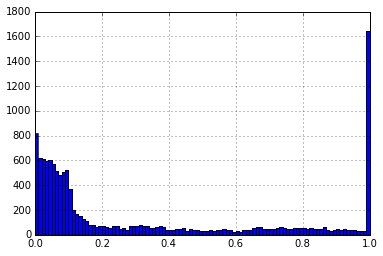

In [38]:
df2013_B.query("Fiscal_loss_pct_of_tax>0").Fiscal_loss_pct_of_tax.hist(bins = 100)

In [39]:
mln("Fiscal_loss_pct_of_tax", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321899
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0008236
Time:                        10:04:14   Log-Likelihood:                -14547.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 2.520e-05
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.5155      0.118      4.356      0.000         0.284     0.747
Intersect                 -3.9000      0.037   -106.046      0.000        -3.972    -3.828
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.0689      0.123     -0.560      0.576        -0.310     0.172
Intersect                 -3.5210      0.031   -114.526      0.000        -3.581    -3.461
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3715      0.157     -2.360      0.018        -0.680    -0.063
Intersect                 -3.7821      0.035   -108.014      0.000        -3.851    -3.713
==========================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320860
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.004046
Time:                        10:04:14   Log-Likelihood:                -14500.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 4.669e-23
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.3789      0.129      2.945      0.003         0.127     0.631
Intersect                 -3.9519      0.042    -93.975      0.000        -4.034    -3.869
Gain_fiscal_au_pacs        0.2110      0.077      2.751      0.006         0.061     0.361
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.2152      0.131     -1.641      0.101        -0.472     0.042
Intersect                 -3.5745      0.035   -101.296      0.000        -3.644    -3.505
Gain_fiscal_au_pacs        0.2190      0.065      3.345      0.001         0.091     0.347
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.8049      0.166     -4.839      0.000        -1.131    -0.479
Intersect                 -3.9662      0.043    -92.315      0.000        -4.050    -3.882
Gain_fiscal_au_pacs        0.6428      0.071      9.112      0.000         0.505     0.781
==========================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317574
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01425
Time:                        10:04:15   Log-Likelihood:                -14352.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 2.740e-81
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.3001      0.130      2.317      0.020         0.046     0.554
Intersect                 -2.8983      0.216    -13.396      0.000        -3.322    -2.474
Gain_fiscal_au_pacs        0.2664      0.078      3.431      0.001         0.114     0.419
Age_moyen                 -0.0357      0.007     -4.867      0.000        -0.050    -0.021
Age_elder_child            0.0313      0.012      2.613      0.009         0.008     0.055
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3416      0.131     -2.603      0.009        -0.599    -0.084
Intersect                 -1.7400      0.187     -9.311      0.000        -2.106    -1.374
Gain_fiscal_au_pacs        0.3182      0.066      4.795      0.000         0.188     0.448
Age_moyen                 -0.0601      0.006     -9.296      0.000        -0.073    -0.047
Age_elder_child            0.0336      0.011      3.178      0.001         0.013     0.054
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.8625      0.167     -5.161      0.000        -1.190    -0.535
Intersect                 -2.9788      0.209    -14.260      0.000        -3.388    -2.569
Gain_fiscal_au_pacs        0.7242      0.072     10.093      0.000         0.584     0.865
Age_moyen                 -0.0170      0.007     -2.426      0.015        -0.031    -0.003
Age_elder_child           -0.1167      0.013     -8.732      0.000        -0.143    -0.091
==========================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316934
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01623
Time:                        10:04:15   Log-Likelihood:                -14323.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 5.626e-89
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.3196      0.132      2.426      0.015         0.061     0.578
Intersect                 -2.8597      0.221    -12.936      0.000        -3.293    -2.426
Gain_fiscal_au_pacs        0.2654      0.078      3.415      0.001         0.113     0.418
Age_moyen                 -0.0366      0.007     -4.909      0.000        -0.051    -0.022
Age_elder_child            0.0360      0.013      2.679      0.007         0.010     0.062
deux_enfants              -0.0813      0.079     -1.030      0.303        -0.236     0.073
trois_enfants_et_plus     -0.0244      0.148     -0.164      0.869        -0.315     0.266
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.4959      0.133     -3.717      0.000        -0.757    -0.234
Intersect                 -2.0185      0.193    -10.453      0.000        -2.397    -1.640
Gain_fiscal_au_pacs        0.3238      0.066      4.870      0.000         0.193     0.454
Age_moyen                 -0.0533      0.007     -8.105      0.000        -0.066    -0.040
Age_elder_child           -0.0077      0.012     -0.625      0.532        -0.032     0.016
deux_enfants               0.4701      0.068      6.888      0.000         0.336     0.604
trois_enfants_et_plus      0.5839      0.125      4.659      0.000         0.338     0.829
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.8075      0.170     -4.759      0.000        -1.140    -0.475
Intersect                 -2.9215      0.211    -13.833      0.000        -3.335    -2.508
Gain_fiscal_au_pacs        0.7216      0.072     10.066      0.000         0.581     0.862
Age_moyen                 -0.0188      0.007     -2.658      0.008        -0.033    -0.005
Age_elder_child           -0.1033      0.015     -6.798      0.000        -0.133    -0.074
deux_enfants              -0.0982      0.082     -1.201      0.230        -0.258     0.062
trois_enfants_et_plus     -0.3831      0.209     -1.835      0.067        -0.792     0.026
==========================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315444
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02086
Time:                        10:04:16   Log-Likelihood:                -14255.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                4.529e-115
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.1729      0.134      1.292      0.196        -0.089     0.435
Intersect                 -2.7655      0.219    -12.615      0.000        -3.195    -2.336
Gain_fiscal_au_pacs        0.3270      0.078      4.167      0.000         0.173     0.481
Age_moyen                 -0.0251      0.008     -3.273      0.001        -0.040    -0.010
Age_elder_child            0.0298      0.013      2.212      0.027         0.003     0.056
deux_enfants              -0.0676      0.079     -0.859      0.390        -0.222     0.087
trois_enfants_et_plus     -0.0554      0.148     -0.373      0.709        -0.346     0.235
Rni                    -1.316e-05   2.87e-06     -4.585      0.000     -1.88e-05 -7.53e-06
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3662      0.137     -2.679      0.007        -0.634    -0.098
Intersect                 -2.0031      0.195    -10.254      0.000        -2.386    -1.620
Gain_fiscal_au_pacs        0.2455      0.069      3.575      0.000         0.111     0.380
Age_moyen                 -0.0647      0.007     -9.217      0.000        -0.078    -0.051
Age_elder_child           -0.0014      0.012     -0.112      0.911        -0.026     0.023
deux_enfants               0.4595      0.068      6.713      0.000         0.325     0.594
trois_enfants_et_plus      0.6041      0.126      4.810      0.000         0.358     0.850
Rni                     9.525e-06   1.68e-06      5.669      0.000      6.23e-06  1.28e-05
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.5358      0.175     -3.069      0.002        -0.878    -0.194
Intersect                 -2.8881      0.216    -13.345      0.000        -3.312    -2.464
Gain_fiscal_au_pacs        0.5774      0.075      7.715      0.000         0.431     0.724
Age_moyen                 -0.0373      0.008     -4.915      0.000        -0.052    -0.022
Age_elder_child           -0.0914      0.015     -5.951      0.000        -0.121    -0.061
deux_enfants              -0.1331      0.082     -1.616      0.106        -0.295     0.028
trois_enfants_et_plus     -0.4250      0.212     -2.004      0.045        -0.841    -0.009
Rni                     1.499e-05   1.54e-06      9.724      0.000       1.2e-05   1.8e-05
==========================================================================================
"""

f
Optimization terminated successfully.
         Current function value: 0.314814
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02281
Time:                        10:04:16   Log-Likelihood:                -14227.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                7.849e-125
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.1726      0.133      1.294      0.196        -0.089     0.434
Intersect                 -2.7157      0.220    -12.320      0.000        -3.148    -2.284
Gain_fiscal_au_pacs        0.3223      0.078      4.111      0.000         0.169     0.476
Age_moyen                 -0.0245      0.008     -3.198      0.001        -0.040    -0.009
Age_elder_child            0.0295      0.013      2.196      0.028         0.003     0.056
deux_enfants              -0.0685      0.079     -0.870      0.384        -0.223     0.086
trois_enfants_et_plus     -0.0627      0.148     -0.423      0.672        -0.353     0.228
Rni                    -1.633e-05    3.4e-06     -4.809      0.000      -2.3e-05 -9.68e-06
Rni_squared             3.093e-05   1.05e-05      2.951      0.003      1.04e-05  5.15e-05
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3743      0.137     -2.732      0.006        -0.643    -0.106
Intersect                 -2.0189      0.196    -10.316      0.000        -2.402    -1.635
Gain_fiscal_au_pacs        0.2517      0.069      3.662      0.000         0.117     0.386
Age_moyen                 -0.0642      0.007     -9.023      0.000        -0.078    -0.050
Age_elder_child           -0.0017      0.012     -0.140      0.889        -0.026     0.023
deux_enfants               0.4611      0.068      6.737      0.000         0.327     0.595
trois_enfants_et_plus      0.6054      0.126      4.811      0.000         0.359     0.852
Rni                     9.843e-06   2.45e-06      4.012      0.000      5.04e-06  1.47e-05
Rni_squared            -7.943e-06   6.99e-06     -1.136      0.256     -2.17e-05  5.77e-06
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3407      0.181     -1.888      0.059        -0.695     0.013
Intersect                 -3.1549      0.229    -13.754      0.000        -3.604    -2.705
Gain_fiscal_au_pacs        0.5016      0.077      6.547      0.000         0.351     0.652
Age_moyen                 -0.0521      0.008     -6.473      0.000        -0.068    -0.036
Age_elder_child           -0.0834      0.015     -5.416      0.000        -0.114    -0.053
deux_enfants              -0.1472      0.083     -1.780      0.075        -0.309     0.015
trois_enfants_et_plus     -0.3747      0.210     -1.782      0.075        -0.787     0.037
Rni                      3.96e-05   4.59e-06      8.625      0.000      3.06e-05  4.86e-05
Rni_squared               -0.0001   2.92e-05     -4.269 

g
Optimization terminated successfully.
         Current function value: 0.315156
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02175
Time:                        10:04:17   Log-Likelihood:                -14242.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.393e-118
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.3142      0.141      2.222      0.026         0.037     0.591
Intersect                    -2.8037      0.218    -12.859      0.000        -3.231    -2.376
Gain_fiscal_au_pacs           0.1782      0.095      1.870      0.062        -0.009     0.365
Age_moyen                    -0.0249      0.008     -3.263      0.001        -0.040    -0.010
Age_elder_child               0.0300      0.013      2.234      0.026         0.004     0.056
deux_enfants                 -0.1001      0.080     -1.258      0.208        -0.256     0.056
trois_enfants_et_plus        -0.1341      0.151     -0.886      0.375        -0.431     0.162
Rni                        -1.46e-05   2.81e-06     -5.202      0.000     -2.01e-05  -9.1e-06
Diff_in_incompe_mere_pere  1.216e-05   4.34e-06      2.802      0.005      3.65e-06  2.07e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.3794      0.139     -2.733      0.006        -0.651    -0.107
Intersect                    -2.0017      0.195    -10.241      0.000        -2.385    -1.619
Gain_fiscal_au_pacs           0.2570      0.075      3.419      0.001         0.110     0.404
Age_moyen                    -0.0644      0.007     -9.055      0.000        -0.078    -0.050
Age_elder_child              -0.0016      0.012     -0.126      0.900        -0.026     0.023
deux_enfants                  0.4620      0.069      6.724      0.000         0.327     0.597
trois_enfants_et_plus         0.6090      0.127      4.802      0.000         0.360     0.858
Rni                        9.322e-06   2.12e-06      4.401      0.000      5.17e-06  1.35e-05
Diff_in_incompe_mere_pere -7.052e-07   2.81e-06     -0.251      0.801      -6.2e-06  4.79e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.6189      0.179     -3.462      0.001        -0.969    -0.269
Intersect                    -2.8802      0.219    -13.144      0.000        -3.310    -2.451
Gain_fiscal_au_pacs           0.7028      0.080      8.797      0.000         0.546     0.859
Age_moyen                    -0.0441      0.008     -5.598      0.000        -0.059    -0.029
Age_elder_child              -0.0876      0.015     -5.692      0.000        -0.118    -0.057
deux_enfants                 -0.1119      0.083     -1.355      0.175        -0.274     0.050
trois_enfants_et_plus        -0.3994      0.213     -1.877      0.061        -0.817     0.018
Rni                        2.267e-05   2.37e-

h
Optimization terminated successfully.
         Current function value: 0.303970
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02166
Time:                        10:04:17   Log-Likelihood:                -8901.4
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 1.243e-68
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.4921      0.196      2.517      0.012         0.109     0.875
Intersect                    -2.9480      0.314     -9.379      0.000        -3.564    -2.332
Gain_fiscal_au_pacs           0.1540      0.133      1.158      0.247        -0.107     0.414
Age_moyen                    -0.0290      0.011     -2.664      0.008        -0.050    -0.008
Age_elder_child               0.0532      0.019      2.849      0.004         0.017     0.090
deux_enfants                 -0.2634      0.110     -2.393      0.017        -0.479    -0.048
trois_enfants_et_plus        -0.4267      0.219     -1.951      0.051        -0.855     0.002
Rni                       -1.457e-05   4.01e-06     -3.632      0.000     -2.24e-05 -6.71e-06
Diff_in_incompe_mere_pere  1.373e-05   5.98e-06      2.294      0.022         2e-06  2.55e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.3480      0.165     -2.112      0.035        -0.671    -0.025
Intersect                    -1.8476      0.243     -7.591      0.000        -2.325    -1.371
Gain_fiscal_au_pacs           0.2749      0.091      3.035      0.002         0.097     0.453
Age_moyen                    -0.0647      0.009     -7.376      0.000        -0.082    -0.048
Age_elder_child              -0.0178      0.015     -1.162      0.245        -0.048     0.012
deux_enfants                  0.5439      0.084      6.504      0.000         0.380     0.708
trois_enfants_et_plus         0.8313      0.147      5.643      0.000         0.543     1.120
Rni                        7.177e-06   2.61e-06      2.746      0.006      2.05e-06  1.23e-05
Diff_in_incompe_mere_pere  1.022e-06   3.37e-06      0.304      0.761     -5.58e-06  7.62e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4921      0.216     -2.273      0.023        -0.916    -0.068
Intersect                    -2.7713      0.285     -9.715      0.000        -3.330    -2.212
Gain_fiscal_au_pacs           0.6652      0.102      6.505      0.000         0.465     0.866
Age_moyen                    -0.0451      0.010     -4.436      0.000        -0.065    -0.025
Age_elder_child              -0.0794      0.019     -4.092      0.000        -0.117    -0.041
deux_enfants                 -0.1031      0.103     -1.001      0.317        -0.305     0.099
trois_enfants_et_plus        -0.1856      0.241     -0.770      0.441        -0.658     0.287
Rni                        2.018e-05   3.07e-

i
Optimization terminated successfully.
         Current function value: 0.302541
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02626
Time:                        10:04:17   Log-Likelihood:                -8859.6
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 2.953e-75
==============================================================================================
              y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax         0.5031      0.195      2.578      0.010         0.121     0.886
Intersect                     -2.5820      0.343     -7.526      0.000        -3.254    -1.910
Gain_fiscal_au_pacs            0.1516      0.133      1.144      0.252        -0.108     0.411
Age_moyen                     -0.0273      0.011     -2.477      0.013        -0.049    -0.006
Age_elder_child                0.0468      0.019      2.441      0.015         0.009     0.084
deux_enfants                  -0.2464      0.111     -2.228      0.026        -0.463    -0.030
trois_enfants_et_plus         -0.4191      0.220     -1.909      0.056        -0.849     0.011
Rni                        -1.213e-05    4.3e-06     -2.821      0.005     -2.06e-05  -3.7e-06
Diff_in_incompe_mere_pere   1.191e-05   5.99e-06      1.989      0.047      1.75e-07  2.36e-05
Vocational_education_femme    -0.4100      0.144     -2.847      0.004        -0.692    -0.128
Licence_education_femme       -0.5190      0.178     -2.919      0.004        -0.867    -0.171
Master_PhD_education_femme    -0.3467      0.208     -1.666      0.096        -0.755     0.061
Vocational_education_homme    -0.1188      0.131     -0.908      0.364        -0.375     0.138
Licence_education_homme       -0.0276      0.183     -0.151      0.880        -0.385     0.330
Master_PhD_education_homme    -0.1019      0.234     -0.436      0.663        -0.560     0.356
----------------------------------------------------------------------------------------------
                 y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        -0.3332      0.166     -2.010      0.044        -0.658    -0.008
Intersect                     -2.1641      0.289     -7.485      0.000        -2.731    -1.597
Gain_fiscal_au_pacs            0.2556      0.092      2.791      0.005         0.076     0.435
Age_moyen                     -0.0688      0.009     -7.525      0.000        -0.087    -0.051
Age_elder_child               -0.0089      0.016     -0.558      0.577        -0.040     0.022
deux_enfants                   0.5248      0.084      6.225      0.000         0.360     0.690
trois_enfants_et_plus          0.8139      0.149      5.481      0.000         0.523     1.105
Rni                         3.915e-06    2.8e-06      1.400      0.161     -1.56e-06  9.39e-06
Diff_in_incompe_mere_pere   3.251e-06   3.49e-06      0.933      0.351     -3.58e-06  1.01e-05
Vocational_education_femme     0.1940      0.143      1.352      0.176        -0.087     0.475
Licence_education_femme        0.3920      0.157      2.491      0.013         0.084     0.701
Master_PhD_education_femme     0.0976      0.184      0.531      0.595        -0.263     0.458
Vocational_education_homme     0.3209      0.119      2.695      0.007         0.087     0.554
Licence_edu

j
Optimization terminated successfully.
         Current function value: 0.316525
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02497
Time:                        10:04:18   Log-Likelihood:                -9269.1
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 2.995e-85
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.2829      0.173      1.632      0.103        -0.057     0.623
Intersect                    -2.9801      0.266    -11.223      0.000        -3.501    -2.460
Gain_fiscal_au_pacs           0.2146      0.117      1.827      0.068        -0.016     0.445
Age_moyen                    -0.0151      0.009     -1.639      0.101        -0.033     0.003
Age_elder_child               0.0104      0.016      0.633      0.527        -0.022     0.043
deux_enfants                 -0.0333      0.097     -0.345      0.730        -0.223     0.156
trois_enfants_et_plus        -0.2039      0.194     -1.051      0.293        -0.584     0.176
Rni                       -1.673e-05   3.47e-06     -4.820      0.000     -2.35e-05 -9.92e-06
Diff_in_incompe_mere_pere  1.275e-05   5.42e-06      2.354      0.019      2.13e-06  2.34e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.5456      0.179     -3.049      0.002        -0.896    -0.195
Intersect                    -2.0787      0.243     -8.558      0.000        -2.555    -1.603
Gain_fiscal_au_pacs           0.3496      0.094      3.701      0.000         0.164     0.535
Age_moyen                    -0.0627      0.009     -7.099      0.000        -0.080    -0.045
Age_elder_child               0.0006      0.015      0.039      0.969        -0.029     0.031
deux_enfants                  0.4442      0.085      5.203      0.000         0.277     0.612
trois_enfants_et_plus         0.6799      0.154      4.417      0.000         0.378     0.982
Rni                        9.622e-06   2.65e-06      3.635      0.000      4.43e-06  1.48e-05
Diff_in_incompe_mere_pere -1.799e-06   3.64e-06     -0.494      0.621     -8.94e-06  5.34e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4600      0.215     -2.136      0.033        -0.882    -0.038
Intersect                    -2.8231      0.271    -10.416      0.000        -3.354    -2.292
Gain_fiscal_au_pacs           0.7452      0.100      7.488      0.000         0.550     0.940
Age_moyen                    -0.0481      0.010     -4.923      0.000        -0.067    -0.029
Age_elder_child              -0.0941      0.019     -4.871      0.000        -0.132    -0.056
deux_enfants                 -0.2194      0.104     -2.112      0.035        -0.423    -0.016
trois_enfants_et_plus        -0.5656      0.279     -2.025      0.043        -1.113    -0.018
Rni                        2.547e-05   2.98e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02497
Time:                        10:04:18   Log-Likelihood:                -9269.1
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 2.995e-85
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.2829      0.173      1.632      0.103        -0.057     0.623
Intersect                    -2.9801      0.266    -11.223      0.000        -3.501    -2.460
Gain_fiscal_au_pacs           0.2146      0.117      1.827      0.068        -0.016     0.445
Age_moyen                    -0.0151      0.009     -1.639      0.101        -0.033     0.003
Age_elder_child               0.0104      0.016      0.633      0.527        -0.022     0.043
deux_enfants                 -0.0333      0.097     -0.345      0.730        -0.223     0.156
trois_enfants_et_plus        -0.2039      0.194     -1.051      0.293        -0.584     0.176
Rni                       -1.673e-05   3.47e-06     -4.820      0.000     -2.35e-05 -9.92e-06
Diff_in_incompe_mere_pere  1.275e-05   5.42e-06      2.354      0.019      2.13e-06  2.34e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.5456      0.179     -3.049      0.002        -0.896    -0.195
Intersect                    -2.0787      0.243     -8.558      0.000        -2.555    -1.603
Gain_fiscal_au_pacs           0.3496      0.094      3.701      0.000         0.164     0.535
Age_moyen                    -0.0627      0.009     -7.099      0.000        -0.080    -0.045
Age_elder_child               0.0006      0.015      0.039      0.969        -0.029     0.031
deux_enfants                  0.4442      0.085      5.203      0.000         0.277     0.612
trois_enfants_et_plus         0.6799      0.154      4.417      0.000         0.378     0.982
Rni                        9.622e-06   2.65e-06      3.635      0.000      4.43e-06  1.48e-05
Diff_in_incompe_mere_pere -1.799e-06   3.64e-06     -0.494      0.621     -8.94e-06  5.34e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4600      0.215     -2.136      0.033        -0.882    -0.038
Intersect                    -2.8231      0.271    -10.416      0.000        -3.354    -2.292
Gain_fiscal_au_pacs           0.7452      0.100      7.488      0.000         0.550     0.940
Age_moyen                    -0.0481      0.010     -4.923      0.000        -0.067    -0.029
Age_elder_child              -0.0941      0.019     -4.871      0.000        -0.132    -0.056
deux_enfants                 -0.2194      0.104     -2.112      0.035        -0.423    -0.016
trois_enfants_et_plus        -0.5656      0.279     -2.025      0.043        -1.113    -0.018
Rni                        2.547e-05   2.98e-

In [40]:
mln("Fiscal_loss_pct_of_tax", df=df2013_B, regression="g", marginal_effect = True, display_option = True)

Optimization terminated successfully.
         Current function value: 0.315156
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02175
Time:                        10:04:18   Log-Likelihood:                -14242.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.393e-118
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.3142      0.141      2.222      0.026         0.037     0.591
Intersect                    -2.8037      0.218    -12.859      0.000        -3.231    -2.376
Gain_fiscal_au_pacs           0.1782      0.095      1.870      0.062        -0.009     0.365
Age_moyen                    -0.0249      0.008     -3.263      0.001        -0.040    -0.010
Age_elder_child               0.0300      0.013      2.234      0.026         0.004     0.056
deux_enfants                 -0.1001      0.080     -1.258      0.208        -0.256     0.056
trois_enfants_et_plus        -0.1341      0.151     -0.886      0.375        -0.431     0.162
Rni                        -1.46e-05   2.81e-06     -5.202      0.000     -2.01e-05  -9.1e-06
Diff_in_incompe_mere_pere  1.216e-05   4.34e-06      2.802      0.005      3.65e-06  2.07e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.3794      0.139     -2.733      0.006        -0.651    -0.107
Intersect                    -2.0017      0.195    -10.241      0.000        -2.385    -1.619
Gain_fiscal_au_pacs           0.2570      0.075      3.419      0.001         0.110     0.404
Age_moyen                    -0.0644      0.007     -9.055      0.000        -0.078    -0.050
Age_elder_child              -0.0016      0.012     -0.126      0.900        -0.026     0.023
deux_enfants                  0.4620      0.069      6.724      0.000         0.327     0.597
trois_enfants_et_plus         0.6090      0.127      4.802      0.000         0.360     0.858
Rni                        9.322e-06   2.12e-06      4.401      0.000      5.17e-06  1.35e-05
Diff_in_incompe_mere_pere -7.052e-07   2.81e-06     -0.251      0.801      -6.2e-06  4.79e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.6189      0.179     -3.462      0.001        -0.969    -0.269
Intersect                    -2.8802      0.219    -13.144      0.000        -3.310    -2.451
Gain_fiscal_au_pacs           0.7028      0.080      8.797      0.000         0.546     0.859
Age_moyen                    -0.0441      0.008     -5.598      0.000        -0.059    -0.029
Age_elder_child              -0.0876      0.015     -5.692      0.000        -0.118    -0.057
deux_enfants                 -0.1119      0.083     -1.355      0.175        -0.274     0.050
trois_enfants_et_plus        -0.3994      0.213     -1.877      0.061        -0.817     0.018
Rni                        2.267e-05   2.37e-

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
=============================================================================================
      y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.0155      0.006      2.714      0.007         0.004     0.027
Gain_fiscal_au_pacs          -0.0231      0.003     -7.368      0.000        -0.029    -0.017
Age_moyen                     0.0029      0.000     10.358      0.000         0.002     0.003
Age_elder_child               0.0011      0.001      2.243      0.025         0.000     0.002
deux_enfants                 -0.0077      0.003     -2.713      0.007        -0.013    -0.002
trois_enfants_et_plus        -0.0054      0.006     -0.896      0.370        -0.017     0.006
Rni                       -3.946e-07   9.14e-08     -4.318      0.000     -5.74e-07 -2.15e-07
Diff_in_incompe_mere_pere  3.353e-08   1.28e-07      0.263      0.793     -2.16e-07  2.83e-07
---------------------------------------------------------------------------------------------
             y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.0066      0.003      2.384      0.017         0.001     0.012
Gain_fiscal_au_pacs           0.0031      0.002      1.643      0.100        -0.001     0.007
Age_moyen                    -0.0004      0.000     -2.901      0.004        -0.001    -0.000
Age_elder_child               0.0006      0.000      2.366      0.018         0.000     0.001
deux_enfants                 -0.0022      0.002     -1.396      0.163        -0.005     0.001
trois_enfants_et_plus        -0.0028      0.003     -0.948      0.343        -0.009     0.003
Rni                        -2.99e-07   5.54e-08     -5.398      0.000     -4.08e-07  -1.9e-07
Diff_in_incompe_mere_pere  2.427e-07   8.49e-08      2.857      0.004      7.62e-08  4.09e-07
---------------------------------------------------------------------------------------------
                y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.0099      0.004     -2.672      0.008        -0.017    -0.003
Gain_fiscal_au_pacs           0.0063      0.002      3.145      0.002         0.002     0.010
Age_moyen                    -0.0017      0.000     -8.634      0.000        -0.002    -0.001
Age_elder_child           -2.823e-06      0.000     -0.009      0.993        -0.001     0.001
deux_enfants                  0.0124      0.002      6.700      0.000         0.009     0.016
trois_enfants_et_plus         0.0165      0.003      4.865      0.000         0.010     0.023
Rni                        2.412e-07   5.62e-08      4.288      0.000      1.31e-07  3.51e-07
Diff_in_incompe_mere_pere -1.745e-08   7.42e-08     -0.235      0.814     -1.63e-07  1.28e-07
---------------------------------------------------------------------------------------------
                   y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.0122      0.004     -3.415      0.001        -0.019    -0.005
Gain_fiscal_au_pacs           0.0138      0.002      8.391      0.000         0.011     0.017
Age_moyen                    -0.0008      0.000     -5.229      0.000        -0.001    -0.001
Age_elder_child              -0.0018      0.000     -5.648      0.000        -0.002    -0.001
de

#### Fiscal loss greater than 50, 250, 500 euros

In [41]:
for seuil_1_euros in [50,250,500]:
    mln("Fiscal_loss_greater_then_{}_euros".format(seuil_1_euros), df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322145
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               5.874e-05
Time:                        10:04:25   Log-Likelihood:                -14558.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                    0.6346
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0719      0.078      0.917      0.359        -0.082     0.226
Intersect                            -3.8619      0.039    -99.737      0.000        -3.938    -3.786
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0353      0.068      0.521      0.602        -0.098     0.168
Intersect                            -3.5353      0.033   -107.072      0.000        -3.600    -3.471
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0642      0.077      0.830      0.406        -0.087     0.216
Intersect                            -3.8273      0.038   -100.532      0.000        -3.902    -3.753
=====================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321278
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002750
Time:                        10:04:25   Log-Likelihood:                -14519.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 3.448e-15
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0084      0.081     -0.104      0.917        -0.167     0.151
Intersect                            -3.9349      0.044    -90.015      0.000        -4.021    -3.849
Gain_fiscal_au_pacs                   0.2920      0.073      3.987      0.000         0.148     0.436
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0148      0.070     -0.212      0.832        -0.152     0.122
Intersect                            -3.5796      0.037    -97.164      0.000        -3.652    -3.507
Gain_fiscal_au_pacs                   0.1844      0.064      2.891      0.004         0.059     0.309
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0882      0.080     -1.103      0.270        -0.245     0.069
Intersect                            -3.9764      0.044    -89.375      0.000        -4.064    -3.889
Gain_fiscal_au_pacs                   0.5423      0.070      7.744      0.000         0.405     0.680
=====================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.318049
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01277
Time:                        10:04:26   Log-Likelihood:                -14373.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 3.265e-72
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0023      0.081      0.028      0.977        -0.157     0.162
Intersect                            -2.8311      0.214    -13.215      0.000        -3.251    -2.411
Gain_fiscal_au_pacs                   0.3329      0.074      4.506      0.000         0.188     0.478
Age_moyen                            -0.0377      0.007     -5.156      0.000        -0.052    -0.023
Age_elder_child                       0.0330      0.012      2.761      0.006         0.010     0.056
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0073      0.071      0.103      0.918        -0.131     0.146
Intersect                            -1.8005      0.186     -9.690      0.000        -2.165    -1.436
Gain_fiscal_au_pacs                   0.2508      0.064      3.890      0.000         0.124     0.377
Age_moyen                            -0.0584      0.006     -9.073      0.000        -0.071    -0.046
Age_elder_child                       0.0321      0.011      3.039      0.002         0.011     0.053
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0803      0.080     -1.000      0.317        -0.238     0.077
Intersect                            -3.1175      0.208    -15.017      0.000        -3.524    -2.711
Gain_fiscal_au_pacs                   0.6043      0.071      8.535      0.000         0.466     0.743
Age_moyen                            -0.0127      0.007     -1.822      0.068        -0.026     0.001
Age_elder_child                      -0.1208      0.013     -9.044      0.000        -0.147    -0.095
=====================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317445
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01465
Time:                        10:04:26   Log-Likelihood:                -14346.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 2.692e-79
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0069      0.082      0.085      0.932        -0.153     0.167
Intersect                            -2.8110      0.220    -12.768      0.000        -3.242    -2.379
Gain_fiscal_au_pacs                   0.3331      0.074      4.506      0.000         0.188     0.478
Age_moyen                            -0.0380      0.007     -5.109      0.000        -0.053    -0.023
Age_elder_child                       0.0352      0.014      2.609      0.009         0.009     0.062
deux_enfants                         -0.0523      0.078     -0.667      0.505        -0.206     0.101
trois_enfants_et_plus                 0.0237      0.147      0.161      0.872        -0.265     0.312
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0313      0.071     -0.438      0.661        -0.171     0.109
Intersect                            -2.0761      0.193    -10.784      0.000        -2.453    -1.699
Gain_fiscal_au_pacs                   0.2353      0.065      3.617      0.000         0.108     0.363
Age_moyen                            -0.0515      0.007     -7.843      0.000        -0.064    -0.039
Age_elder_child                      -0.0057      0.012     -0.462      0.644        -0.030     0.018
deux_enfants                          0.4307      0.068      6.379      0.000         0.298     0.563
trois_enfants_et_plus                 0.5208      0.124      4.195      0.000         0.277     0.764
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0552      0.081     -0.685      0.494        -0.213     0.103
Intersect                            -3.0174      0.210    -14.357      0.000        -3.429    -2.605
Gain_fiscal_au_pacs                   0.6114      0.071      8.664      0.000         0.473     0.750
Age_moyen                            -0.0158      0.007     -2.244      0.025        -0.030    -0.002
Age_elder_child                      -0.1004      0.015     -6.652      0.000        -0.130    -0.071
deux_enfants                         -0.1671      0.081     -2.070      0.038        -0.325    -0.009
trois_enfants_et_plus                -0.5057      0.207     -2.439      0.015        -0.912    -0.099
=====================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315652
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02021
Time:                        10:04:27   Log-Likelihood:                -14265.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                3.992e-111
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0317      0.082      0.385      0.700        -0.130     0.193
Intersect                            -2.7400      0.218    -12.558      0.000        -3.168    -2.312
Gain_fiscal_au_pacs                   0.3605      0.074      4.864      0.000         0.215     0.506
Age_moyen                            -0.0251      0.008     -3.271      0.001        -0.040    -0.010
Age_elder_child                       0.0290      0.013      2.156      0.031         0.003     0.055
deux_enfants                         -0.0536      0.078     -0.687      0.492        -0.206     0.099
trois_enfants_et_plus                -0.0344      0.147     -0.234      0.815        -0.323     0.254
Rni                               -1.399e-05   2.82e-06     -4.955      0.000     -1.95e-05 -8.45e-06
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0353      0.071     -0.497      0.619        -0.175     0.104
Intersect                            -2.0483      0.195    -10.515      0.000        -2.430    -1.667
Gain_fiscal_au_pacs                   0.1794      0.066      2.714      0.007         0.050     0.309
Age_moyen                            -0.0645      0.007     -9.184      0.000        -0.078    -0.051
Age_elder_child                       0.0005      0.012      0.037      0.970        -0.024     0.025
deux_enfants                          0.4322      0.068      6.377      0.000         0.299     0.565
trois_enfants_et_plus                 0.5628      0.125      4.516      0.000         0.319     0.807
Rni                                1.064e-05   1.64e-06      6.505      0.000      7.43e-06  1.38e-05
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0360      0.080     -0.448      0.654        -0.194     0.122
Intersect                            -2.9611      0.215    -13.745      0.000        -3.383    -2.539
Gain_fiscal_au_pacs                   0.5000      0.073      6.889      0.000         0.358     0.642
Age_moyen                            -0.0364      0.008     -4.801      0.000        -0.051    -0.022
Age_elder_child                      -0.0891      0.015     -5.825      0.000        -0.119    -0.059
deux_enfants                         -0.1771      0.081     -2.174      0.030        -0.337    -0.017
trois_enfants_et_plus                -0.5027      0.211     -2.385      0.017  

f
Optimization terminated successfully.
         Current function value: 0.314950
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02239
Time:                        10:04:27   Log-Likelihood:                -14233.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.949e-122
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0382      0.083      0.463      0.644        -0.124     0.200
Intersect                            -2.6889      0.219    -12.260      0.000        -3.119    -2.259
Gain_fiscal_au_pacs                   0.3539      0.074      4.771      0.000         0.209     0.499
Age_moyen                            -0.0245      0.008     -3.200      0.001        -0.040    -0.010
Age_elder_child                       0.0289      0.013      2.144      0.032         0.002     0.055
deux_enfants                         -0.0550      0.078     -0.705      0.481        -0.208     0.098
trois_enfants_et_plus                -0.0425      0.147     -0.288      0.773        -0.331     0.246
Rni                               -1.726e-05   3.35e-06     -5.149      0.000     -2.38e-05 -1.07e-05
Rni_squared                        3.226e-05   1.04e-05      3.087      0.002      1.18e-05  5.27e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0373      0.071     -0.523      0.601        -0.177     0.102
Intersect                            -2.0694      0.195    -10.605      0.000        -2.452    -1.687
Gain_fiscal_au_pacs                   0.1845      0.066      2.792      0.005         0.055     0.314
Age_moyen                            -0.0641      0.007     -9.010      0.000        -0.078    -0.050
Age_elder_child                       0.0002      0.012      0.018      0.985        -0.024     0.024
deux_enfants                          0.4333      0.068      6.394      0.000         0.301     0.566
trois_enfants_et_plus                 0.5644      0.125      4.519      0.000         0.320     0.809
Rni                                1.133e-05   2.41e-06      4.703      0.000      6.61e-06   1.6e-05
Rni_squared                       -1.039e-05   7.07e-06     -1.471      0.141     -2.42e-05  3.46e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0601      0.080     -0.748      0.454        -0.218     0.097
Intersect                            -3.2166      0.228    -14.133      0.000        -3.663    -2.770
Gain_fiscal_au_pacs                   0.4599      0.074      6.251      0.000         0.316     0.604
Age_moyen                            -0.0519      0.008     -6.456      0.000        -0.068    -0.036
Age_elder_child                      -0.0823      0.015     -5.352      0.000  

g
Optimization terminated successfully.
         Current function value: 0.315393
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02102
Time:                        10:04:28   Log-Likelihood:                -14253.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                7.388e-114
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.1161      0.089      1.299      0.194        -0.059     0.291
Intersect                            -2.7594      0.217    -12.703      0.000        -3.185    -2.334
Gain_fiscal_au_pacs                   0.2356      0.091      2.595      0.009         0.058     0.414
Age_moyen                            -0.0251      0.008     -3.287      0.001        -0.040    -0.010
Age_elder_child                       0.0291      0.013      2.165      0.030         0.003     0.055
deux_enfants                         -0.0776      0.079     -0.987      0.324        -0.232     0.076
trois_enfants_et_plus                -0.0936      0.150     -0.625      0.532        -0.387     0.200
Rni                               -1.585e-05   2.87e-06     -5.528      0.000     -2.15e-05 -1.02e-05
Diff_in_incompe_mere_pere          1.098e-05   4.53e-06      2.424      0.015       2.1e-06  1.99e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0302      0.075     -0.403      0.687        -0.177     0.117
Intersect                            -2.0502      0.195    -10.532      0.000        -2.432    -1.669
Gain_fiscal_au_pacs                   0.1758      0.074      2.391      0.017         0.032     0.320
Age_moyen                            -0.0636      0.007     -8.973      0.000        -0.077    -0.050
Age_elder_child                       0.0001      0.012      0.010      0.992        -0.024     0.024
deux_enfants                          0.4313      0.068      6.340      0.000         0.298     0.565
trois_enfants_et_plus                 0.5593      0.126      4.449      0.000         0.313     0.806
Rni                                9.799e-06   2.18e-06      4.494      0.000      5.53e-06  1.41e-05
Diff_in_incompe_mere_pere          5.128e-07   2.89e-06      0.177      0.859     -5.15e-06  6.18e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1312      0.084     -1.566      0.117        -0.295     0.033
Intersect                            -2.9644      0.218    -13.619      0.000        -3.391    -2.538
Gain_fiscal_au_pacs                   0.6320      0.079      8.000      0.000         0.477     0.787
Age_moyen                            -0.0426      0.008     -5.441      0.000        -0.058    -0.027
Age_elder_child                      -0.0863      0.015     -5.621      0.000  

h
Optimization terminated successfully.
         Current function value: 0.304175
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02100
Time:                        10:04:28   Log-Likelihood:                -8907.5
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 3.583e-66
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0865      0.125      0.692      0.489        -0.158     0.332
Intersect                            -2.8724      0.313     -9.172      0.000        -3.486    -2.259
Gain_fiscal_au_pacs                   0.2834      0.127      2.230      0.026         0.034     0.532
Age_moyen                            -0.0293      0.011     -2.684      0.007        -0.051    -0.008
Age_elder_child                       0.0515      0.019      2.749      0.006         0.015     0.088
deux_enfants                         -0.2206      0.109     -2.026      0.043        -0.434    -0.007
trois_enfants_et_plus                -0.3522      0.217     -1.625      0.104        -0.777     0.073
Rni                               -1.591e-05   4.11e-06     -3.872      0.000      -2.4e-05 -7.86e-06
Diff_in_incompe_mere_pere          9.954e-06   6.42e-06      1.549      0.121     -2.64e-06  2.25e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0121      0.090     -0.135      0.893        -0.188     0.164
Intersect                            -1.8917      0.243     -7.800      0.000        -2.367    -1.416
Gain_fiscal_au_pacs                   0.1934      0.088      2.187      0.029         0.020     0.367
Age_moyen                            -0.0639      0.009     -7.305      0.000        -0.081    -0.047
Age_elder_child                      -0.0160      0.015     -1.045      0.296        -0.046     0.014
deux_enfants                          0.5154      0.083      6.218      0.000         0.353     0.678
trois_enfants_et_plus                 0.7843      0.146      5.374      0.000         0.498     1.070
Rni                                7.402e-06   2.71e-06      2.731      0.006      2.09e-06  1.27e-05
Diff_in_incompe_mere_pere          2.362e-06   3.48e-06      0.679      0.497     -4.46e-06  9.18e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.2049      0.107     -1.908      0.056        -0.415     0.006
Intersect                            -2.8295      0.283     -9.983      0.000        -3.385    -2.274
Gain_fiscal_au_pacs                   0.6307      0.101      6.264      0.000         0.433     0.828
Age_moyen                            -0.0442      0.010     -4.362      0.000        -0.064    -0.024
Age_elder_child                      -0.0788      0.019     -4.065      0.000  

i
Optimization terminated successfully.
         Current function value: 0.302722
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02567
Time:                        10:04:28   Log-Likelihood:                -8864.9
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 3.837e-73
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0983      0.125      0.785      0.432        -0.147     0.343
Intersect                            -2.5180      0.343     -7.350      0.000        -3.190    -1.847
Gain_fiscal_au_pacs                   0.2791      0.127      2.199      0.028         0.030     0.528
Age_moyen                            -0.0274      0.011     -2.479      0.013        -0.049    -0.006
Age_elder_child                       0.0446      0.019      2.322      0.020         0.007     0.082
deux_enfants                         -0.2023      0.109     -1.851      0.064        -0.417     0.012
trois_enfants_et_plus                -0.3421      0.218     -1.573      0.116        -0.769     0.084
Rni                               -1.335e-05   4.42e-06     -3.019      0.003      -2.2e-05 -4.68e-06
Diff_in_incompe_mere_pere          8.333e-06   6.43e-06      1.295      0.195     -4.27e-06  2.09e-05
Vocational_education_femme           -0.4050      0.144     -2.812      0.005        -0.687    -0.123
Licence_education_femme              -0.5216      0.178     -2.929      0.003        -0.871    -0.173
Master_PhD_education_femme           -0.3531      0.208     -1.695      0.090        -0.762     0.055
Vocational_education_homme           -0.1192      0.131     -0.910      0.363        -0.376     0.137
Licence_education_homme              -0.0382      0.183     -0.209      0.835        -0.396     0.320
Master_PhD_education_homme           -0.1101      0.234     -0.470      0.638        -0.569     0.349
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0122      0.090     -0.135      0.893        -0.189     0.165
Intersect                            -2.1931      0.289     -7.593      0.000        -2.759    -1.627
Gain_fiscal_au_pacs                   0.1776      0.089      1.991      0.046         0.003     0.352
Age_moyen                            -0.0684      0.009     -7.488      0.000        -0.086    -0.051
Age_elder_child                      -0.0064      0.016     -0.408      0.683        -0.037     0.025
deux_enfants                          0.4965      0.083      5.947      0.000         0.333     0.660
trois_enfants_et_plus                 0.7656      0.147      5.212      0.000         0.478     1.054
Rni                                3.893e-06   2.89e-06      1.347      0.178     -1.77e-06  9.56e-06
Diff_in_incompe_mere_pere           4.56e-06   3.58e-06      1.272      0.203     -2.46e-06  1.16e-05
Vocational_education_femme            0.1914      0.143      1.334      0.182        -0.090     0.472
Licence_education_femme               0.3919      0.157      2.491      0.013  

j
Optimization terminated successfully.
         Current function value: 0.316780
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02418
Time:                        10:04:29   Log-Likelihood:                -9276.6
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 3.718e-82
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0798      0.110      0.724      0.469        -0.136     0.296
Intersect                            -2.9398      0.265    -11.112      0.000        -3.458    -2.421
Gain_fiscal_au_pacs                   0.2777      0.112      2.482      0.013         0.058     0.497
Age_moyen                            -0.0152      0.009     -1.650      0.099        -0.033     0.003
Age_elder_child                       0.0093      0.017      0.564      0.573        -0.023     0.042
deux_enfants                         -0.0094      0.095     -0.098      0.922        -0.196     0.178
trois_enfants_et_plus                -0.1603      0.192     -0.836      0.403        -0.536     0.216
Rni                                -1.77e-05   3.54e-06     -5.002      0.000     -2.46e-05 -1.08e-05
Diff_in_incompe_mere_pere          1.107e-05   5.63e-06      1.964      0.049      2.51e-08  2.21e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1324      0.095     -1.390      0.164        -0.319     0.054
Intersect                            -2.1439      0.242     -8.867      0.000        -2.618    -1.670
Gain_fiscal_au_pacs                   0.2662      0.092      2.889      0.004         0.086     0.447
Age_moyen                            -0.0617      0.009     -7.010      0.000        -0.079    -0.044
Age_elder_child                       0.0025      0.015      0.161      0.872        -0.027     0.032
deux_enfants                          0.4099      0.085      4.849      0.000         0.244     0.576
trois_enfants_et_plus                 0.6170      0.152      4.050      0.000         0.318     0.916
Rni                                1.077e-05   2.71e-06      3.976      0.000      5.46e-06  1.61e-05
Diff_in_incompe_mere_pere         -9.814e-07   3.73e-06     -0.263      0.792     -8.28e-06  6.32e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0283      0.102     -0.278      0.781        -0.228     0.171
Intersect                            -2.8983      0.269    -10.774      0.000        -3.425    -2.371
Gain_fiscal_au_pacs                   0.6696      0.098      6.844      0.000         0.478     0.861
Age_moyen                            -0.0468      0.010     -4.812      0.000        -0.066    -0.028
Age_elder_child                      -0.0925      0.019     -4.807      0.000  

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02418
Time:                        10:04:29   Log-Likelihood:                -9276.6
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 3.718e-82
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0798      0.110      0.724      0.469        -0.136     0.296
Intersect                            -2.9398      0.265    -11.112      0.000        -3.458    -2.421
Gain_fiscal_au_pacs                   0.2777      0.112      2.482      0.013         0.058     0.497
Age_moyen                            -0.0152      0.009     -1.650      0.099        -0.033     0.003
Age_elder_child                       0.0093      0.017      0.564      0.573        -0.023     0.042
deux_enfants                         -0.0094      0.095     -0.098      0.922        -0.196     0.178
trois_enfants_et_plus                -0.1603      0.192     -0.836      0.403        -0.536     0.216
Rni                                -1.77e-05   3.54e-06     -5.002      0.000     -2.46e-05 -1.08e-05
Diff_in_incompe_mere_pere          1.107e-05   5.63e-06      1.964      0.049      2.51e-08  2.21e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1324      0.095     -1.390      0.164        -0.319     0.054
Intersect                            -2.1439      0.242     -8.867      0.000        -2.618    -1.670
Gain_fiscal_au_pacs                   0.2662      0.092      2.889      0.004         0.086     0.447
Age_moyen                            -0.0617      0.009     -7.010      0.000        -0.079    -0.044
Age_elder_child                       0.0025      0.015      0.161      0.872        -0.027     0.032
deux_enfants                          0.4099      0.085      4.849      0.000         0.244     0.576
trois_enfants_et_plus                 0.6170      0.152      4.050      0.000         0.318     0.916
Rni                                1.077e-05   2.71e-06      3.976      0.000      5.46e-06  1.61e-05
Diff_in_incompe_mere_pere         -9.814e-07   3.73e-06     -0.263      0.792     -8.28e-06  6.32e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0283      0.102     -0.278      0.781        -0.228     0.171
Intersect                            -2.8983      0.269    -10.774      0.000        -3.425    -2.371
Gain_fiscal_au_pacs                   0.6696      0.098      6.844      0.000         0.478     0.861
Age_moyen                            -0.0468      0.010     -4.812      0.000        -0.066    -0.028
Age_elder_child                      -0.0925      0.019     -4.807      0.000  

a
Optimization terminated successfully.
         Current function value: 0.322041
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0003819
Time:                        10:04:29   Log-Likelihood:                -14553.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                   0.01110
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2959      0.097      3.050      0.002         0.106     0.486
Intersect                             -3.8816      0.036   -106.892      0.000        -3.953    -3.810
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.0140      0.093     -0.150      0.880        -0.196     0.168
Intersect                             -3.5255      0.031   -115.507      0.000        -3.585    -3.466
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1635      0.100      1.633      0.102        -0.033     0.360
Intersect                             -3.8312      0.035   -108.140      0.000        -3.901    -3.762
======================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321210
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002962
Time:                        10:04:29   Log-Likelihood:                -14516.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.824e-16
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1399      0.109      1.282      0.200        -0.074     0.354
Intersect                             -3.9395      0.042    -94.414      0.000        -4.021    -3.858
Gain_fiscal_au_pacs                    0.2452      0.080      3.079      0.002         0.089     0.401
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1586      0.102     -1.549      0.121        -0.359     0.042
Intersect                             -3.5789      0.035   -102.040      0.000        -3.648    -3.510
Gain_fiscal_au_pacs                    0.2271      0.068      3.344      0.001         0.094     0.360
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1953      0.109     -1.788      0.074        -0.409     0.019
Intersect                             -3.9867      0.043    -93.133      0.000        -4.071    -3.903
Gain_fiscal_au_pacs                    0.5783      0.074      7.831      0.000         0.434     0.723
======================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317968
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01303
Time:                        10:04:30   Log-Likelihood:                -14369.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 9.175e-74
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1253      0.109      1.147      0.251        -0.089     0.339
Intersect                             -2.8388      0.214    -13.239      0.000        -3.259    -2.419
Gain_fiscal_au_pacs                    0.2928      0.080      3.650      0.000         0.136     0.450
Age_moyen                             -0.0375      0.007     -5.129      0.000        -0.052    -0.023
Age_elder_child                        0.0329      0.012      2.751      0.006         0.009     0.056
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1806      0.103     -1.758      0.079        -0.382     0.021
Intersect                             -1.7917      0.186     -9.654      0.000        -2.155    -1.428
Gain_fiscal_au_pacs                    0.3059      0.068      4.469      0.000         0.172     0.440
Age_moyen                             -0.0585      0.006     -9.111      0.000        -0.071    -0.046
Age_elder_child                        0.0322      0.011      3.048      0.002         0.011     0.053
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2122      0.110     -1.935      0.053        -0.427     0.003
Intersect                             -3.1130      0.207    -15.003      0.000        -3.520    -2.706
Gain_fiscal_au_pacs                    0.6481      0.075      8.670      0.000         0.502     0.795
Age_moyen                             -0.0131      0.007     -1.885      0.059        -0.027     0.001
Age_elder_child                       -0.1205      0.013     -9.022      0.000        -0.147    -0.094
======================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317335
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01499
Time:                        10:04:30   Log-Likelihood:                -14341.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 2.171e-81
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1349      0.110      1.226      0.220        -0.081     0.351
Intersect                             -2.8123      0.220    -12.769      0.000        -3.244    -2.381
Gain_fiscal_au_pacs                    0.2916      0.080      3.634      0.000         0.134     0.449
Age_moyen                             -0.0380      0.007     -5.107      0.000        -0.053    -0.023
Age_elder_child                        0.0359      0.013      2.660      0.008         0.009     0.062
deux_enfants                          -0.0628      0.079     -0.799      0.424        -0.217     0.091
trois_enfants_et_plus                  0.0140      0.147      0.095      0.924        -0.274     0.302
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2604      0.104     -2.513      0.012        -0.463    -0.057
Intersect                             -2.0779      0.192    -10.798      0.000        -2.455    -1.701
Gain_fiscal_au_pacs                    0.3054      0.069      4.450      0.000         0.171     0.440
Age_moyen                             -0.0515      0.007     -7.863      0.000        -0.064    -0.039
Age_elder_child                       -0.0071      0.012     -0.580      0.562        -0.031     0.017
deux_enfants                           0.4485      0.068      6.617      0.000         0.316     0.581
trois_enfants_et_plus                  0.5387      0.124      4.330      0.000         0.295     0.782
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1758      0.111     -1.589      0.112        -0.393     0.041
Intersect                             -3.0176      0.210    -14.358      0.000        -3.430    -2.606
Gain_fiscal_au_pacs                    0.6496      0.075      8.697      0.000         0.503     0.796
Age_moyen                             -0.0160      0.007     -2.276      0.023        -0.030    -0.002
Age_elder_child                       -0.1011      0.015     -6.692      0.000        -0.131    -0.072
deux_enfants                          -0.1554      0.081     -1.917      0.055        -0.314     0.003
trois_enfants_et_plus                 -0.4939      0.207     -2.381      0.017        -0.901    -0.087
======================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315561
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02050
Time:                        10:04:31   Log-Likelihood:                -14261.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                7.452e-113
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1376      0.110      1.251      0.211        -0.078     0.353
Intersect                             -2.7385      0.218    -12.547      0.000        -3.166    -2.311
Gain_fiscal_au_pacs                    0.3244      0.080      4.047      0.000         0.167     0.482
Age_moyen                             -0.0251      0.008     -3.264      0.001        -0.040    -0.010
Age_elder_child                        0.0295      0.013      2.193      0.028         0.003     0.056
deux_enfants                          -0.0620      0.078     -0.793      0.428        -0.215     0.091
trois_enfants_et_plus                 -0.0419      0.147     -0.285      0.776        -0.331     0.247
Rni                                -1.398e-05   2.82e-06     -4.957      0.000     -1.95e-05 -8.45e-06
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2473      0.104     -2.383      0.017        -0.451    -0.044
Intersect                             -2.0477      0.195    -10.517      0.000        -2.429    -1.666
Gain_fiscal_au_pacs                    0.2457      0.070      3.509      0.000         0.108     0.383
Age_moyen                             -0.0644      0.007     -9.189      0.000        -0.078    -0.051
Age_elder_child                       -0.0010      0.012     -0.081      0.936        -0.025     0.023
deux_enfants                           0.4489      0.068      6.596      0.000         0.315     0.582
trois_enfants_et_plus                  0.5803      0.125      4.646      0.000         0.336     0.825
Rni                                 1.048e-05   1.63e-06      6.423      0.000      7.28e-06  1.37e-05
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1274      0.111     -1.144      0.253        -0.346     0.091
Intersect                             -2.9596      0.215    -13.743      0.000        -3.382    -2.538
Gain_fiscal_au_pacs                    0.5297      0.077      6.855      0.000         0.378     0.681
Age_moyen                             -0.0365      0.008     -4.816      0.000        -0.051    -0.022
Age_elder_child                       -0.0898      0.015     -5.861      0.000        -0.120    -0.060
deux_enfants                          -0.1679      0.082     -2.053      0.040        -0.328    -0.008
trois_enfants_et_plus                 -0.4922   

f
Optimization terminated successfully.
         Current function value: 0.314860
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02267
Time:                        10:04:31   Log-Likelihood:                -14229.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                5.736e-124
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1436      0.110      1.304      0.192        -0.072     0.359
Intersect                             -2.6870      0.219    -12.249      0.000        -3.117    -2.257
Gain_fiscal_au_pacs                    0.3176      0.080      3.960      0.000         0.160     0.475
Age_moyen                             -0.0245      0.008     -3.190      0.001        -0.039    -0.009
Age_elder_child                        0.0293      0.013      2.179      0.029         0.003     0.056
deux_enfants                          -0.0634      0.078     -0.811      0.418        -0.217     0.090
trois_enfants_et_plus                 -0.0500      0.147     -0.339      0.734        -0.339     0.239
Rni                                -1.727e-05   3.34e-06     -5.163      0.000     -2.38e-05 -1.07e-05
Rni_squared                          3.24e-05   1.04e-05      3.126      0.002      1.21e-05  5.27e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2490      0.104     -2.399      0.016        -0.452    -0.046
Intersect                             -2.0692      0.195    -10.609      0.000        -2.451    -1.687
Gain_fiscal_au_pacs                    0.2507      0.070      3.583      0.000         0.114     0.388
Age_moyen                             -0.0641      0.007     -9.017      0.000        -0.078    -0.050
Age_elder_child                       -0.0012      0.012     -0.097      0.923        -0.026     0.023
deux_enfants                           0.4499      0.068      6.612      0.000         0.317     0.583
trois_enfants_et_plus                  0.5821      0.125      4.650      0.000         0.337     0.828
Rni                                 1.121e-05    2.4e-06      4.662      0.000       6.5e-06  1.59e-05
Rni_squared                        -1.052e-05   7.11e-06     -1.480      0.139     -2.44e-05  3.41e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1355      0.112     -1.214      0.225        -0.354     0.083
Intersect                             -3.2151      0.228    -14.129      0.000        -3.661    -2.769
Gain_fiscal_au_pacs                    0.4876      0.078      6.222      0.000         0.334     0.641
Age_moyen                             -0.0521      0.008     -6.474      0.000        -0.068    -0.036
Age_elder_child                       -0.0828   

g
Optimization terminated successfully.
         Current function value: 0.315281
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02137
Time:                        10:04:32   Log-Likelihood:                -14248.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                5.536e-116
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2455      0.117      2.099      0.036         0.016     0.475
Intersect                             -2.7581      0.217    -12.709      0.000        -3.183    -2.333
Gain_fiscal_au_pacs                    0.1781      0.098      1.826      0.068        -0.013     0.369
Age_moyen                             -0.0248      0.008     -3.259      0.001        -0.040    -0.010
Age_elder_child                        0.0296      0.013      2.203      0.028         0.003     0.056
deux_enfants                          -0.0892      0.079     -1.131      0.258        -0.244     0.065
trois_enfants_et_plus                 -0.1088      0.150     -0.726      0.468        -0.403     0.185
Rni                                -1.584e-05   2.83e-06     -5.606      0.000     -2.14e-05 -1.03e-05
Diff_in_incompe_mere_pere           1.183e-05   4.38e-06      2.698      0.007      3.24e-06  2.04e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2551      0.107     -2.380      0.017        -0.465    -0.045
Intersect                             -2.0477      0.195    -10.515      0.000        -2.429    -1.666
Gain_fiscal_au_pacs                    0.2586      0.078      3.313      0.001         0.106     0.412
Age_moyen                             -0.0641      0.007     -9.031      0.000        -0.078    -0.050
Age_elder_child                       -0.0011      0.012     -0.088      0.930        -0.025     0.023
deux_enfants                           0.4510      0.068      6.600      0.000         0.317     0.585
trois_enfants_et_plus                  0.5849      0.126      4.641      0.000         0.338     0.832
Rni                                 1.036e-05   2.15e-06      4.826      0.000      6.15e-06  1.46e-05
Diff_in_incompe_mere_pere          -8.848e-07   2.86e-06     -0.310      0.757     -6.49e-06  4.72e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2327      0.114     -2.038      0.042        -0.456    -0.009
Intersect                             -2.9675      0.218    -13.628      0.000        -3.394    -2.541
Gain_fiscal_au_pacs                    0.6754      0.084      8.041      0.000         0.511     0.840
Age_moyen                             -0.0430      0.008     -5.482      0.000        -0.058    -0.028
Age_elder_child                       -0.0868   

h
Optimization terminated successfully.
         Current function value: 0.304019
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02150
Time:                        10:04:32   Log-Likelihood:                -8902.9
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 4.837e-68
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2724      0.165      1.653      0.098        -0.051     0.595
Intersect                             -2.8765      0.313     -9.196      0.000        -3.490    -2.263
Gain_fiscal_au_pacs                    0.1980      0.138      1.435      0.151        -0.072     0.468
Age_moyen                             -0.0290      0.011     -2.663      0.008        -0.050    -0.008
Age_elder_child                        0.0521      0.019      2.787      0.005         0.015     0.089
deux_enfants                          -0.2383      0.109     -2.180      0.029        -0.453    -0.024
trois_enfants_et_plus                 -0.3780      0.217     -1.740      0.082        -0.804     0.048
Rni                                -1.613e-05   4.05e-06     -3.987      0.000     -2.41e-05  -8.2e-06
Diff_in_incompe_mere_pere           1.198e-05    6.2e-06      1.933      0.053     -1.65e-07  2.41e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3083      0.131     -2.361      0.018        -0.564    -0.052
Intersect                             -1.8847      0.243     -7.766      0.000        -2.360    -1.409
Gain_fiscal_au_pacs                    0.3033      0.094      3.224      0.001         0.119     0.488
Age_moyen                             -0.0648      0.009     -7.383      0.000        -0.082    -0.048
Age_elder_child                       -0.0175      0.015     -1.142      0.253        -0.048     0.013
deux_enfants                           0.5407      0.083      6.495      0.000         0.378     0.704
trois_enfants_et_plus                  0.8194      0.146      5.598      0.000         0.533     1.106
Rni                                 8.298e-06   2.65e-06      3.129      0.002       3.1e-06  1.35e-05
Diff_in_incompe_mere_pere           3.068e-07   3.43e-06      0.089      0.929     -6.42e-06  7.04e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3277      0.149     -2.193      0.028        -0.621    -0.035
Intersect                             -2.8317      0.284     -9.980      0.000        -3.388    -2.276
Gain_fiscal_au_pacs                    0.6859      0.107      6.414      0.000         0.476     0.895
Age_moyen                             -0.0448      0.010     -4.408      0.000        -0.065    -0.025
Age_elder_child                       -0.0792   

i
Optimization terminated successfully.
         Current function value: 0.302583
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02612
Time:                        10:04:33   Log-Likelihood:                -8860.8
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 9.120e-75
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2839      0.165      1.721      0.085        -0.039     0.607
Intersect                             -2.5162      0.342     -7.352      0.000        -3.187    -1.845
Gain_fiscal_au_pacs                    0.1938      0.138      1.407      0.159        -0.076     0.464
Age_moyen                             -0.0272      0.011     -2.466      0.014        -0.049    -0.006
Age_elder_child                        0.0455      0.019      2.369      0.018         0.008     0.083
deux_enfants                          -0.2204      0.110     -2.008      0.045        -0.436    -0.005
trois_enfants_et_plus                 -0.3687      0.218     -1.691      0.091        -0.796     0.059
Rni                                -1.362e-05   4.36e-06     -3.125      0.002     -2.22e-05 -5.08e-06
Diff_in_incompe_mere_pere           1.022e-05   6.21e-06      1.645      0.100     -1.95e-06  2.24e-05
Vocational_education_femme            -0.4065      0.144     -2.822      0.005        -0.689    -0.124
Licence_education_femme               -0.5220      0.178     -2.934      0.003        -0.871    -0.173
Master_PhD_education_femme            -0.3507      0.208     -1.684      0.092        -0.759     0.058
Vocational_education_homme            -0.1194      0.131     -0.912      0.362        -0.376     0.137
Licence_education_homme               -0.0326      0.183     -0.178      0.858        -0.391     0.325
Master_PhD_education_homme            -0.1021      0.234     -0.436      0.663        -0.561     0.357
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3002      0.131     -2.288      0.022        -0.557    -0.043
Intersect                             -2.1985      0.289     -7.610      0.000        -2.765    -1.632
Gain_fiscal_au_pacs                    0.2860      0.095      3.005      0.003         0.099     0.473
Age_moyen                             -0.0689      0.009     -7.533      0.000        -0.087    -0.051
Age_elder_child                       -0.0085      0.016     -0.535      0.593        -0.040     0.023
deux_enfants                           0.5221      0.084      6.225      0.000         0.358     0.687
trois_enfants_et_plus                  0.8022      0.147      5.444      0.000         0.513     1.091
Rni                                  4.93e-06   2.84e-06      1.737      0.082     -6.33e-07  1.05e-05
Diff_in_incompe_mere_pere            2.49e-06   3.55e-06      0.701      0.483     -4.47e-06  9.45e-06
Vocational_education_femme             0.1943      0.143      1.355      0.175        -0.087     0.475
Licence_education_femme                0.3964   

j
Optimization terminated successfully.
         Current function value: 0.316568
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02483
Time:                        10:04:33   Log-Likelihood:                -9270.4
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 9.848e-85
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2250      0.144      1.568      0.117        -0.056     0.506
Intersect                             -2.9383      0.264    -11.117      0.000        -3.456    -2.420
Gain_fiscal_au_pacs                    0.2136      0.120      1.783      0.075        -0.021     0.448
Age_moyen                             -0.0151      0.009     -1.636      0.102        -0.033     0.003
Age_elder_child                        0.0100      0.016      0.605      0.545        -0.022     0.042
deux_enfants                          -0.0227      0.096     -0.237      0.812        -0.210     0.165
trois_enfants_et_plus                 -0.1807      0.192     -0.940      0.347        -0.557     0.196
Rni                                -1.788e-05   3.49e-06     -5.119      0.000     -2.47e-05  -1.1e-05
Diff_in_incompe_mere_pere           1.246e-05   5.44e-06      2.291      0.022       1.8e-06  2.31e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3925      0.137     -2.866      0.004        -0.661    -0.124
Intersect                             -2.1435      0.242     -8.855      0.000        -2.618    -1.669
Gain_fiscal_au_pacs                    0.3594      0.097      3.711      0.000         0.170     0.549
Age_moyen                             -0.0624      0.009     -7.071      0.000        -0.080    -0.045
Age_elder_child                        0.0013      0.015      0.085      0.933        -0.029     0.031
deux_enfants                           0.4307      0.085      5.074      0.000         0.264     0.597
trois_enfants_et_plus                  0.6477      0.153      4.241      0.000         0.348     0.947
Rni                                 1.109e-05   2.68e-06      4.143      0.000      5.84e-06  1.63e-05
Diff_in_incompe_mere_pere          -2.244e-06   3.67e-06     -0.611      0.541     -9.45e-06  4.96e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2799      0.143     -1.959      0.050        -0.560  9.35e-05
Intersect                             -2.8898      0.269    -10.737      0.000        -3.417    -2.362
Gain_fiscal_au_pacs                    0.7566      0.104      7.307      0.000         0.554     0.960
Age_moyen                             -0.0475      0.010     -4.872      0.000        -0.067    -0.028
Age_elder_child                       -0.0940   

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02483
Time:                        10:04:33   Log-Likelihood:                -9270.4
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 9.848e-85
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2250      0.144      1.568      0.117        -0.056     0.506
Intersect                             -2.9383      0.264    -11.117      0.000        -3.456    -2.420
Gain_fiscal_au_pacs                    0.2136      0.120      1.783      0.075        -0.021     0.448
Age_moyen                             -0.0151      0.009     -1.636      0.102        -0.033     0.003
Age_elder_child                        0.0100      0.016      0.605      0.545        -0.022     0.042
deux_enfants                          -0.0227      0.096     -0.237      0.812        -0.210     0.165
trois_enfants_et_plus                 -0.1807      0.192     -0.940      0.347        -0.557     0.196
Rni                                -1.788e-05   3.49e-06     -5.119      0.000     -2.47e-05  -1.1e-05
Diff_in_incompe_mere_pere           1.246e-05   5.44e-06      2.291      0.022       1.8e-06  2.31e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3925      0.137     -2.866      0.004        -0.661    -0.124
Intersect                             -2.1435      0.242     -8.855      0.000        -2.618    -1.669
Gain_fiscal_au_pacs                    0.3594      0.097      3.711      0.000         0.170     0.549
Age_moyen                             -0.0624      0.009     -7.071      0.000        -0.080    -0.045
Age_elder_child                        0.0013      0.015      0.085      0.933        -0.029     0.031
deux_enfants                           0.4307      0.085      5.074      0.000         0.264     0.597
trois_enfants_et_plus                  0.6477      0.153      4.241      0.000         0.348     0.947
Rni                                 1.109e-05   2.68e-06      4.143      0.000      5.84e-06  1.63e-05
Diff_in_incompe_mere_pere          -2.244e-06   3.67e-06     -0.611      0.541     -9.45e-06  4.96e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2799      0.143     -1.959      0.050        -0.560  9.35e-05
Intersect                             -2.8898      0.269    -10.737      0.000        -3.417    -2.362
Gain_fiscal_au_pacs                    0.7566      0.104      7.307      0.000         0.554     0.960
Age_moyen                             -0.0475      0.010     -4.872      0.000        -0.067    -0.028
Age_elder_child                       -0.0940   

a
Optimization terminated successfully.
         Current function value: 0.322040
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0003856
Time:                        10:04:33   Log-Likelihood:                -14553.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                   0.01056
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.3491      0.119      2.922      0.003         0.115     0.583
Intersect                             -3.8710      0.035   -109.844      0.000        -3.940    -3.802
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.0322      0.117      0.276      0.782        -0.196     0.261
Intersect                             -3.5291      0.030   -118.320      0.000        -3.588    -3.471
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2420      0.123      1.971      0.049         0.001     0.483
Intersect                             -3.8293      0.035   -110.902      0.000        -3.897    -3.762
======================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321250
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002839
Time:                        10:04:34   Log-Likelihood:                -14518.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.008e-15
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1636      0.132      1.240      0.215        -0.095     0.422
Intersect                             -3.9363      0.042    -94.533      0.000        -4.018    -3.855
Gain_fiscal_au_pacs                    0.2513      0.078      3.215      0.001         0.098     0.404
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1213      0.126     -0.960      0.337        -0.369     0.126
Intersect                             -3.5820      0.035   -102.280      0.000        -3.651    -3.513
Gain_fiscal_au_pacs                    0.2067      0.067      3.093      0.002         0.076     0.338
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1497      0.132     -1.138      0.255        -0.408     0.108
Intersect                             -3.9905      0.043    -93.319      0.000        -4.074    -3.907
Gain_fiscal_au_pacs                    0.5536      0.073      7.629      0.000         0.411     0.696
======================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.318015
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01288
Time:                        10:04:34   Log-Likelihood:                -14371.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 7.240e-73
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1596      0.132      1.209      0.227        -0.099     0.418
Intersect                             -2.8316      0.214    -13.214      0.000        -3.252    -2.412
Gain_fiscal_au_pacs                    0.2956      0.079      3.759      0.000         0.141     0.450
Age_moyen                             -0.0376      0.007     -5.152      0.000        -0.052    -0.023
Age_elder_child                        0.0330      0.012      2.766      0.006         0.010     0.056
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1266      0.126     -1.001      0.317        -0.374     0.121
Intersect                             -1.8005      0.186     -9.699      0.000        -2.164    -1.437
Gain_fiscal_au_pacs                    0.2795      0.067      4.157      0.000         0.148     0.411
Age_moyen                             -0.0584      0.006     -9.078      0.000        -0.071    -0.046
Age_elder_child                        0.0320      0.011      3.032      0.002         0.011     0.053
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1640      0.132     -1.243      0.214        -0.423     0.095
Intersect                             -3.1265      0.208    -15.066      0.000        -3.533    -2.720
Gain_fiscal_au_pacs                    0.6204      0.073      8.470      0.000         0.477     0.764
Age_moyen                             -0.0128      0.007     -1.837      0.066        -0.026     0.001
Age_elder_child                       -0.1208      0.013     -9.044      0.000        -0.147    -0.095
======================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317396
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01480
Time:                        10:04:35   Log-Likelihood:                -14343.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 3.169e-80
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1679      0.132      1.267      0.205        -0.092     0.428
Intersect                             -2.8063      0.220    -12.743      0.000        -3.238    -2.375
Gain_fiscal_au_pacs                    0.2954      0.079      3.755      0.000         0.141     0.450
Age_moyen                             -0.0381      0.007     -5.123      0.000        -0.053    -0.024
Age_elder_child                        0.0358      0.013      2.658      0.008         0.009     0.062
deux_enfants                          -0.0600      0.078     -0.767      0.443        -0.214     0.093
trois_enfants_et_plus                  0.0169      0.147      0.115      0.909        -0.271     0.305
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1955      0.127     -1.540      0.124        -0.444     0.053
Intersect                             -2.0836      0.193    -10.819      0.000        -2.461    -1.706
Gain_fiscal_au_pacs                    0.2692      0.067      4.000      0.000         0.137     0.401
Age_moyen                             -0.0514      0.007     -7.842      0.000        -0.064    -0.039
Age_elder_child                       -0.0063      0.012     -0.515      0.607        -0.030     0.018
deux_enfants                           0.4372      0.068      6.474      0.000         0.305     0.570
trois_enfants_et_plus                  0.5275      0.124      4.246      0.000         0.284     0.771
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1305      0.133     -0.984      0.325        -0.390     0.130
Intersect                             -3.0242      0.210    -14.384      0.000        -3.436    -2.612
Gain_fiscal_au_pacs                    0.6265      0.073      8.550      0.000         0.483     0.770
Age_moyen                             -0.0159      0.007     -2.254      0.024        -0.030    -0.002
Age_elder_child                       -0.1006      0.015     -6.663      0.000        -0.130    -0.071
deux_enfants                          -0.1650      0.081     -2.046      0.041        -0.323    -0.007
trois_enfants_et_plus                 -0.5045      0.207     -2.434      0.015        -0.911    -0.098
======================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315596
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02039
Time:                        10:04:35   Log-Likelihood:                -14262.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                3.562e-112
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1881      0.133      1.418      0.156        -0.072     0.448
Intersect                             -2.7322      0.218    -12.518      0.000        -3.160    -2.304
Gain_fiscal_au_pacs                    0.3247      0.079      4.131      0.000         0.171     0.479
Age_moyen                             -0.0251      0.008     -3.272      0.001        -0.040    -0.010
Age_elder_child                        0.0295      0.013      2.190      0.029         0.003     0.056
deux_enfants                          -0.0599      0.078     -0.768      0.442        -0.213     0.093
trois_enfants_et_plus                 -0.0395      0.147     -0.268      0.788        -0.328     0.249
Rni                                -1.405e-05   2.82e-06     -4.984      0.000     -1.96e-05 -8.52e-06
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2053      0.127     -1.615      0.106        -0.454     0.044
Intersect                             -2.0552      0.195    -10.547      0.000        -2.437    -1.673
Gain_fiscal_au_pacs                    0.2147      0.068      3.135      0.002         0.080     0.349
Age_moyen                             -0.0645      0.007     -9.192      0.000        -0.078    -0.051
Age_elder_child                       -0.0002      0.012     -0.020      0.984        -0.025     0.024
deux_enfants                           0.4390      0.068      6.475      0.000         0.306     0.572
trois_enfants_et_plus                  0.5711      0.125      4.578      0.000         0.327     0.816
Rni                                 1.066e-05   1.63e-06      6.527      0.000      7.46e-06  1.39e-05
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1207      0.133     -0.905      0.366        -0.382     0.141
Intersect                             -2.9658      0.215    -13.770      0.000        -3.388    -2.544
Gain_fiscal_au_pacs                    0.5178      0.076      6.851      0.000         0.370     0.666
Age_moyen                             -0.0365      0.008     -4.811      0.000        -0.051    -0.022
Age_elder_child                       -0.0895      0.015     -5.845      0.000        -0.119    -0.059
deux_enfants                          -0.1730      0.081     -2.125      0.034        -0.333    -0.013
trois_enfants_et_plus                 -0.4977   

f
Optimization terminated successfully.
         Current function value: 0.314893
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02257
Time:                        10:04:36   Log-Likelihood:                -14230.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                2.491e-123
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1936      0.133      1.460      0.144        -0.066     0.454
Intersect                             -2.6805      0.219    -12.217      0.000        -3.111    -2.250
Gain_fiscal_au_pacs                    0.3184      0.079      4.049      0.000         0.164     0.472
Age_moyen                             -0.0245      0.008     -3.199      0.001        -0.040    -0.009
Age_elder_child                        0.0293      0.013      2.176      0.030         0.003     0.056
deux_enfants                          -0.0610      0.078     -0.783      0.434        -0.214     0.092
trois_enfants_et_plus                 -0.0474      0.147     -0.322      0.748        -0.336     0.241
Rni                                -1.733e-05   3.34e-06     -5.186      0.000     -2.39e-05 -1.08e-05
Rni_squared                         3.249e-05   1.04e-05      3.125      0.002      1.21e-05  5.29e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2050      0.127     -1.613      0.107        -0.454     0.044
Intersect                             -2.0768      0.195    -10.639      0.000        -2.459    -1.694
Gain_fiscal_au_pacs                    0.2192      0.068      3.202      0.001         0.085     0.353
Age_moyen                             -0.0641      0.007     -9.017      0.000        -0.078    -0.050
Age_elder_child                       -0.0004      0.012     -0.036      0.972        -0.025     0.024
deux_enfants                           0.4400      0.068      6.490      0.000         0.307     0.573
trois_enfants_et_plus                  0.5728      0.125      4.580      0.000         0.328     0.818
Rni                                 1.139e-05   2.41e-06      4.727      0.000      6.67e-06  1.61e-05
Rni_squared                        -1.063e-05   7.08e-06     -1.500      0.134     -2.45e-05  3.26e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1511      0.134     -1.131      0.258        -0.413     0.111
Intersect                             -3.2220      0.228    -14.162      0.000        -3.668    -2.776
Gain_fiscal_au_pacs                    0.4794      0.076      6.267      0.000         0.329     0.629
Age_moyen                             -0.0521      0.008     -6.471      0.000        -0.068    -0.036
Age_elder_child                       -0.0826   

g
Optimization terminated successfully.
         Current function value: 0.315349
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02115
Time:                        10:04:36   Log-Likelihood:                -14251.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                1.075e-114
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2633      0.136      1.932      0.053        -0.004     0.530
Intersect                             -2.7481      0.217    -12.655      0.000        -3.174    -2.322
Gain_fiscal_au_pacs                    0.2073      0.093      2.228      0.026         0.025     0.390
Age_moyen                             -0.0250      0.008     -3.272      0.001        -0.040    -0.010
Age_elder_child                        0.0294      0.013      2.184      0.029         0.003     0.056
deux_enfants                          -0.0799      0.078     -1.020      0.308        -0.234     0.074
trois_enfants_et_plus                 -0.0946      0.149     -0.633      0.527        -0.387     0.198
Rni                                -1.566e-05   2.82e-06     -5.551      0.000     -2.12e-05 -1.01e-05
Diff_in_incompe_mere_pere           1.045e-05   4.27e-06      2.446      0.014      2.08e-06  1.88e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2017      0.129     -1.567      0.117        -0.454     0.051
Intersect                             -2.0564      0.195    -10.561      0.000        -2.438    -1.675
Gain_fiscal_au_pacs                    0.2141      0.075      2.864      0.004         0.068     0.361
Age_moyen                             -0.0638      0.007     -8.989      0.000        -0.078    -0.050
Age_elder_child                       -0.0005      0.012     -0.042      0.966        -0.025     0.024
deux_enfants                           0.4388      0.068      6.455      0.000         0.306     0.572
trois_enfants_et_plus                  0.5693      0.126      4.528      0.000         0.323     0.816
Rni                                 1.001e-05   2.14e-06      4.670      0.000      5.81e-06  1.42e-05
Diff_in_incompe_mere_pere            2.19e-07   2.79e-06      0.079      0.937     -5.25e-06  5.69e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1915      0.134     -1.426      0.154        -0.455     0.072
Intersect                             -2.9789      0.218    -13.686      0.000        -3.405    -2.552
Gain_fiscal_au_pacs                    0.6381      0.081      7.908      0.000         0.480     0.796
Age_moyen                             -0.0426      0.008     -5.433      0.000        -0.058    -0.027
Age_elder_child                       -0.0863   

h
Optimization terminated successfully.
         Current function value: 0.304197
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02092
Time:                        10:04:37   Log-Likelihood:                -8908.1
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 6.641e-66
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.0684      0.203      0.337      0.736        -0.330     0.467
Intersect                             -2.8683      0.313     -9.161      0.000        -3.482    -2.255
Gain_fiscal_au_pacs                    0.3003      0.130      2.308      0.021         0.045     0.555
Age_moyen                             -0.0292      0.011     -2.674      0.007        -0.051    -0.008
Age_elder_child                        0.0513      0.019      2.737      0.006         0.015     0.088
deux_enfants                          -0.2158      0.109     -1.983      0.047        -0.429    -0.003
trois_enfants_et_plus                 -0.3436      0.216     -1.587      0.112        -0.768     0.081
Rni                                -1.547e-05   4.04e-06     -3.832      0.000     -2.34e-05 -7.56e-06
Diff_in_incompe_mere_pere           8.642e-06    6.1e-06      1.417      0.156     -3.31e-06  2.06e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2183      0.157     -1.392      0.164        -0.526     0.089
Intersect                             -1.8972      0.243     -7.820      0.000        -2.373    -1.422
Gain_fiscal_au_pacs                    0.2420      0.090      2.683      0.007         0.065     0.419
Age_moyen                             -0.0642      0.009     -7.331      0.000        -0.081    -0.047
Age_elder_child                       -0.0167      0.015     -1.094      0.274        -0.047     0.013
deux_enfants                           0.5252      0.083      6.339      0.000         0.363     0.688
trois_enfants_et_plus                  0.7973      0.146      5.463      0.000         0.511     1.083
Rni                                  7.82e-06   2.65e-06      2.949      0.003      2.62e-06   1.3e-05
Diff_in_incompe_mere_pere           1.818e-06   3.36e-06      0.541      0.588     -4.77e-06   8.4e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1618      0.173     -0.935      0.350        -0.501     0.177
Intersect                             -2.8504      0.284    -10.054      0.000        -3.406    -2.295
Gain_fiscal_au_pacs                    0.6083      0.103      5.884      0.000         0.406     0.811
Age_moyen                             -0.0439      0.010     -4.333      0.000        -0.064    -0.024
Age_elder_child                       -0.0783   

i
Optimization terminated successfully.
         Current function value: 0.302733
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02563
Time:                        10:04:37   Log-Likelihood:                -8865.2
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 5.213e-73
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.0774      0.203      0.381      0.703        -0.321     0.476
Intersect                             -2.5148      0.343     -7.338      0.000        -3.186    -1.843
Gain_fiscal_au_pacs                    0.2982      0.130      2.293      0.022         0.043     0.553
Age_moyen                             -0.0273      0.011     -2.470      0.013        -0.049    -0.006
Age_elder_child                        0.0444      0.019      2.309      0.021         0.007     0.082
deux_enfants                          -0.1969      0.109     -1.802      0.072        -0.411     0.017
trois_enfants_et_plus                 -0.3322      0.217     -1.529      0.126        -0.758     0.094
Rni                                -1.286e-05   4.36e-06     -2.949      0.003     -2.14e-05 -4.31e-06
Diff_in_incompe_mere_pere           6.879e-06   6.13e-06      1.122      0.262     -5.13e-06  1.89e-05
Vocational_education_femme            -0.4037      0.144     -2.803      0.005        -0.686    -0.121
Licence_education_femme               -0.5178      0.178     -2.910      0.004        -0.867    -0.169
Master_PhD_education_femme            -0.3518      0.208     -1.688      0.091        -0.760     0.057
Vocational_education_homme            -0.1189      0.131     -0.908      0.364        -0.375     0.138
Licence_education_homme               -0.0389      0.183     -0.213      0.831        -0.397     0.319
Master_PhD_education_homme            -0.1138      0.234     -0.486      0.627        -0.573     0.345
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2055      0.157     -1.307      0.191        -0.514     0.103
Intersect                             -2.2031      0.289     -7.625      0.000        -2.769    -1.637
Gain_fiscal_au_pacs                    0.2244      0.091      2.466      0.014         0.046     0.403
Age_moyen                             -0.0685      0.009     -7.496      0.000        -0.086    -0.051
Age_elder_child                       -0.0074      0.016     -0.466      0.641        -0.038     0.024
deux_enfants                           0.5062      0.083      6.066      0.000         0.343     0.670
trois_enfants_et_plus                  0.7786      0.147      5.302      0.000         0.491     1.066
Rni                                 4.316e-06   2.83e-06      1.526      0.127     -1.23e-06  9.86e-06
Diff_in_incompe_mere_pere           3.967e-06   3.46e-06      1.145      0.252     -2.82e-06  1.08e-05
Vocational_education_femme             0.1927      0.143      1.344      0.179        -0.088     0.474
Licence_education_femme                0.3926   

j
Optimization terminated successfully.
         Current function value: 0.316720
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02437
Time:                        10:04:37   Log-Likelihood:                -9274.8
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 6.831e-83
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1854      0.168      1.100      0.271        -0.145     0.516
Intersect                             -2.9312      0.265    -11.082      0.000        -3.450    -2.413
Gain_fiscal_au_pacs                    0.2572      0.114      2.255      0.024         0.034     0.481
Age_moyen                             -0.0152      0.009     -1.645      0.100        -0.033     0.003
Age_elder_child                        0.0095      0.016      0.573      0.567        -0.023     0.042
deux_enfants                          -0.0108      0.095     -0.114      0.909        -0.197     0.176
trois_enfants_et_plus                 -0.1604      0.191     -0.838      0.402        -0.535     0.215
Rni                                -1.758e-05   3.48e-06     -5.045      0.000     -2.44e-05 -1.07e-05
Diff_in_incompe_mere_pere           1.076e-05    5.3e-06      2.029      0.042      3.68e-07  2.12e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2888      0.162     -1.778      0.075        -0.607     0.029
Intersect                             -2.1563      0.242     -8.909      0.000        -2.631    -1.682
Gain_fiscal_au_pacs                    0.2885      0.093      3.112      0.002         0.107     0.470
Age_moyen                             -0.0618      0.009     -7.018      0.000        -0.079    -0.045
Age_elder_child                        0.0023      0.015      0.149      0.882        -0.028     0.032
deux_enfants                           0.4116      0.084      4.878      0.000         0.246     0.577
trois_enfants_et_plus                  0.6189      0.152      4.066      0.000         0.321     0.917
Rni                                 1.055e-05   2.68e-06      3.936      0.000       5.3e-06  1.58e-05
Diff_in_incompe_mere_pere          -4.239e-07   3.56e-06     -0.119      0.905      -7.4e-06  6.55e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2079      0.166     -1.250      0.211        -0.534     0.118
Intersect                             -2.9032      0.269    -10.792      0.000        -3.430    -2.376
Gain_fiscal_au_pacs                    0.7091      0.100      7.092      0.000         0.513     0.905
Age_moyen                             -0.0470      0.010     -4.825      0.000        -0.066    -0.028
Age_elder_child                       -0.0933   

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02437
Time:                        10:04:37   Log-Likelihood:                -9274.8
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 6.831e-83
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1854      0.168      1.100      0.271        -0.145     0.516
Intersect                             -2.9312      0.265    -11.082      0.000        -3.450    -2.413
Gain_fiscal_au_pacs                    0.2572      0.114      2.255      0.024         0.034     0.481
Age_moyen                             -0.0152      0.009     -1.645      0.100        -0.033     0.003
Age_elder_child                        0.0095      0.016      0.573      0.567        -0.023     0.042
deux_enfants                          -0.0108      0.095     -0.114      0.909        -0.197     0.176
trois_enfants_et_plus                 -0.1604      0.191     -0.838      0.402        -0.535     0.215
Rni                                -1.758e-05   3.48e-06     -5.045      0.000     -2.44e-05 -1.07e-05
Diff_in_incompe_mere_pere           1.076e-05    5.3e-06      2.029      0.042      3.68e-07  2.12e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2888      0.162     -1.778      0.075        -0.607     0.029
Intersect                             -2.1563      0.242     -8.909      0.000        -2.631    -1.682
Gain_fiscal_au_pacs                    0.2885      0.093      3.112      0.002         0.107     0.470
Age_moyen                             -0.0618      0.009     -7.018      0.000        -0.079    -0.045
Age_elder_child                        0.0023      0.015      0.149      0.882        -0.028     0.032
deux_enfants                           0.4116      0.084      4.878      0.000         0.246     0.577
trois_enfants_et_plus                  0.6189      0.152      4.066      0.000         0.321     0.917
Rni                                 1.055e-05   2.68e-06      3.936      0.000       5.3e-06  1.58e-05
Diff_in_incompe_mere_pere          -4.239e-07   3.56e-06     -0.119      0.905      -7.4e-06  6.55e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2079      0.166     -1.250      0.211        -0.534     0.118
Intersect                             -2.9032      0.269    -10.792      0.000        -3.430    -2.376
Gain_fiscal_au_pacs                    0.7091      0.100      7.092      0.000         0.513     0.905
Age_moyen                             -0.0470      0.010     -4.825      0.000        -0.066    -0.028
Age_elder_child                       -0.0933   

#### Fiscal loss/1000 euros

In [42]:
mln("Fiscal_loss_thousand_divided", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.322059
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45185
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0003250
Time:                        10:04:38   Log-Likelihood:                -14554.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                   0.02373
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.3290      0.126      2.609      0.009         0.082     0.576
Intersect                       -3.8761      0.036   -107.112      0.000        -3.947    -3.805
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.0748      0.124      0.603      0.546        -0.168     0.318
Intersect                       -3.5336      0.031   -114.306      0.000        -3.594    -3.473
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2493      0.130      1.918      0.055        -0.005     0.504
Intersect                       -3.8352      0.036   -107.767      0.000        -3.905    -3.765
================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.321261
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45182
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.002802
Time:                        10:04:38   Log-Likelihood:                -14518.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.688e-15
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1321      0.143      0.926      0.354        -0.147     0.412
Intersect                       -3.9401      0.042    -94.172      0.000        -4.022    -3.858
Gain_fiscal_au_pacs              0.2619      0.078      3.378      0.001         0.110     0.414
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.0854      0.137     -0.622      0.534        -0.355     0.184
Intersect                       -3.5797      0.035   -101.621      0.000        -3.649    -3.511
Gain_fiscal_au_pacs              0.1979      0.067      2.946      0.003         0.066     0.330
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1776      0.148     -1.199      0.231        -0.468     0.113
Intersect                       -3.9856      0.043    -92.796      0.000        -4.070    -3.901
Gain_fiscal_au_pacs              0.5565      0.073      7.630      0.000         0.414     0.699
================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.318031
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45176
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01283
Time:                        10:04:39   Log-Likelihood:                -14372.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 1.508e-72
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1352      0.143      0.945      0.345        -0.145     0.416
Intersect                       -2.8330      0.214    -13.219      0.000        -3.253    -2.413
Gain_fiscal_au_pacs              0.3045      0.078      3.898      0.000         0.151     0.458
Age_moyen                       -0.0377      0.007     -5.160      0.000        -0.052    -0.023
Age_elder_child                  0.0330      0.012      2.760      0.006         0.010     0.056
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.0760      0.138     -0.549      0.583        -0.347     0.195
Intersect                       -1.7996      0.186     -9.693      0.000        -2.163    -1.436
Gain_fiscal_au_pacs              0.2678      0.068      3.948      0.000         0.135     0.401
Age_moyen                       -0.0583      0.006     -9.073      0.000        -0.071    -0.046
Age_elder_child                  0.0321      0.011      3.036      0.002         0.011     0.053
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1747      0.151     -1.161      0.246        -0.470     0.120
Intersect                       -3.1228      0.207    -15.052      0.000        -3.529    -2.716
Gain_fiscal_au_pacs              0.6196      0.074      8.395      0.000         0.475     0.764
Age_moyen                       -0.0128      0.007     -1.835      0.066        -0.026     0.001
Age_elder_child                 -0.1207      0.013     -9.035      0.000        -0.147    -0.095
================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.317416
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01474
Time:                        10:04:39   Log-Likelihood:                -14344.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                 7.433e-80
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1438      0.144      1.002      0.317        -0.138     0.425
Intersect                       -2.8070      0.220    -12.744      0.000        -3.239    -2.375
Gain_fiscal_au_pacs              0.3045      0.078      3.900      0.000         0.151     0.458
Age_moyen                       -0.0382      0.007     -5.134      0.000        -0.053    -0.024
Age_elder_child                  0.0359      0.013      2.659      0.008         0.009     0.062
deux_enfants                    -0.0598      0.078     -0.762      0.446        -0.214     0.094
trois_enfants_et_plus            0.0119      0.148      0.080      0.936        -0.277     0.301
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1804      0.140     -1.285      0.199        -0.456     0.095
Intersect                       -2.0825      0.193    -10.816      0.000        -2.460    -1.705
Gain_fiscal_au_pacs              0.2642      0.068      3.881      0.000         0.131     0.398
Age_moyen                       -0.0513      0.007     -7.825      0.000        -0.064    -0.038
Age_elder_child                 -0.0064      0.012     -0.523      0.601        -0.030     0.018
deux_enfants                     0.4378      0.068      6.468      0.000         0.305     0.570
trois_enfants_et_plus            0.5319      0.124      4.273      0.000         0.288     0.776
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1159      0.152     -0.761      0.447        -0.415     0.183
Intersect                       -3.0221      0.210    -14.378      0.000        -3.434    -2.610
Gain_fiscal_au_pacs              0.6212      0.074      8.422      0.000         0.477     0.766
Age_moyen                       -0.0158      0.007     -2.250      0.024        -0.030    -0.002
Age_elder_child                 -0.1006      0.015     -6.657      0.000        -0.130    -0.071
deux_enfants                    -0.1651      0.081     -2.039      0.041        -0.324    -0.006
trois_enfants_et_plus           -0.4998      0.208     -2.406      0.016        -0.907    -0.093
================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315596
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45167
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02039
Time:                        10:04:39   Log-Likelihood:                -14262.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                3.505e-112
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2252      0.151      1.490      0.136        -0.071     0.521
Intersect                       -2.7293      0.218    -12.498      0.000        -3.157    -2.301
Gain_fiscal_au_pacs              0.3216      0.079      4.086      0.000         0.167     0.476
Age_moyen                       -0.0251      0.008     -3.271      0.001        -0.040    -0.010
Age_elder_child                  0.0297      0.013      2.208      0.027         0.003     0.056
deux_enfants                    -0.0631      0.078     -0.807      0.419        -0.216     0.090
trois_enfants_et_plus           -0.0486      0.148     -0.330      0.742        -0.338     0.241
Rni                          -1.431e-05   2.83e-06     -5.049      0.000     -1.99e-05 -8.75e-06
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2144      0.136     -1.581      0.114        -0.480     0.051
Intersect                       -2.0543      0.195    -10.546      0.000        -2.436    -1.673
Gain_fiscal_au_pacs              0.2140      0.069      3.115      0.002         0.079     0.349
Age_moyen                       -0.0645      0.007     -9.190      0.000        -0.078    -0.051
Age_elder_child                 -0.0005      0.012     -0.037      0.970        -0.025     0.024
deux_enfants                     0.4411      0.068      6.493      0.000         0.308     0.574
trois_enfants_et_plus            0.5798      0.125      4.635      0.000         0.335     0.825
Rni                           1.077e-05   1.63e-06      6.601      0.000      7.57e-06   1.4e-05
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1254      0.145     -0.863      0.388        -0.410     0.159
Intersect                       -2.9639      0.215    -13.764      0.000        -3.386    -2.542
Gain_fiscal_au_pacs              0.5158      0.075      6.842      0.000         0.368     0.664
Age_moyen                       -0.0365      0.008     -4.814      0.000        -0.051    -0.022
Age_elder_child                 -0.0895      0.015     -5.847      0.000        -0.120    -0.060
deux_enfants                    -0.1716      0.082     -2.101      0.036        -0.332    -0.012
trois_enfants_et_plus           -0.4879      0.212     -2.306      0.021        -0.903    -0.073
Rni                           1.626e-05   1.51e-06     10.744      0.000      1.33e-05  1.92e-05
========================================

f
Optimization terminated successfully.
         Current function value: 0.314887
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02259
Time:                        10:04:40   Log-Likelihood:                -14230.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                1.944e-123
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2333      0.151      1.547      0.122        -0.062     0.529
Intersect                       -2.6765      0.220    -12.191      0.000        -3.107    -2.246
Gain_fiscal_au_pacs              0.3149      0.079      3.997      0.000         0.160     0.469
Age_moyen                       -0.0245      0.008     -3.197      0.001        -0.040    -0.009
Age_elder_child                  0.0295      0.013      2.195      0.028         0.003     0.056
deux_enfants                    -0.0644      0.078     -0.825      0.410        -0.217     0.089
trois_enfants_et_plus           -0.0571      0.148     -0.387      0.699        -0.347     0.232
Rni                          -1.766e-05   3.36e-06     -5.252      0.000     -2.42e-05 -1.11e-05
Rni_squared                   3.304e-05   1.04e-05      3.175      0.001      1.26e-05  5.34e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2143      0.136     -1.571      0.116        -0.482     0.053
Intersect                       -2.0766      0.195    -10.640      0.000        -2.459    -1.694
Gain_fiscal_au_pacs              0.2185      0.069      3.180      0.001         0.084     0.353
Age_moyen                       -0.0642      0.007     -9.020      0.000        -0.078    -0.050
Age_elder_child                 -0.0006      0.012     -0.052      0.959        -0.025     0.024
deux_enfants                     0.4421      0.068      6.507      0.000         0.309     0.575
trois_enfants_et_plus            0.5815      0.125      4.636      0.000         0.336     0.827
Rni                           1.156e-05   2.41e-06      4.789      0.000      6.83e-06  1.63e-05
Rni_squared                  -1.098e-05   7.12e-06     -1.543      0.123     -2.49e-05  2.97e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1827      0.143     -1.279      0.201        -0.463     0.097
Intersect                       -3.2198      0.227    -14.155      0.000        -3.666    -2.774
Gain_fiscal_au_pacs              0.4815      0.076      6.332      0.000         0.332     0.631
Age_moyen                       -0.0522      0.008     -6.478      0.000        -0.068    -0.036
Age_elder_child                 -0.0828      0.015     -5.383      0.000        -0.113    -0.053
deux_enfants                    -0.1615      0.082     -1.966      0.049        -0.323    -0.001
trois_enfants_et_plus           -0.3917 

g
Optimization terminated successfully.
         Current function value: 0.315336
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                45191
Model:                        MNLogit   Df Residuals:                    45164
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02119
Time:                        10:04:41   Log-Likelihood:                -14250.
converged:                       True   LL-Null:                       -14559.
                                        LLR p-value:                6.230e-115
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.3158      0.148      2.132      0.033         0.026     0.606
Intersect                       -2.7431      0.217    -12.628      0.000        -3.169    -2.317
Gain_fiscal_au_pacs              0.1997      0.092      2.166      0.030         0.019     0.380
Age_moyen                       -0.0249      0.008     -3.268      0.001        -0.040    -0.010
Age_elder_child                  0.0297      0.013      2.210      0.027         0.003     0.056
deux_enfants                    -0.0854      0.079     -1.086      0.277        -0.239     0.069
trois_enfants_et_plus           -0.1105      0.150     -0.737      0.461        -0.405     0.184
Rni                          -1.614e-05   2.86e-06     -5.651      0.000     -2.17e-05 -1.05e-05
Diff_in_incompe_mere_pere     1.082e-05   4.25e-06      2.547      0.011      2.49e-06  1.91e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2115      0.140     -1.514      0.130        -0.485     0.062
Intersect                       -2.0553      0.195    -10.556      0.000        -2.437    -1.674
Gain_fiscal_au_pacs              0.2162      0.076      2.846      0.004         0.067     0.365
Age_moyen                       -0.0638      0.007     -8.995      0.000        -0.078    -0.050
Age_elder_child                 -0.0007      0.012     -0.055      0.956        -0.025     0.024
deux_enfants                     0.4413      0.068      6.472      0.000         0.308     0.575
trois_enfants_et_plus            0.5791      0.126      4.584      0.000         0.332     0.827
Rni                           1.023e-05   2.17e-06      4.725      0.000      5.99e-06  1.45e-05
Diff_in_incompe_mere_pere    -5.498e-08   2.83e-06     -0.019      0.985     -5.61e-06   5.5e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2466      0.153     -1.611      0.107        -0.547     0.053
Intersect                       -2.9747      0.218    -13.667      0.000        -3.401    -2.548
Gain_fiscal_au_pacs              0.6477      0.082      7.929      0.000         0.488     0.808
Age_moyen                       -0.0428      0.008     -5.454      0.000        -0.058    -0.027
Age_elder_child                 -0.0866      0.015     -5.635      0.000        -0.117    -0.056
deux_enfants                    -0.1483      0.082     -1.809      0.070        -0.309     0.012
trois_enfants_et_plus           -0.4537 

h
Optimization terminated successfully.
         Current function value: 0.304171
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02101
Time:                        10:04:41   Log-Likelihood:                -8907.3
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 3.250e-66
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1842      0.224      0.822      0.411        -0.255     0.623
Intersect                       -2.8644      0.313     -9.150      0.000        -3.478    -2.251
Gain_fiscal_au_pacs              0.2706      0.131      2.069      0.039         0.014     0.527
Age_moyen                       -0.0292      0.011     -2.675      0.007        -0.051    -0.008
Age_elder_child                  0.0517      0.019      2.762      0.006         0.015     0.088
deux_enfants                    -0.2234      0.109     -2.048      0.041        -0.437    -0.010
trois_enfants_et_plus           -0.3583      0.217     -1.648      0.099        -0.784     0.068
Rni                           -1.59e-05   4.08e-06     -3.894      0.000     -2.39e-05  -7.9e-06
Diff_in_incompe_mere_pere     9.565e-06   6.09e-06      1.569      0.117     -2.38e-06  2.15e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1705      0.164     -1.038      0.299        -0.492     0.151
Intersect                       -1.8961      0.243     -7.816      0.000        -2.372    -1.421
Gain_fiscal_au_pacs              0.2303      0.091      2.520      0.012         0.051     0.409
Age_moyen                       -0.0642      0.009     -7.328      0.000        -0.081    -0.047
Age_elder_child                 -0.0167      0.015     -1.094      0.274        -0.047     0.013
deux_enfants                     0.5245      0.083      6.314      0.000         0.362     0.687
trois_enfants_et_plus            0.8018      0.147      5.467      0.000         0.514     1.089
Rni                           7.907e-06   2.69e-06      2.943      0.003      2.64e-06  1.32e-05
Diff_in_incompe_mere_pere     1.799e-06    3.4e-06      0.529      0.597     -4.86e-06  8.46e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.3202      0.202     -1.589      0.112        -0.715     0.075
Intersect                       -2.8457      0.284    -10.036      0.000        -3.401    -2.290
Gain_fiscal_au_pacs              0.6401      0.104      6.139      0.000         0.436     0.845
Age_moyen                       -0.0443      0.010     -4.365      0.000        -0.064    -0.024
Age_elder_child                 -0.0790      0.019     -4.077      0.000        -0.117    -0.041
deux_enfants                    -0.1223      0.102     -1.194      0.232        -0.323     0.078
trois_enfants_et_plus           -0.2135 

i
Optimization terminated successfully.
         Current function value: 0.302717
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29239
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02569
Time:                        10:04:41   Log-Likelihood:                -8864.8
converged:                       True   LL-Null:                       -9098.5
                                        LLR p-value:                 3.384e-73
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2010      0.223      0.900      0.368        -0.237     0.639
Intersect                       -2.5078      0.343     -7.318      0.000        -3.179    -1.836
Gain_fiscal_au_pacs              0.2667      0.131      2.043      0.041         0.011     0.523
Age_moyen                       -0.0273      0.011     -2.473      0.013        -0.049    -0.006
Age_elder_child                  0.0449      0.019      2.338      0.019         0.007     0.083
deux_enfants                    -0.2051      0.110     -1.872      0.061        -0.420     0.010
trois_enfants_et_plus           -0.3486      0.218     -1.598      0.110        -0.776     0.079
Rni                          -1.336e-05   4.41e-06     -3.032      0.002      -2.2e-05 -4.72e-06
Diff_in_incompe_mere_pere     7.827e-06   6.11e-06      1.280      0.200     -4.16e-06  1.98e-05
Vocational_education_femme      -0.4054      0.144     -2.815      0.005        -0.688    -0.123
Licence_education_femme         -0.5208      0.178     -2.926      0.003        -0.870    -0.172
Master_PhD_education_femme      -0.3527      0.208     -1.693      0.091        -0.761     0.056
Vocational_education_homme      -0.1186      0.131     -0.906      0.365        -0.375     0.138
Licence_education_homme         -0.0358      0.183     -0.196      0.845        -0.394     0.322
Master_PhD_education_homme      -0.1075      0.234     -0.459      0.646        -0.567     0.352
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1606      0.165     -0.972      0.331        -0.484     0.163
Intersect                       -2.2015      0.289     -7.619      0.000        -2.768    -1.635
Gain_fiscal_au_pacs              0.2132      0.092      2.310      0.021         0.032     0.394
Age_moyen                       -0.0685      0.009     -7.497      0.000        -0.086    -0.051
Age_elder_child                 -0.0074      0.016     -0.465      0.642        -0.038     0.024
deux_enfants                     0.5054      0.084      6.041      0.000         0.341     0.669
trois_enfants_et_plus            0.7828      0.148      5.302      0.000         0.493     1.072
Rni                           4.387e-06   2.86e-06      1.532      0.125     -1.22e-06     1e-05
Diff_in_incompe_mere_pere     3.982e-06    3.5e-06      1.136      0.256     -2.89e-06  1.09e-05
Vocational_education_femme       0.1928      0.143      1.345      0.179        -0.088     0.474
Licence_education_femme          0.3945      0.157      2.507      0.012         0.086     0.703
Master_PhD_education_femme       0.1032      0.184      0.562      0.574        -0.257     0.463
Vocational_education_homme       0.3217 

j
Optimization terminated successfully.
         Current function value: 0.316684
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02448
Time:                        10:04:42   Log-Likelihood:                -9273.8
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 2.542e-83
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2649      0.185      1.432      0.152        -0.098     0.628
Intersect                       -2.9259      0.265    -11.058      0.000        -3.444    -2.407
Gain_fiscal_au_pacs              0.2401      0.114      2.113      0.035         0.017     0.463
Age_moyen                       -0.0152      0.009     -1.645      0.100        -0.033     0.003
Age_elder_child                  0.0099      0.016      0.600      0.549        -0.022     0.042
deux_enfants                    -0.0176      0.095     -0.185      0.854        -0.204     0.169
trois_enfants_et_plus           -0.1773      0.192     -0.923      0.356        -0.554     0.199
Rni                          -1.804e-05   3.53e-06     -5.116      0.000     -2.49e-05 -1.11e-05
Diff_in_incompe_mere_pere     1.134e-05   5.27e-06      2.151      0.031      1.01e-06  2.17e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.3870      0.183     -2.111      0.035        -0.746    -0.028
Intersect                       -2.1556      0.242     -8.907      0.000        -2.630    -1.681
Gain_fiscal_au_pacs              0.3106      0.095      3.280      0.001         0.125     0.496
Age_moyen                       -0.0620      0.009     -7.030      0.000        -0.079    -0.045
Age_elder_child                  0.0017      0.015      0.111      0.912        -0.028     0.032
deux_enfants                     0.4197      0.085      4.956      0.000         0.254     0.586
trois_enfants_et_plus            0.6415      0.153      4.192      0.000         0.342     0.941
Rni                           1.106e-05    2.7e-06      4.091      0.000      5.76e-06  1.64e-05
Diff_in_incompe_mere_pere    -1.235e-06   3.64e-06     -0.339      0.735     -8.38e-06  5.91e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2076      0.186     -1.118      0.263        -0.572     0.156
Intersect                       -2.8994      0.269    -10.781      0.000        -3.427    -2.372
Gain_fiscal_au_pacs              0.7066      0.101      6.991      0.000         0.509     0.905
Age_moyen                       -0.0471      0.010     -4.833      0.000        -0.066    -0.028
Age_elder_child                 -0.0933      0.019     -4.836      0.000        -0.131    -0.055
deux_enfants                    -0.2463      0.103     -2.391      0.017        -0.448    -0.044
trois_enfants_et_plus           -0.6064 

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29284
Model:                        MNLogit   Df Residuals:                    29257
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02448
Time:                        10:04:42   Log-Likelihood:                -9273.8
converged:                       True   LL-Null:                       -9506.5
                                        LLR p-value:                 2.542e-83
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2649      0.185      1.432      0.152        -0.098     0.628
Intersect                       -2.9259      0.265    -11.058      0.000        -3.444    -2.407
Gain_fiscal_au_pacs              0.2401      0.114      2.113      0.035         0.017     0.463
Age_moyen                       -0.0152      0.009     -1.645      0.100        -0.033     0.003
Age_elder_child                  0.0099      0.016      0.600      0.549        -0.022     0.042
deux_enfants                    -0.0176      0.095     -0.185      0.854        -0.204     0.169
trois_enfants_et_plus           -0.1773      0.192     -0.923      0.356        -0.554     0.199
Rni                          -1.804e-05   3.53e-06     -5.116      0.000     -2.49e-05 -1.11e-05
Diff_in_incompe_mere_pere     1.134e-05   5.27e-06      2.151      0.031      1.01e-06  2.17e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.3870      0.183     -2.111      0.035        -0.746    -0.028
Intersect                       -2.1556      0.242     -8.907      0.000        -2.630    -1.681
Gain_fiscal_au_pacs              0.3106      0.095      3.280      0.001         0.125     0.496
Age_moyen                       -0.0620      0.009     -7.030      0.000        -0.079    -0.045
Age_elder_child                  0.0017      0.015      0.111      0.912        -0.028     0.032
deux_enfants                     0.4197      0.085      4.956      0.000         0.254     0.586
trois_enfants_et_plus            0.6415      0.153      4.192      0.000         0.342     0.941
Rni                           1.106e-05    2.7e-06      4.091      0.000      5.76e-06  1.64e-05
Diff_in_incompe_mere_pere    -1.235e-06   3.64e-06     -0.339      0.735     -8.38e-06  5.91e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2076      0.186     -1.118      0.263        -0.572     0.156
Intersect                       -2.8994      0.269    -10.781      0.000        -3.427    -2.372
Gain_fiscal_au_pacs              0.7066      0.101      6.991      0.000         0.509     0.905
Age_moyen                       -0.0471      0.010     -4.833      0.000        -0.066    -0.028
Age_elder_child                 -0.0933      0.019     -4.836      0.000        -0.131    -0.055
deux_enfants                    -0.2463      0.103     -2.391      0.017        -0.448    -0.044
trois_enfants_et_plus           -0.6064 

### Other sample

- Full Sample
- Only one optimal allocation sample.
- No decote sample

#### Full sample

In [43]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_A, regression="All", marginal_effect = True, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.318275
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50418
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0003292
Time:                        10:04:42   Log-Likelihood:                -16049.
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                   0.01429
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3280      0.101      3.249      0.001         0.130     0.526
Intersect                                 -3.8213      0.033   -116.450      0.000        -3.886    -3.757
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0403      0.105     -0.385      0.701        -0.246     0.165
Intersect                                 -3.5652      0.029   -123.104      0.000        -3.622    -3.508
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0985      0.115      0.859      0.391        -0.126     0.323
Intersect                                 -3.8765      0.034   -114.982      0.000        -3.943    -3.810
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.317243
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50415
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.003572
Time:                        10:04:43   Log-Likelihood:                -15997.
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                 2.111e-22
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2382      0.115      2.074      0.038         0.013     0.463
Intersect                                 -3.8479      0.037   -103.937      0.000        -3.921    -3.775
Gain_fiscal_au_pacs                        0.1258      0.077      1.628      0.103        -0.026     0.277
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2455      0.114     -2.146      0.032        -0.470    -0.021
Intersect                                 -3.6310      0.033   -108.853      0.000        -3.696    -3.566
Gain_fiscal_au_pacs                        0.2910      0.066      4.406      0.000         0.162     0.420
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3667      0.123     -2.977      0.003        -0.608    -0.125
Intersect                                 -4.0576      0.041    -98.692      0.000        -4.138    -3.977
Gain_fiscal_au_pacs                        0.6862      0.071      9.640      0.000         0.547     0.826
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.314157
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50409
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01326
Time:                        10:04:43   Log-Likelihood:                -15841.
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                 1.233e-83
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1978      0.115      1.718      0.086        -0.028     0.423
Intersect                                 -2.6004      0.191    -13.590      0.000        -2.975    -2.225
Gain_fiscal_au_pacs                        0.1959      0.078      2.509      0.012         0.043     0.349
Age_moyen                                 -0.0421      0.007     -6.384      0.000        -0.055    -0.029
Age_elder_child                            0.0324      0.011      2.927      0.003         0.011     0.054
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3005      0.115     -2.620      0.009        -0.525    -0.076
Intersect                                 -1.9774      0.172    -11.497      0.000        -2.314    -1.640
Gain_fiscal_au_pacs                        0.3880      0.067      5.806      0.000         0.257     0.519
Age_moyen                                 -0.0541      0.006     -9.037      0.000        -0.066    -0.042
Age_elder_child                            0.0273      0.010      2.694      0.007         0.007     0.047
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4059      0.124     -3.282      0.001        -0.648    -0.163
Intersect                                 -3.3436      0.195    -17.173      0.000        -3.725    -2.962
Gain_fiscal_au_pacs                        0.7654      0.072     10.584      0.000         0.624     0.907
Age_moyen                                 -0.0081      0.007     -1.238      0.216        -0.021     0.005
Age_elder_child                           -0.1236      0.013     -9.577      0.000        -0.149    -0.098
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.313567
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50403
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01512
Time:                        10:04:44   Log-Likelihood:                -15811.
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                 1.199e-91
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1932      0.116      1.669      0.095        -0.034     0.420
Intersect                                 -2.6373      0.197    -13.365      0.000        -3.024    -2.251
Gain_fiscal_au_pacs                        0.1948      0.078      2.494      0.013         0.042     0.348
Age_moyen                                 -0.0409      0.007     -6.081      0.000        -0.054    -0.028
Age_elder_child                            0.0277      0.013      2.199      0.028         0.003     0.052
deux_enfants                               0.0186      0.072      0.256      0.798        -0.123     0.161
trois_enfants_et_plus                      0.1445      0.130      1.107      0.268        -0.111     0.400
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3753      0.115     -3.256      0.001        -0.601    -0.149
Intersect                                 -2.2558      0.179    -12.606      0.000        -2.607    -1.905
Gain_fiscal_au_pacs                        0.3867      0.067      5.783      0.000         0.256     0.518
Age_moyen                                 -0.0474      0.006     -7.745      0.000        -0.059    -0.035
Age_elder_child                           -0.0096      0.012     -0.811      0.417        -0.033     0.014
deux_enfants                               0.4320      0.065      6.643      0.000         0.305     0.559
trois_enfants_et_plus                      0.4836      0.119      4.075      0.000         0.251     0.716
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3662      0.125     -2.941      0.003        -0.610    -0.122
Intersect                                 -3.2295      0.198    -16.339      0.000        -3.617    -2.842
Gain_fiscal_au_pacs                        0.7664      0.072     10.600      0.000         0.625     0.908
Age_moyen                                 -0.0115      0.007     -1.734      0.083        -0.024     0.001
Age_elder_child                           -0.1019      0.015     -6.991      0.000        -0.130    -0.073
deux_enfants                              -0.1770      0.079     -2.251      0.024        -0.331    -0.023
trois_enfants_et_plus                     -0.5402      0.200     -2.702      0.007        -0.932    -0.148
===============================

e
Optimization terminated successfully.
         Current function value: 0.312558
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50400
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01829
Time:                        10:04:44   Log-Likelihood:                -15760.
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                7.936e-111
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1415      0.116      1.220      0.222        -0.086     0.369
Intersect                                 -2.6691      0.194    -13.791      0.000        -3.048    -2.290
Gain_fiscal_au_pacs                        0.2832      0.079      3.595      0.000         0.129     0.438
Age_moyen                                 -0.0237      0.007     -3.422      0.001        -0.037    -0.010
Age_elder_child                            0.0186      0.013      1.486      0.137        -0.006     0.043
deux_enfants                               0.0123      0.072      0.171      0.864        -0.129     0.153
trois_enfants_et_plus                      0.0466      0.131      0.356      0.722        -0.210     0.303
Rni                                    -1.539e-05   2.29e-06     -6.730      0.000     -1.99e-05 -1.09e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3385      0.116     -2.927      0.003        -0.565    -0.112
Intersect                                 -2.1790      0.181    -12.053      0.000        -2.533    -1.825
Gain_fiscal_au_pacs                        0.3368      0.068      4.961      0.000         0.204     0.470
Age_moyen                                 -0.0556      0.006     -8.724      0.000        -0.068    -0.043
Age_elder_child                           -0.0052      0.012     -0.436      0.663        -0.028     0.018
deux_enfants                               0.4340      0.065      6.655      0.000         0.306     0.562
trois_enfants_et_plus                      0.5158      0.119      4.332      0.000         0.282     0.749
Rni                                     5.094e-06   9.11e-07      5.589      0.000      3.31e-06  6.88e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3118      0.125     -2.493      0.013        -0.557    -0.067
Intersect                                 -3.1404      0.200    -15.706      0.000        -3.532    -2.748
Gain_fiscal_au_pacs                        0.7077      0.073      9.634      0.000         0.564     0.852
Age_moyen                                 -0.0208      0.007     -3.022      0.003        -0.034    -0.007
Age_elder_child                           -0.0963      0.015     -6.567      0.000        -0.125    -0.068
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: nan
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50397
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                     nan
Time:                        10:04:45   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                       nan
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1455      0.116      1.255      0.209        -0.082     0.373
Intersect                                 -2.6651      0.193    -13.776      0.000        -3.044    -2.286
Gain_fiscal_au_pacs                        0.2786      0.079      3.539      0.000         0.124     0.433
Age_moyen                                 -0.0241      0.007     -3.469      0.001        -0.038    -0.010
Age_elder_child                            0.0189      0.013      1.513      0.130        -0.006     0.043
deux_enfants                               0.0119      0.072      0.166      0.868        -0.129     0.153
trois_enfants_et_plus                      0.0481      0.131      0.367      0.713        -0.209     0.305
Rni                                    -1.543e-05   2.35e-06     -6.571      0.000        -2e-05 -1.08e-05
Rni_squared                             4.827e-06   1.23e-06      3.936      0.000      2.42e-06  7.23e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3214      0.116     -2.774      0.006        -0.549    -0.094
Intersect                                 -2.1686      0.183    -11.832      0.000        -2.528    -1.809
Gain_fiscal_au_pacs                        0.3052      0.069      4.442      0.000         0.171     0.440
Age_moyen                                 -0.0628      0.007     -9.247      0.000        -0.076    -0.049
Age_elder_child                           -0.0017      0.012     -0.141      0.888        -0.025     0.022
deux_enfants                               0.4378      0.065      6.693      0.000         0.310     0.566
trois_enfants_et_plus                      0.5550      0.120      4.634      0.000         0.320     0.790
Rni                                     1.205e-05   2.38e-06      5.074      0.000       7.4e-06  1.67e-05
Rni_squared                            -2.135e-05   1.02e-05     -2.097      0.036     -4.13e-05  -1.4e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2014      0.126     -1.595      0.111        -0.449     0.046
Intersect                                 -3.1480      0.212    -14.856      0.000        -3.563    -2.733
Gain_fiscal_au_pacs                        0.5736      0.075      7.625      0.000         0.426     0.721
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.311949
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                50424
Model:                        MNLogit   Df Residuals:                    50397
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02020
Time:                        10:04:45   Log-Likelihood:                -15730.
converged:                       True   LL-Null:                       -16054.
                                        LLR p-value:                1.553e-121
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2243      0.122      1.842      0.065        -0.014     0.463
Intersect                                 -2.6961      0.193    -13.953      0.000        -3.075    -2.317
Gain_fiscal_au_pacs                        0.1671      0.095      1.759      0.079        -0.019     0.353
Age_moyen                                 -0.0237      0.007     -3.436      0.001        -0.037    -0.010
Age_elder_child                            0.0187      0.013      1.496      0.135        -0.006     0.043
deux_enfants                              -0.0073      0.073     -0.100      0.920        -0.149     0.135
trois_enfants_et_plus                      0.0022      0.133      0.016      0.987        -0.258     0.263
Rni                                    -1.635e-05   2.31e-06     -7.079      0.000     -2.09e-05 -1.18e-05
Diff_in_incompe_mere_pere               9.429e-06   4.24e-06      2.222      0.026      1.11e-06  1.77e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3969      0.116     -3.425      0.001        -0.624    -0.170
Intersect                                 -2.1470      0.183    -11.750      0.000        -2.505    -1.789
Gain_fiscal_au_pacs                        0.4191      0.069      6.092      0.000         0.284     0.554
Age_moyen                                 -0.0585      0.007     -8.811      0.000        -0.072    -0.046
Age_elder_child                           -0.0036      0.012     -0.303      0.762        -0.027     0.020
deux_enfants                               0.4491      0.065      6.870      0.000         0.321     0.577
trois_enfants_et_plus                      0.5572      0.120      4.649      0.000         0.322     0.792
Rni                                     8.015e-06   1.62e-06      4.954      0.000      4.84e-06  1.12e-05
Diff_in_incompe_mere_pere              -7.148e-06   1.84e-06     -3.885      0.000     -1.08e-05 -3.54e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3863      0.125     -3.086      0.002        -0.632    -0.141
Intersect                                 -3.0194      0.205    -14.762      0.000        -3.420    -2.618
Gain_fiscal_au_pacs                        0.8439      0.074     11.362      0.000         0.698     0.989
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.298894
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                31916
Model:                        MNLogit   Df Residuals:                    31889
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02137
Time:                        10:04:46   Log-Likelihood:                -9539.5
converged:                       True   LL-Null:                       -9747.9
                                        LLR p-value:                 2.760e-73
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1649      0.177      0.934      0.350        -0.181     0.511
Intersect                                 -2.8274      0.287     -9.847      0.000        -3.390    -2.265
Gain_fiscal_au_pacs                        0.2414      0.137      1.768      0.077        -0.026     0.509
Age_moyen                                 -0.0270      0.010     -2.669      0.008        -0.047    -0.007
Age_elder_child                            0.0394      0.018      2.212      0.027         0.004     0.074
deux_enfants                              -0.0943      0.103     -0.920      0.358        -0.295     0.107
trois_enfants_et_plus                     -0.3464      0.204     -1.696      0.090        -0.747     0.054
Rni                                    -1.822e-05   3.47e-06     -5.254      0.000      -2.5e-05 -1.14e-05
Diff_in_incompe_mere_pere               9.115e-06   6.25e-06      1.457      0.145     -3.14e-06  2.14e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3957      0.143     -2.774      0.006        -0.675    -0.116
Intersect                                 -1.9752      0.231     -8.558      0.000        -2.428    -1.523
Gain_fiscal_au_pacs                        0.3917      0.089      4.386      0.000         0.217     0.567
Age_moyen                                 -0.0614      0.008     -7.365      0.000        -0.078    -0.045
Age_elder_child                           -0.0180      0.015     -1.210      0.226        -0.047     0.011
deux_enfants                               0.5395      0.081      6.697      0.000         0.382     0.697
trois_enfants_et_plus                      0.7614      0.141      5.395      0.000         0.485     1.038
Rni                                     6.636e-06   2.11e-06      3.144      0.002       2.5e-06  1.08e-05
Diff_in_incompe_mere_pere              -1.354e-06   3.02e-06     -0.448      0.654     -7.28e-06  4.57e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3020      0.160     -1.883      0.060        -0.616     0.012
Intersect                                 -2.7954      0.269    -10.373      0.000        -3.324    -2.267
Gain_fiscal_au_pacs                        0.7317      0.101      7.223      0.000         0.533     0.930
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.297276
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                31916
Model:                        MNLogit   Df Residuals:                    31871
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02667
Time:                        10:04:46   Log-Likelihood:                -9487.9
converged:                       True   LL-Null:                       -9747.9
                                        LLR p-value:                 1.081e-83
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1853      0.177      1.049      0.294        -0.161     0.532
Intersect                                 -2.4949      0.309     -8.086      0.000        -3.100    -1.890
Gain_fiscal_au_pacs                        0.2376      0.136      1.741      0.082        -0.030     0.505
Age_moyen                                 -0.0259      0.010     -2.518      0.012        -0.046    -0.006
Age_elder_child                            0.0355      0.018      1.942      0.052        -0.000     0.071
deux_enfants                              -0.0839      0.103     -0.816      0.415        -0.286     0.118
trois_enfants_et_plus                     -0.3531      0.205     -1.723      0.085        -0.755     0.049
Rni                                    -1.639e-05   3.73e-06     -4.389      0.000     -2.37e-05 -9.07e-06
Diff_in_incompe_mere_pere               7.731e-06   6.28e-06      1.232      0.218     -4.57e-06     2e-05
Vocational_education_femme                -0.3131      0.134     -2.336      0.020        -0.576    -0.050
Licence_education_femme                   -0.4015      0.168     -2.386      0.017        -0.731    -0.072
Master_PhD_education_femme                -0.2372      0.198     -1.195      0.232        -0.626     0.152
Vocational_education_homme                -0.1766      0.119     -1.484      0.138        -0.410     0.057
Licence_education_homme                   -0.0236      0.170     -0.139      0.890        -0.357     0.309
Master_PhD_education_homme                -0.0806      0.218     -0.370      0.711        -0.507     0.346
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3912      0.143     -2.729      0.006        -0.672    -0.110
Intersect                                 -2.3659      0.273     -8.664      0.000        -2.901    -1.831
Gain_fiscal_au_pacs                        0.3651      0.091      4.033      0.000         0.188     0.543
Age_moyen                                 -0.0674      0.009     -7.673      0.000        -0.085    -0.050
Age_elder_child                           -0.0077      0.015     -0.504      0.614        -0.038     0.022
deux_enfants                               0.5206      0.081      6.414      0.000         0.362     0.680
trois_enfants_et_plus                      0.7592      0.142      5.341      0.000         0.481     1.038
Rni                                      3.79e-06   2.33e-06      1.628      0.103     -7.72e-07  8.35e-06
Diff_in_incompe_mere_pere               1.319e-06   3.17e-06      0.416      0.677     -4.89e-06  7.53e-06
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.310907
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                31916
Model:                        MNLogit   Df Residuals:                    31889
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02166
Time:                        10:04:47   Log-Likelihood:                -9922.9
converged:                       True   LL-Null:                       -10143.
                                        LLR p-value:                 5.707e-78
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1827      0.155      1.181      0.238        -0.120     0.486
Intersect                                 -2.6639      0.244    -10.940      0.000        -3.141    -2.187
Gain_fiscal_au_pacs                        0.2256      0.121      1.864      0.062        -0.012     0.463
Age_moyen                                 -0.0215      0.009     -2.479      0.013        -0.039    -0.005
Age_elder_child                            0.0158      0.016      1.001      0.317        -0.015     0.047
deux_enfants                               0.0131      0.091      0.143      0.886        -0.166     0.192
trois_enfants_et_plus                     -0.0120      0.169     -0.071      0.943        -0.344     0.320
Rni                                    -1.929e-05   2.99e-06     -6.455      0.000     -2.51e-05 -1.34e-05
Diff_in_incompe_mere_pere               6.445e-06    5.7e-06      1.130      0.258     -4.73e-06  1.76e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3893      0.145     -2.680      0.007        -0.674    -0.105
Intersect                                 -2.2496      0.232     -9.705      0.000        -2.704    -1.795
Gain_fiscal_au_pacs                        0.4687      0.086      5.437      0.000         0.300     0.638
Age_moyen                                 -0.0561      0.008     -6.687      0.000        -0.072    -0.040
Age_elder_child                           -0.0037      0.015     -0.246      0.806        -0.033     0.026
deux_enfants                               0.4242      0.083      5.116      0.000         0.262     0.587
trois_enfants_et_plus                      0.4671      0.156      3.001      0.003         0.162     0.772
Rni                                     8.183e-06   1.99e-06      4.104      0.000      4.28e-06  1.21e-05
Diff_in_incompe_mere_pere              -7.467e-06   2.22e-06     -3.361      0.001     -1.18e-05 -3.11e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3454      0.154     -2.250      0.024        -0.646    -0.045
Intersect                                 -2.9516      0.253    -11.648      0.000        -3.448    -2.455
Gain_fiscal_au_pacs                        0.8422      0.092      9.159      0.000         0.662     1.022
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                31916
Model:                        MNLogit   Df Residuals:                    31889
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02166
Time:                        10:04:47   Log-Likelihood:                -9922.9
converged:                       True   LL-Null:                       -10143.
                                        LLR p-value:                 5.707e-78
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1827      0.155      1.181      0.238        -0.120     0.486
Intersect                                 -2.6639      0.244    -10.940      0.000        -3.141    -2.187
Gain_fiscal_au_pacs                        0.2256      0.121      1.864      0.062        -0.012     0.463
Age_moyen                                 -0.0215      0.009     -2.479      0.013        -0.039    -0.005
Age_elder_child                            0.0158      0.016      1.001      0.317        -0.015     0.047
deux_enfants                               0.0131      0.091      0.143      0.886        -0.166     0.192
trois_enfants_et_plus                     -0.0120      0.169     -0.071      0.943        -0.344     0.320
Rni                                    -1.929e-05   2.99e-06     -6.455      0.000     -2.51e-05 -1.34e-05
Diff_in_incompe_mere_pere               6.445e-06    5.7e-06      1.130      0.258     -4.73e-06  1.76e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3893      0.145     -2.680      0.007        -0.674    -0.105
Intersect                                 -2.2496      0.232     -9.705      0.000        -2.704    -1.795
Gain_fiscal_au_pacs                        0.4687      0.086      5.437      0.000         0.300     0.638
Age_moyen                                 -0.0561      0.008     -6.687      0.000        -0.072    -0.040
Age_elder_child                           -0.0037      0.015     -0.246      0.806        -0.033     0.026
deux_enfants                               0.4242      0.083      5.116      0.000         0.262     0.587
trois_enfants_et_plus                      0.4671      0.156      3.001      0.003         0.162     0.772
Rni                                     8.183e-06   1.99e-06      4.104      0.000      4.28e-06  1.21e-05
Diff_in_incompe_mere_pere              -7.467e-06   2.22e-06     -3.361      0.001     -1.18e-05 -3.11e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3454      0.154     -2.250      0.024        -0.646    -0.045
Intersect                                 -2.9516      0.253    -11.648      0.000        -3.448    -2.455
Gain_fiscal_au_pacs                        0.8422      0.092      9.159      0.000         0.662     1.022
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==========================================================================================================
                   y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0121      0.006      2.186      0.029         0.001     0.023
Gain_fiscal_au_pacs                       -0.0311      0.004     -8.440      0.000        -0.038    -0.024
Age_moyen                                  0.0024      0.000      7.360      0.000         0.002     0.003
Age_elder_child                            0.0018      0.001      2.944      0.003         0.001     0.003
deux_enfants                              -0.0081      0.003     -2.427      0.015        -0.015    -0.002
trois_enfants_et_plus                     -0.0040      0.007     -0.579      0.563        -0.018     0.010
Rni                                    -8.571e-08   8.69e-08     -0.987      0.324     -2.56e-07  8.46e-08
Diff_in_incompe_mere_pere               3.067e-07   1.32e-07      2.329      0.020      4.86e-08  5.65e-07
----------------------------------------------------------------------------------------------------------
                          y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0041      0.003      1.294      0.196        -0.002     0.010
Gain_fiscal_au_pacs                        0.0040      0.002      1.621      0.105        -0.001     0.009
Age_moyen                                 -0.0004      0.000     -2.228      0.026        -0.001 -4.74e-05
Age_elder_child                            0.0004      0.000      1.144      0.252        -0.000     0.001
deux_enfants                            8.449e-05      0.002      0.045      0.964        -0.004     0.004
trois_enfants_et_plus                     -0.0003      0.003     -0.101      0.919        -0.007     0.006
Rni                                    -4.035e-07   6.25e-08     -6.454      0.000     -5.26e-07 -2.81e-07
Diff_in_incompe_mere_pere               1.411e-07   1.16e-07      1.213      0.225     -8.69e-08  3.69e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0096      0.004     -2.647      0.008        -0.017    -0.002
Gain_fiscal_au_pacs                        0.0111      0.002      5.107      0.000         0.007     0.015
Age_moyen                                 -0.0014      0.000     -6.416      0.000        -0.002    -0.001
Age_elder_child                        -3.956e-05      0.000     -0.105      0.916        -0.001     0.001
deux_enfants                               0.0107      0.002      5.085      0.000         0.007     0.015
trois_enfants_et_plus                      0.0119      0.004      3.046      0.002         0.004     0.020
Rni                                     2.068e-07      5e-08      4.139      0.000      1.09e-07  3.05e-07
Diff_in_incompe_mere_pere              -1.821e-07   5.56e-08     -3.276      0.001     -2.91e-07 -7.32e-08
----------------------------------------------------------------------------------------------------------
                                y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------

##### Only one optimal allocation sample

In [44]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_D, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.323748
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42263
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:               0.0004886
Time:                        10:04:52   Log-Likelihood:                -13685.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                  0.003885
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3938      0.106      3.715      0.000         0.186     0.602
Intersect                                 -3.9193      0.038   -103.484      0.000        -3.994    -3.845
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0821      0.107     -0.767      0.443        -0.292     0.128
Intersect                                 -3.5124      0.031   -113.113      0.000        -3.573    -3.452
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0338      0.115      0.293      0.770        -0.192     0.260
Intersect                                 -3.7706      0.035   -107.076      0.000        -3.840    -3.702
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.322873
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42260
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.003191
Time:                        10:04:52   Log-Likelihood:                -13648.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                 1.056e-16
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2238      0.119      1.883      0.060        -0.009     0.457
Intersect                                 -3.9852      0.044    -89.639      0.000        -4.072    -3.898
Gain_fiscal_au_pacs                        0.2546      0.082      3.092      0.002         0.093     0.416
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2410      0.116     -2.078      0.038        -0.468    -0.014
Intersect                                 -3.5736      0.036    -98.084      0.000        -3.645    -3.502
Gain_fiscal_au_pacs                        0.2375      0.068      3.478      0.001         0.104     0.371
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3297      0.123     -2.670      0.008        -0.572    -0.088
Intersect                                 -3.9341      0.043    -90.520      0.000        -4.019    -3.849
Gain_fiscal_au_pacs                        0.5630      0.073      7.685      0.000         0.419     0.707
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.319594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42254
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01331
Time:                        10:04:52   Log-Likelihood:                -13509.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                 1.183e-70
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1937      0.119      1.627      0.104        -0.040     0.427
Intersect                                 -2.9370      0.227    -12.921      0.000        -3.383    -2.492
Gain_fiscal_au_pacs                        0.2992      0.083      3.608      0.000         0.137     0.462
Age_moyen                                 -0.0355      0.008     -4.608      0.000        -0.051    -0.020
Age_elder_child                            0.0316      0.013      2.499      0.012         0.007     0.056
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2953      0.116     -2.540      0.011        -0.523    -0.067
Intersect                                 -1.7277      0.193     -8.937      0.000        -2.107    -1.349
Gain_fiscal_au_pacs                        0.3207      0.069      4.658      0.000         0.186     0.456
Age_moyen                                 -0.0601      0.007     -8.995      0.000        -0.073    -0.047
Age_elder_child                            0.0319      0.011      2.884      0.004         0.010     0.054
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3789      0.124     -3.056      0.002        -0.622    -0.136
Intersect                                 -2.9241      0.212    -13.789      0.000        -3.340    -2.508
Gain_fiscal_au_pacs                        0.6538      0.074      8.816      0.000         0.508     0.799
Age_moyen                                 -0.0188      0.007     -2.633      0.008        -0.033    -0.005
Age_elder_child                           -0.1103      0.014     -8.086      0.000        -0.137    -0.084
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.318770
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42248
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.01586
Time:                        10:04:53   Log-Likelihood:                -13474.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                 6.343e-81
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2202      0.120      1.838      0.066        -0.015     0.455
Intersect                                 -2.8393      0.230    -12.324      0.000        -3.291    -2.388
Gain_fiscal_au_pacs                        0.3130      0.083      3.768      0.000         0.150     0.476
Age_moyen                                 -0.0385      0.008     -4.948      0.000        -0.054    -0.023
Age_elder_child                            0.0467      0.014      3.324      0.001         0.019     0.074
deux_enfants                              -0.1376      0.082     -1.675      0.094        -0.299     0.023
trois_enfants_et_plus                     -0.5029      0.217     -2.323      0.020        -0.927    -0.079
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3900      0.117     -3.334      0.001        -0.619    -0.161
Intersect                                 -1.9887      0.199     -9.974      0.000        -2.380    -1.598
Gain_fiscal_au_pacs                        0.3007      0.069      4.355      0.000         0.165     0.436
Age_moyen                                 -0.0538      0.007     -7.915      0.000        -0.067    -0.040
Age_elder_child                           -0.0123      0.013     -0.966      0.334        -0.037     0.013
deux_enfants                               0.5343      0.070      7.671      0.000         0.398     0.671
trois_enfants_et_plus                      0.5672      0.156      3.646      0.000         0.262     0.872
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3602      0.125     -2.882      0.004        -0.605    -0.115
Intersect                                 -2.8900      0.214    -13.520      0.000        -3.309    -2.471
Gain_fiscal_au_pacs                        0.6578      0.074      8.853      0.000         0.512     0.803
Age_moyen                                 -0.0198      0.007     -2.756      0.006        -0.034    -0.006
Age_elder_child                           -0.1016      0.015     -6.592      0.000        -0.132    -0.071
deux_enfants                              -0.0901      0.083     -1.084      0.279        -0.253     0.073
trois_enfants_et_plus                     -0.1546      0.225     -0.687      0.492        -0.596     0.287
===============================

e
Optimization terminated successfully.
         Current function value: 0.317221
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42245
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02064
Time:                        10:04:53   Log-Likelihood:                -13409.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                3.333e-106
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1722      0.120      1.435      0.151        -0.063     0.407
Intersect                                 -2.7319      0.229    -11.935      0.000        -3.181    -2.283
Gain_fiscal_au_pacs                        0.3467      0.083      4.181      0.000         0.184     0.509
Age_moyen                                 -0.0261      0.008     -3.251      0.001        -0.042    -0.010
Age_elder_child                            0.0398      0.014      2.829      0.005         0.012     0.067
deux_enfants                              -0.1160      0.082     -1.416      0.157        -0.277     0.045
trois_enfants_et_plus                     -0.4697      0.216     -2.171      0.030        -0.894    -0.046
Rni                                    -1.438e-05   3.06e-06     -4.699      0.000     -2.04e-05 -8.38e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3511      0.118     -2.986      0.003        -0.582    -0.121
Intersect                                 -1.9930      0.201     -9.915      0.000        -2.387    -1.599
Gain_fiscal_au_pacs                        0.2587      0.070      3.675      0.000         0.121     0.397
Age_moyen                                 -0.0628      0.007     -8.654      0.000        -0.077    -0.049
Age_elder_child                           -0.0075      0.013     -0.585      0.559        -0.033     0.018
deux_enfants                               0.5257      0.070      7.527      0.000         0.389     0.663
trois_enfants_et_plus                      0.5543      0.156      3.557      0.000         0.249     0.860
Rni                                      7.93e-06   1.92e-06      4.127      0.000      4.16e-06  1.17e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2304      0.127     -1.819      0.069        -0.479     0.018
Intersect                                 -2.8615      0.219    -13.064      0.000        -3.291    -2.432
Gain_fiscal_au_pacs                        0.5264      0.077      6.794      0.000         0.375     0.678
Age_moyen                                 -0.0396      0.008     -5.128      0.000        -0.055    -0.024
Age_elder_child                           -0.0891      0.016     -5.719      0.000        -0.120    -0.059
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.316487
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42242
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02291
Time:                        10:04:54   Log-Likelihood:                -13378.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                4.639e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1767      0.120      1.473      0.141        -0.058     0.412
Intersect                                 -2.6798      0.231    -11.626      0.000        -3.132    -2.228
Gain_fiscal_au_pacs                        0.3384      0.083      4.079      0.000         0.176     0.501
Age_moyen                                 -0.0256      0.008     -3.197      0.001        -0.041    -0.010
Age_elder_child                            0.0396      0.014      2.815      0.005         0.012     0.067
deux_enfants                              -0.1148      0.082     -1.402      0.161        -0.275     0.046
trois_enfants_et_plus                     -0.4679      0.216     -2.163      0.031        -0.892    -0.044
Rni                                    -1.758e-05   3.66e-06     -4.805      0.000     -2.47e-05 -1.04e-05
Rni_squared                             3.362e-05   1.23e-05      2.724      0.006      9.43e-06  5.78e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3644      0.118     -3.092      0.002        -0.595    -0.133
Intersect                                 -2.2614      0.230     -9.850      0.000        -2.711    -1.811
Gain_fiscal_au_pacs                        0.2858      0.072      3.994      0.000         0.146     0.426
Age_moyen                                 -0.0674      0.007     -9.011      0.000        -0.082    -0.053
Age_elder_child                           -0.0056      0.013     -0.432      0.665        -0.031     0.020
deux_enfants                               0.5241      0.070      7.492      0.000         0.387     0.661
trois_enfants_et_plus                      0.5579      0.156      3.579      0.000         0.252     0.863
Rni                                     2.517e-05   6.76e-06      3.724      0.000      1.19e-05  3.84e-05
Rni_squared                               -0.0001   6.26e-05     -2.350      0.019        -0.000 -2.44e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1900      0.127     -1.494      0.135        -0.439     0.059
Intersect                                 -3.1229      0.230    -13.551      0.000        -3.575    -2.671
Gain_fiscal_au_pacs                        0.4835      0.079      6.134      0.000         0.329     0.638
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.316948
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                42269
Model:                        MNLogit   Df Residuals:                    42242
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02148
Time:                        10:04:54   Log-Likelihood:                -13397.
converged:                       True   LL-Null:                       -13691.
                                        LLR p-value:                6.610e-109
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2781      0.127      2.196      0.028         0.030     0.526
Intersect                                 -2.7437      0.227    -12.067      0.000        -3.189    -2.298
Gain_fiscal_au_pacs                        0.1953      0.102      1.908      0.056        -0.005     0.396
Age_moyen                                 -0.0259      0.008     -3.257      0.001        -0.042    -0.010
Age_elder_child                            0.0399      0.014      2.840      0.005         0.012     0.067
deux_enfants                              -0.1399      0.082     -1.697      0.090        -0.301     0.022
trois_enfants_et_plus                     -0.5207      0.217     -2.395      0.017        -0.947    -0.095
Rni                                    -1.633e-05   3.06e-06     -5.334      0.000     -2.23e-05 -1.03e-05
Diff_in_incompe_mere_pere               1.191e-05   4.59e-06      2.594      0.009      2.91e-06  2.09e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3618      0.120     -3.013      0.003        -0.597    -0.126
Intersect                                 -1.9922      0.201     -9.908      0.000        -2.386    -1.598
Gain_fiscal_au_pacs                        0.2750      0.080      3.442      0.001         0.118     0.432
Age_moyen                                 -0.0628      0.007     -8.572      0.000        -0.077    -0.048
Age_elder_child                           -0.0075      0.013     -0.580      0.562        -0.033     0.018
deux_enfants                               0.5279      0.070      7.542      0.000         0.391     0.665
trois_enfants_et_plus                      0.5586      0.156      3.581      0.000         0.253     0.864
Rni                                     8.125e-06   2.37e-06      3.427      0.001      3.48e-06  1.28e-05
Diff_in_incompe_mere_pere              -1.236e-06   3.13e-06     -0.395      0.693     -7.37e-06   4.9e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3067      0.128     -2.397      0.017        -0.557    -0.056
Intersect                                 -2.8782      0.222    -12.990      0.000        -3.312    -2.444
Gain_fiscal_au_pacs                        0.6584      0.083      7.894      0.000         0.495     0.822
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.304222
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                27531
Model:                        MNLogit   Df Residuals:                    27504
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02136
Time:                        10:04:54   Log-Likelihood:                -8375.5
converged:                       True   LL-Null:                       -8558.4
                                        LLR p-value:                 8.065e-63
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2454      0.182      1.352      0.176        -0.110     0.601
Intersect                                 -2.9667      0.328     -9.058      0.000        -3.609    -2.325
Gain_fiscal_au_pacs                        0.2766      0.145      1.904      0.057        -0.008     0.561
Age_moyen                                 -0.0254      0.011     -2.239      0.025        -0.048    -0.003
Age_elder_child                            0.0520      0.020      2.657      0.008         0.014     0.090
deux_enfants                              -0.2907      0.115     -2.537      0.011        -0.515    -0.066
trois_enfants_et_plus                     -0.7705      0.311     -2.476      0.013        -1.380    -0.161
Rni                                     -1.69e-05    4.4e-06     -3.843      0.000     -2.55e-05 -8.28e-06
Diff_in_incompe_mere_pere               9.539e-06   6.67e-06      1.431      0.153     -3.53e-06  2.26e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3713      0.145     -2.552      0.011        -0.656    -0.086
Intersect                                 -1.8453      0.251     -7.361      0.000        -2.337    -1.354
Gain_fiscal_au_pacs                        0.3028      0.097      3.109      0.002         0.112     0.494
Age_moyen                                 -0.0619      0.009     -6.844      0.000        -0.080    -0.044
Age_elder_child                           -0.0244      0.016     -1.532      0.126        -0.056     0.007
deux_enfants                               0.6091      0.085      7.162      0.000         0.442     0.776
trois_enfants_et_plus                      0.7532      0.177      4.250      0.000         0.406     1.100
Rni                                     5.097e-06   2.95e-06      1.726      0.084      -6.9e-07  1.09e-05
Diff_in_incompe_mere_pere               4.862e-07   3.85e-06      0.126      0.899     -7.06e-06  8.03e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2553      0.162     -1.573      0.116        -0.573     0.063
Intersect                                 -2.7169      0.290     -9.377      0.000        -3.285    -2.149
Gain_fiscal_au_pacs                        0.6239      0.108      5.801      0.000         0.413     0.835
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.302888
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                27531
Model:                        MNLogit   Df Residuals:                    27486
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02565
Time:                        10:04:55   Log-Likelihood:                -8338.8
converged:                       True   LL-Null:                       -8558.4
                                        LLR p-value:                 1.371e-67
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2554      0.182      1.404      0.160        -0.101     0.612
Intersect                                 -2.7769      0.366     -7.585      0.000        -3.494    -2.059
Gain_fiscal_au_pacs                        0.2692      0.145      1.853      0.064        -0.016     0.554
Age_moyen                                 -0.0236      0.011     -2.061      0.039        -0.046    -0.001
Age_elder_child                            0.0466      0.020      2.320      0.020         0.007     0.086
deux_enfants                              -0.2732      0.115     -2.372      0.018        -0.499    -0.047
trois_enfants_et_plus                     -0.7522      0.312     -2.412      0.016        -1.363    -0.141
Rni                                    -1.486e-05   4.73e-06     -3.143      0.002     -2.41e-05 -5.59e-06
Diff_in_incompe_mere_pere               7.997e-06   6.71e-06      1.192      0.233     -5.15e-06  2.11e-05
Vocational_education_femme                -0.3020      0.159     -1.895      0.058        -0.614     0.010
Licence_education_femme                   -0.4762      0.193     -2.466      0.014        -0.855    -0.098
Master_PhD_education_femme                -0.3054      0.223     -1.367      0.171        -0.743     0.132
Vocational_education_homme                 0.0176      0.146      0.121      0.904        -0.268     0.303
Licence_education_homme                    0.0493      0.198      0.250      0.803        -0.338     0.437
Master_PhD_education_homme                 0.0778      0.245      0.318      0.751        -0.402     0.558
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3628      0.146     -2.485      0.013        -0.649    -0.077
Intersect                                 -2.0856      0.300     -6.941      0.000        -2.674    -1.497
Gain_fiscal_au_pacs                        0.2897      0.098      2.947      0.003         0.097     0.482
Age_moyen                                 -0.0657      0.009     -6.993      0.000        -0.084    -0.047
Age_elder_child                           -0.0158      0.016     -0.962      0.336        -0.048     0.016
deux_enfants                               0.5867      0.086      6.850      0.000         0.419     0.755
trois_enfants_et_plus                      0.7241      0.178      4.065      0.000         0.375     1.073
Rni                                     1.894e-06    3.2e-06      0.592      0.554     -4.38e-06  8.16e-06
Diff_in_incompe_mere_pere               2.569e-06   3.94e-06      0.651      0.515     -5.16e-06  1.03e-05
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.315569
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                27531
Model:                        MNLogit   Df Residuals:                    27504
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02470
Time:                        10:04:55   Log-Likelihood:                -8687.9
converged:                       True   LL-Null:                       -8908.0
                                        LLR p-value:                 4.243e-78
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3797      0.155      2.457      0.014         0.077     0.683
Intersect                                 -3.0011      0.280    -10.717      0.000        -3.550    -2.452
Gain_fiscal_au_pacs                        0.1341      0.126      1.067      0.286        -0.112     0.380
Age_moyen                                 -0.0200      0.010     -2.051      0.040        -0.039    -0.001
Age_elder_child                            0.0371      0.017      2.155      0.031         0.003     0.071
deux_enfants                              -0.1647      0.102     -1.620      0.105        -0.364     0.035
trois_enfants_et_plus                     -0.5049      0.265     -1.909      0.056        -1.023     0.014
Rni                                    -1.427e-05   3.69e-06     -3.862      0.000     -2.15e-05 -7.03e-06
Diff_in_incompe_mere_pere               1.409e-05   5.38e-06      2.617      0.009      3.54e-06  2.46e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5464      0.159     -3.438      0.001        -0.858    -0.235
Intersect                                 -1.9292      0.250     -7.717      0.000        -2.419    -1.439
Gain_fiscal_au_pacs                        0.2465      0.099      2.499      0.012         0.053     0.440
Age_moyen                                 -0.0652      0.009     -7.127      0.000        -0.083    -0.047
Age_elder_child                           -0.0210      0.016     -1.295      0.195        -0.053     0.011
deux_enfants                               0.6017      0.087      6.919      0.000         0.431     0.772
trois_enfants_et_plus                      0.6126      0.198      3.088      0.002         0.224     1.001
Rni                                     9.081e-06   2.94e-06      3.091      0.002      3.32e-06  1.48e-05
Diff_in_incompe_mere_pere               7.081e-07    3.8e-06      0.186      0.852     -6.74e-06  8.16e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5215      0.173     -3.019      0.003        -0.860    -0.183
Intersect                                 -3.0505      0.277    -11.002      0.000        -3.594    -2.507
Gain_fiscal_au_pacs                        0.6218      0.103      6.014      0.000         0.419     0.824
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                27531
Model:                        MNLogit   Df Residuals:                    27504
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02470
Time:                        10:04:55   Log-Likelihood:                -8687.9
converged:                       True   LL-Null:                       -8908.0
                                        LLR p-value:                 4.243e-78
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3797      0.155      2.457      0.014         0.077     0.683
Intersect                                 -3.0011      0.280    -10.717      0.000        -3.550    -2.452
Gain_fiscal_au_pacs                        0.1341      0.126      1.067      0.286        -0.112     0.380
Age_moyen                                 -0.0200      0.010     -2.051      0.040        -0.039    -0.001
Age_elder_child                            0.0371      0.017      2.155      0.031         0.003     0.071
deux_enfants                              -0.1647      0.102     -1.620      0.105        -0.364     0.035
trois_enfants_et_plus                     -0.5049      0.265     -1.909      0.056        -1.023     0.014
Rni                                    -1.427e-05   3.69e-06     -3.862      0.000     -2.15e-05 -7.03e-06
Diff_in_incompe_mere_pere               1.409e-05   5.38e-06      2.617      0.009      3.54e-06  2.46e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5464      0.159     -3.438      0.001        -0.858    -0.235
Intersect                                 -1.9292      0.250     -7.717      0.000        -2.419    -1.439
Gain_fiscal_au_pacs                        0.2465      0.099      2.499      0.012         0.053     0.440
Age_moyen                                 -0.0652      0.009     -7.127      0.000        -0.083    -0.047
Age_elder_child                           -0.0210      0.016     -1.295      0.195        -0.053     0.011
deux_enfants                               0.6017      0.087      6.919      0.000         0.431     0.772
trois_enfants_et_plus                      0.6126      0.198      3.088      0.002         0.224     1.001
Rni                                     9.081e-06   2.94e-06      3.091      0.002      3.32e-06  1.48e-05
Diff_in_incompe_mere_pere               7.081e-07    3.8e-06      0.186      0.852     -6.74e-06  8.16e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5215      0.173     -3.019      0.003        -0.860    -0.183
Intersect                                 -3.0505      0.277    -11.002      0.000        -3.594    -2.507
Gain_fiscal_au_pacs                        0.6218      0.103      6.014      0.000         0.419     0.824
Age_moyen                      

##### No decote sample

In [45]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_C, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.374111
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8666
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.001862
Time:                        10:04:55   Log-Likelihood:                -3244.3
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                  0.007029
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7525      0.211      3.566      0.000         0.339     1.166
Intersect                                 -3.9627      0.086    -46.115      0.000        -4.131    -3.794
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0274      0.217     -0.126      0.900        -0.453     0.398
Intersect                                 -3.3370      0.063    -52.673      0.000        -3.461    -3.213
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2375      0.241     -0.985      0.325        -0.710     0.235
Intersect                                 -3.3606      0.064    -52.445      0.000        -3.486    -3.235
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.372394
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8663
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                0.006442
Time:                        10:04:55   Log-Likelihood:                -3229.4
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 1.942e-07
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7488      0.232      3.227      0.001         0.294     1.204
Intersect                                 -3.9656      0.115    -34.473      0.000        -4.191    -3.740
Gain_fiscal_au_pacs                        0.0065      0.173      0.038      0.970        -0.333     0.346
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1147      0.227     -0.506      0.613        -0.559     0.330
Intersect                                 -3.4116      0.088    -38.856      0.000        -3.584    -3.240
Gain_fiscal_au_pacs                        0.1619      0.127      1.277      0.202        -0.087     0.410
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5650      0.247     -2.290      0.022        -1.049    -0.081
Intersect                                 -3.7245      0.102    -36.433      0.000        -3.925    -3.524
Gain_fiscal_au_pacs                        0.6914      0.131      5.264      0.000         0.434     0.949
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.365536
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8657
Method:                           MLE   Df Model:                           12
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02474
Time:                        10:04:56   Log-Likelihood:                -3169.9
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 3.560e-28
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7405      0.233      3.179      0.001         0.284     1.197
Intersect                                 -3.1203      0.543     -5.747      0.000        -4.185    -2.056
Gain_fiscal_au_pacs                        0.0508      0.174      0.292      0.770        -0.291     0.392
Age_moyen                                 -0.0349      0.017     -2.079      0.038        -0.068    -0.002
Age_elder_child                            0.0754      0.025      3.062      0.002         0.027     0.124
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2143      0.228     -0.939      0.348        -0.662     0.233
Intersect                                 -0.5949      0.426     -1.397      0.162        -1.430     0.240
Gain_fiscal_au_pacs                        0.2360      0.128      1.846      0.065        -0.015     0.487
Age_moyen                                 -0.0819      0.013     -6.071      0.000        -0.108    -0.055
Age_elder_child                            0.0189      0.021      0.910      0.363        -0.022     0.060
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.6522      0.248     -2.631      0.009        -1.138    -0.166
Intersect                                 -1.9037      0.439     -4.338      0.000        -2.764    -1.044
Gain_fiscal_au_pacs                        0.7179      0.132      5.425      0.000         0.459     0.977
Age_moyen                                 -0.0392      0.014     -2.898      0.004        -0.066    -0.013
Age_elder_child                           -0.0959      0.023     -4.174      0.000        -0.141    -0.051
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.364572
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8651
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02731
Time:                        10:04:56   Log-Likelihood:                -3161.6
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 2.943e-28
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7119      0.236      3.017      0.003         0.249     1.174
Intersect                                 -3.3185      0.587     -5.653      0.000        -4.469    -2.168
Gain_fiscal_au_pacs                        0.0683      0.176      0.388      0.698        -0.277     0.414
Age_moyen                                 -0.0294      0.018     -1.653      0.098        -0.064     0.005
Age_elder_child                            0.0644      0.028      2.300      0.021         0.010     0.119
deux_enfants                               0.0671      0.182      0.369      0.712        -0.289     0.423
trois_enfants_et_plus                      0.2628      0.288      0.911      0.362        -0.302     0.828
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3194      0.232     -1.377      0.169        -0.774     0.135
Intersect                                 -0.8250      0.459     -1.796      0.073        -1.726     0.075
Gain_fiscal_au_pacs                        0.2281      0.130      1.756      0.079        -0.027     0.483
Age_moyen                                 -0.0763      0.014     -5.315      0.000        -0.104    -0.048
Age_elder_child                           -0.0129      0.025     -0.513      0.608        -0.062     0.036
deux_enfants                               0.4283      0.146      2.937      0.003         0.142     0.714
trois_enfants_et_plus                      0.3160      0.254      1.246      0.213        -0.181     0.813
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5570      0.251     -2.217      0.027        -1.049    -0.065
Intersect                                 -1.6141      0.454     -3.558      0.000        -2.503    -0.725
Gain_fiscal_au_pacs                        0.6871      0.133      5.170      0.000         0.427     0.948
Age_moyen                                 -0.0475      0.014     -3.403      0.001        -0.075    -0.020
Age_elder_child                           -0.0636      0.026     -2.419      0.016        -0.115    -0.012
deux_enfants                              -0.2403      0.157     -1.532      0.125        -0.548     0.067
trois_enfants_et_plus                     -0.9035      0.409     -2.208      0.027        -1.705    -0.102
===============================

e
Optimization terminated successfully.
         Current function value: 0.363769
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8648
Method:                           MLE   Df Model:                           21
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02945
Time:                        10:04:56   Log-Likelihood:                -3154.6
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 1.716e-29
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6151      0.240      2.563      0.010         0.145     1.086
Intersect                                 -3.2005      0.586     -5.463      0.000        -4.349    -2.052
Gain_fiscal_au_pacs                        0.1144      0.178      0.643      0.520        -0.234     0.463
Age_moyen                                 -0.0189      0.018     -1.047      0.295        -0.054     0.016
Age_elder_child                            0.0574      0.028      2.048      0.041         0.002     0.112
deux_enfants                               0.1309      0.184      0.712      0.476        -0.229     0.491
trois_enfants_et_plus                      0.1690      0.297      0.569      0.570        -0.414     0.752
Rni                                    -9.926e-06   4.66e-06     -2.130      0.033     -1.91e-05 -7.92e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2886      0.234     -1.232      0.218        -0.748     0.171
Intersect                                 -0.8295      0.460     -1.802      0.072        -1.732     0.073
Gain_fiscal_au_pacs                        0.2143      0.131      1.639      0.101        -0.042     0.471
Age_moyen                                 -0.0799      0.015     -5.342      0.000        -0.109    -0.051
Age_elder_child                           -0.0102      0.025     -0.401      0.688        -0.060     0.039
deux_enfants                               0.4109      0.147      2.794      0.005         0.123     0.699
trois_enfants_et_plus                      0.3393      0.254      1.338      0.181        -0.158     0.836
Rni                                     2.526e-06   2.66e-06      0.951      0.341     -2.68e-06  7.73e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4674      0.253     -1.847      0.065        -0.963     0.029
Intersect                                 -1.6508      0.458     -3.608      0.000        -2.548    -0.754
Gain_fiscal_au_pacs                        0.6511      0.134      4.867      0.000         0.389     0.913
Age_moyen                                 -0.0559      0.014     -3.867      0.000        -0.084    -0.028
Age_elder_child                           -0.0565      0.026     -2.134      0.033        -0.108    -0.005
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.362661
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8645
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.03241
Time:                        10:04:56   Log-Likelihood:                -3145.0
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 8.820e-32
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6081      0.240      2.531      0.011         0.137     1.079
Intersect                                 -3.1218      0.591     -5.284      0.000        -4.280    -1.964
Gain_fiscal_au_pacs                        0.1094      0.178      0.614      0.539        -0.240     0.459
Age_moyen                                 -0.0180      0.018     -0.995      0.320        -0.053     0.017
Age_elder_child                            0.0570      0.028      2.032      0.042         0.002     0.112
deux_enfants                               0.1362      0.184      0.741      0.459        -0.224     0.496
trois_enfants_et_plus                      0.1319      0.301      0.438      0.661        -0.458     0.722
Rni                                     -1.35e-05   5.93e-06     -2.275      0.023     -2.51e-05 -1.87e-06
Rni_squared                             2.436e-05   1.72e-05      1.415      0.157     -9.39e-06  5.81e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3351      0.235     -1.423      0.155        -0.797     0.127
Intersect                                 -0.7292      0.462     -1.578      0.115        -1.635     0.177
Gain_fiscal_au_pacs                        0.2198      0.131      1.680      0.093        -0.037     0.476
Age_moyen                                 -0.0742      0.015     -4.942      0.000        -0.104    -0.045
Age_elder_child                           -0.0142      0.025     -0.560      0.576        -0.064     0.036
deux_enfants                               0.4433      0.148      3.004      0.003         0.154     0.733
trois_enfants_et_plus                      0.2461      0.261      0.944      0.345        -0.265     0.757
Rni                                    -4.163e-06   4.26e-06     -0.978      0.328     -1.25e-05  4.18e-06
Rni_squared                             1.695e-05    8.6e-06      1.972      0.049      1.06e-07  3.38e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3635      0.254     -1.429      0.153        -0.862     0.135
Intersect                                 -2.3779      0.539     -4.414      0.000        -3.434    -1.322
Gain_fiscal_au_pacs                        0.6544      0.135      4.857      0.000         0.390     0.918
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.363381
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8645
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.03049
Time:                        10:04:56   Log-Likelihood:                -3151.2
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 2.335e-29
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6829      0.243      2.808      0.005         0.206     1.160
Intersect                                 -3.2151      0.581     -5.531      0.000        -4.354    -2.076
Gain_fiscal_au_pacs                       -0.0726      0.212     -0.342      0.732        -0.488     0.343
Age_moyen                                 -0.0175      0.018     -0.977      0.328        -0.053     0.018
Age_elder_child                            0.0572      0.028      2.043      0.041         0.002     0.112
deux_enfants                               0.0960      0.184      0.521      0.603        -0.265     0.457
trois_enfants_et_plus                      0.0402      0.310      0.130      0.897        -0.566     0.647
Rni                                    -1.204e-05   4.59e-06     -2.623      0.009      -2.1e-05 -3.04e-06
Diff_in_incompe_mere_pere               1.097e-05   6.37e-06      1.722      0.085     -1.51e-06  2.35e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2724      0.234     -1.162      0.245        -0.732     0.187
Intersect                                 -0.8341      0.458     -1.822      0.069        -1.731     0.063
Gain_fiscal_au_pacs                        0.1113      0.148      0.751      0.453        -0.179     0.402
Age_moyen                                 -0.0757      0.015     -5.036      0.000        -0.105    -0.046
Age_elder_child                           -0.0129      0.025     -0.510      0.610        -0.063     0.037
deux_enfants                               0.4020      0.147      2.740      0.006         0.114     0.690
trois_enfants_et_plus                      0.2390      0.264      0.904      0.366        -0.279     0.757
Rni                                    -9.426e-07   3.38e-06     -0.278      0.781     -7.58e-06  5.69e-06
Diff_in_incompe_mere_pere               6.349e-06   4.13e-06      1.538      0.124     -1.74e-06  1.44e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4646      0.253     -1.836      0.066        -0.960     0.031
Intersect                                 -1.6729      0.461     -3.627      0.000        -2.577    -0.769
Gain_fiscal_au_pacs                        0.7176      0.144      4.979      0.000         0.435     1.000
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.337007
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5324
Model:                        MNLogit   Df Residuals:                     5297
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.03582
Time:                        10:04:56   Log-Likelihood:                -1794.2
converged:                       True   LL-Null:                       -1860.9
                                        LLR p-value:                 3.880e-17
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1452      0.457     -0.318      0.751        -1.041     0.750
Intersect                                 -3.3683      0.848     -3.972      0.000        -5.030    -1.706
Gain_fiscal_au_pacs                        0.0611      0.293      0.209      0.835        -0.513     0.635
Age_moyen                                 -0.0199      0.026     -0.758      0.449        -0.071     0.031
Age_elder_child                            0.0619      0.041      1.508      0.132        -0.019     0.142
deux_enfants                               0.0049      0.267      0.019      0.985        -0.518     0.528
trois_enfants_et_plus                      0.0488      0.452      0.108      0.914        -0.837     0.934
Rni                                    -1.273e-05   6.73e-06     -1.892      0.058     -2.59e-05  4.56e-07
Diff_in_incompe_mere_pere               1.335e-05   8.78e-06      1.522      0.128     -3.85e-06  3.06e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3782      0.304     -1.245      0.213        -0.974     0.217
Intersect                                 -0.7407      0.585     -1.265      0.206        -1.888     0.407
Gain_fiscal_au_pacs                        0.2962      0.184      1.609      0.108        -0.065     0.657
Age_moyen                                 -0.0815      0.019     -4.220      0.000        -0.119    -0.044
Age_elder_child                           -0.0460      0.033     -1.384      0.166        -0.111     0.019
deux_enfants                               0.6049      0.188      3.213      0.001         0.236     0.974
trois_enfants_et_plus                      0.8595      0.310      2.773      0.006         0.252     1.467
Rni                                     5.006e-07   3.94e-06      0.127      0.899     -7.23e-06  8.23e-06
Diff_in_incompe_mere_pere               5.248e-06   4.94e-06      1.063      0.288     -4.43e-06  1.49e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.6451      0.382     -1.688      0.091        -1.394     0.104
Intersect                                 -1.1441      0.630     -1.815      0.070        -2.380     0.091
Gain_fiscal_au_pacs                        0.6525      0.195      3.344      0.001         0.270     1.035
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.333601
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5324
Model:                        MNLogit   Df Residuals:                     5279
Method:                           MLE   Df Model:                           42
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.04557
Time:                        10:04:56   Log-Likelihood:                -1776.1
converged:                       True   LL-Null:                       -1860.9
                                        LLR p-value:                 2.961e-17
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1683      0.457     -0.368      0.713        -1.065     0.728
Intersect                                 -3.0725      0.924     -3.326      0.001        -4.883    -1.262
Gain_fiscal_au_pacs                        0.1073      0.291      0.369      0.712        -0.463     0.678
Age_moyen                                 -0.0138      0.026     -0.528      0.597        -0.065     0.038
Age_elder_child                            0.0486      0.042      1.156      0.248        -0.034     0.131
deux_enfants                               0.0621      0.269      0.231      0.818        -0.466     0.590
trois_enfants_et_plus                      0.1108      0.459      0.241      0.809        -0.789     1.010
Rni                                    -9.004e-06   7.32e-06     -1.230      0.219     -2.34e-05  5.35e-06
Diff_in_incompe_mere_pere                 1.1e-05   8.76e-06      1.256      0.209     -6.17e-06  2.82e-05
Vocational_education_femme                -0.4355      0.414     -1.051      0.293        -1.248     0.377
Licence_education_femme                   -0.3350      0.456     -0.734      0.463        -1.230     0.560
Master_PhD_education_femme                -0.5296      0.499     -1.061      0.288        -1.508     0.448
Vocational_education_homme                -0.2154      0.354     -0.609      0.542        -0.908     0.478
Licence_education_homme                   -0.1682      0.421     -0.400      0.689        -0.992     0.656
Master_PhD_education_homme                -0.5247      0.481     -1.092      0.275        -1.467     0.417
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3290      0.305     -1.077      0.281        -0.928     0.270
Intersect                                 -1.1748      0.715     -1.644      0.100        -2.576     0.226
Gain_fiscal_au_pacs                        0.2337      0.186      1.253      0.210        -0.132     0.599
Age_moyen                                 -0.0861      0.020     -4.280      0.000        -0.126    -0.047
Age_elder_child                           -0.0355      0.034     -1.030      0.303        -0.103     0.032
deux_enfants                               0.5641      0.190      2.961      0.003         0.191     0.937
trois_enfants_et_plus                      0.8772      0.314      2.797      0.005         0.262     1.492
Rni                                    -2.018e-06   4.44e-06     -0.454      0.650     -1.07e-05  6.69e-06
Diff_in_incompe_mere_pere               7.724e-06    5.3e-06      1.456      0.145     -2.67e-06  1.81e-05
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.372949
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5324
Model:                        MNLogit   Df Residuals:                     5297
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02810
Time:                        10:04:56   Log-Likelihood:                -1985.6
converged:                       True   LL-Null:                       -2043.0
                                        LLR p-value:                 8.009e-14
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6126      0.305      2.006      0.045         0.014     1.211
Intersect                                 -3.2764      0.717     -4.567      0.000        -4.682    -1.870
Gain_fiscal_au_pacs                       -0.0573      0.268     -0.214      0.831        -0.582     0.467
Age_moyen                                 -0.0090      0.022     -0.411      0.681        -0.052     0.034
Age_elder_child                            0.0566      0.034      1.669      0.095        -0.010     0.123
deux_enfants                               0.3264      0.225      1.451      0.147        -0.114     0.767
trois_enfants_et_plus                      0.1829      0.376      0.486      0.627        -0.555     0.920
Rni                                     -1.62e-05   5.84e-06     -2.775      0.006     -2.76e-05 -4.76e-06
Diff_in_incompe_mere_pere               8.228e-06   8.85e-06      0.930      0.353     -9.12e-06  2.56e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4224      0.304     -1.391      0.164        -1.018     0.173
Intersect                                 -1.5222      0.571     -2.666      0.008        -2.641    -0.403
Gain_fiscal_au_pacs                        0.3339      0.192      1.741      0.082        -0.042     0.710
Age_moyen                                 -0.0493      0.018     -2.681      0.007        -0.085    -0.013
Age_elder_child                           -0.0315      0.032     -0.998      0.318        -0.093     0.030
deux_enfants                               0.4266      0.186      2.292      0.022         0.062     0.792
trois_enfants_et_plus                      0.3534      0.332      1.065      0.287        -0.297     1.004
Rni                                    -6.079e-06   4.37e-06     -1.390      0.164     -1.46e-05  2.49e-06
Diff_in_incompe_mere_pere               6.768e-06   5.65e-06      1.199      0.231      -4.3e-06  1.78e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3841      0.334     -1.151      0.250        -1.038     0.270
Intersect                                 -1.9820      0.597     -3.318      0.001        -3.153    -0.811
Gain_fiscal_au_pacs                        0.5273      0.182      2.891      0.004         0.170     0.885
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5324
Model:                        MNLogit   Df Residuals:                     5297
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.02810
Time:                        10:04:56   Log-Likelihood:                -1985.6
converged:                       True   LL-Null:                       -2043.0
                                        LLR p-value:                 8.009e-14
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6126      0.305      2.006      0.045         0.014     1.211
Intersect                                 -3.2764      0.717     -4.567      0.000        -4.682    -1.870
Gain_fiscal_au_pacs                       -0.0573      0.268     -0.214      0.831        -0.582     0.467
Age_moyen                                 -0.0090      0.022     -0.411      0.681        -0.052     0.034
Age_elder_child                            0.0566      0.034      1.669      0.095        -0.010     0.123
deux_enfants                               0.3264      0.225      1.451      0.147        -0.114     0.767
trois_enfants_et_plus                      0.1829      0.376      0.486      0.627        -0.555     0.920
Rni                                     -1.62e-05   5.84e-06     -2.775      0.006     -2.76e-05 -4.76e-06
Diff_in_incompe_mere_pere               8.228e-06   8.85e-06      0.930      0.353     -9.12e-06  2.56e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4224      0.304     -1.391      0.164        -1.018     0.173
Intersect                                 -1.5222      0.571     -2.666      0.008        -2.641    -0.403
Gain_fiscal_au_pacs                        0.3339      0.192      1.741      0.082        -0.042     0.710
Age_moyen                                 -0.0493      0.018     -2.681      0.007        -0.085    -0.013
Age_elder_child                           -0.0315      0.032     -0.998      0.318        -0.093     0.030
deux_enfants                               0.4266      0.186      2.292      0.022         0.062     0.792
trois_enfants_et_plus                      0.3534      0.332      1.065      0.287        -0.297     1.004
Rni                                    -6.079e-06   4.37e-06     -1.390      0.164     -1.46e-05  2.49e-06
Diff_in_incompe_mere_pere               6.768e-06   5.65e-06      1.199      0.231      -4.3e-06  1.78e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3841      0.334     -1.151      0.250        -1.038     0.270
Intersect                                 -1.9820      0.597     -3.318      0.001        -3.153    -0.811
Gain_fiscal_au_pacs                        0.5273      0.182      2.891      0.004         0.170     0.885
Age_moyen                      

##### With marginal effect

In [46]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_C, regression="g", marginal_effect = True, display_option = True)

Optimization terminated successfully.
         Current function value: 0.363381
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8672
Model:                        MNLogit   Df Residuals:                     8645
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Oct 2018   Pseudo R-squ.:                 0.03049
Time:                        10:04:56   Log-Likelihood:                -3151.2
converged:                       True   LL-Null:                       -3250.3
                                        LLR p-value:                 2.335e-29
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6829      0.243      2.808      0.005         0.206     1.160
Intersect                                 -3.2151      0.581     -5.531      0.000        -4.354    -2.076
Gain_fiscal_au_pacs                       -0.0726      0.212     -0.342      0.732        -0.488     0.343
Age_moyen                                 -0.0175      0.018     -0.977      0.328        -0.053     0.018
Age_elder_child                            0.0572      0.028      2.043      0.041         0.002     0.112
deux_enfants                               0.0960      0.184      0.521      0.603        -0.265     0.457
trois_enfants_et_plus                      0.0402      0.310      0.130      0.897        -0.566     0.647
Rni                                    -1.204e-05   4.59e-06     -2.623      0.009      -2.1e-05 -3.04e-06
Diff_in_incompe_mere_pere               1.097e-05   6.37e-06      1.722      0.085     -1.51e-06  2.35e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2724      0.234     -1.162      0.245        -0.732     0.187
Intersect                                 -0.8341      0.458     -1.822      0.069        -1.731     0.063
Gain_fiscal_au_pacs                        0.1113      0.148      0.751      0.453        -0.179     0.402
Age_moyen                                 -0.0757      0.015     -5.036      0.000        -0.105    -0.046
Age_elder_child                           -0.0129      0.025     -0.510      0.610        -0.063     0.037
deux_enfants                               0.4020      0.147      2.740      0.006         0.114     0.690
trois_enfants_et_plus                      0.2390      0.264      0.904      0.366        -0.279     0.757
Rni                                    -9.426e-07   3.38e-06     -0.278      0.781     -7.58e-06  5.69e-06
Diff_in_incompe_mere_pere               6.349e-06   4.13e-06      1.538      0.124     -1.74e-06  1.44e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4646      0.253     -1.836      0.066        -0.960     0.031
Intersect                                 -1.6729      0.461     -3.627      0.000        -2.577    -0.769
Gain_fiscal_au_pacs                        0.7176      0.144      4.979      0.000         0.435     1.000
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==========================================================================================================
                   y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0091      0.011      0.816      0.414        -0.013     0.031
Gain_fiscal_au_pacs                       -0.0222      0.007     -3.042      0.002        -0.037    -0.008
Age_moyen                                  0.0042      0.001      5.908      0.000         0.003     0.006
Age_elder_child                            0.0009      0.001      0.737      0.461        -0.001     0.003
deux_enfants                              -0.0054      0.007     -0.749      0.454        -0.020     0.009
trois_enfants_et_plus                      0.0168      0.015      1.094      0.274        -0.013     0.047
Rni                                    -3.272e-08   1.64e-07     -0.199      0.842     -3.55e-07   2.9e-07
Diff_in_incompe_mere_pere              -2.404e-07    2.1e-07     -1.144      0.253     -6.52e-07  1.71e-07
----------------------------------------------------------------------------------------------------------
                          y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0132      0.005      2.846      0.004         0.004     0.022
Gain_fiscal_au_pacs                       -0.0018      0.004     -0.456      0.648        -0.010     0.006
Age_moyen                                 -0.0002      0.000     -0.743      0.458        -0.001     0.000
Age_elder_child                            0.0011      0.001      2.090      0.037      6.91e-05     0.002
deux_enfants                               0.0017      0.003      0.491      0.624        -0.005     0.008
trois_enfants_et_plus                      0.0011      0.006      0.183      0.855        -0.010     0.012
Rni                                    -2.297e-07   8.73e-08     -2.631      0.009     -4.01e-07 -5.86e-08
Diff_in_incompe_mere_pere               2.037e-07    1.2e-07      1.699      0.089     -3.13e-08  4.39e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0084      0.007     -1.149      0.251        -0.023     0.006
Gain_fiscal_au_pacs                        0.0027      0.005      0.584      0.559        -0.006     0.012
Age_moyen                                 -0.0023      0.000     -4.734      0.000        -0.003    -0.001
Age_elder_child                           -0.0004      0.001     -0.478      0.632        -0.002     0.001
deux_enfants                               0.0128      0.005      2.775      0.006         0.004     0.022
trois_enfants_et_plus                      0.0084      0.008      1.023      0.306        -0.008     0.025
Rni                                    -3.292e-08   1.05e-07     -0.312      0.755     -2.39e-07  1.74e-07
Diff_in_incompe_mere_pere                1.97e-07   1.29e-07      1.529      0.126     -5.56e-08   4.5e-07
----------------------------------------------------------------------------------------------------------
                                y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------